In [1]:
%matplotlib inline

import os
while 'source' not in os.listdir():
    os.chdir('..')
os.chdir('source')

FORCE = False

In [2]:
from util import getHashId


props={
    'path'          : 'data',
    'seed'          : 42,
    'split'         : 0.8,
    'test_split'    : 0.5,
    'control'       : True,
    'huntington'    : True,
    'left'          : True,
    'right'         : True,
    'threshold'     : None,
    'binarize'      : False,
    'not_connected' : False,
    'single'        : None,
    'features'      : [],
    'features_vox'  : [],
    'radiomics'     : [],
    'space'         : 'native',
    'radiomics_vox' : [
        {'im':'t1','fe':['k5_b25','k7_b25','k9_b25','k11_b25','k13_b25','k15_b25','k17_b25','k19_b25','k21_b25']},
    ],
    'rad_vox_norm'  : 'norm',
    'outp'          : 'diffusion_fa',
    'balance_data'  : False,
    'targets_all'   : False,
    'collapse_max'  : False,
    'debug'         : False,
}

architecture={
    'activation'    : 'sigmoid',
    'layers'        : [1024,512,256,128],
    'loss'          : 'MSE',
    'learning_rate' : 0.001,
    'batch_size'    : 10000,
    'patience'      : 7,
}

HASHID, HASH = getHashId(architecture,props)
print(HASH)

sigmoid_10000_1024_512_256_128_0001_MSE_7_0_0_0_1_0_e_e_1_1_0_diffusion_fa_data_norm_e_k5_b25_k7_b25_k9_b25_k11_b25_k13_b25_k15_b25_k17_b25_k19_b25_k21_b25_t1_1_42_n_native_08_0_05_n


In [3]:
from DataGeneratorClassificationFNN import DataGenerator

gen = DataGenerator(**props)
train, val, test = gen.getData()

print('train')
print(train[0].shape)
print(train[1].shape)
print('validation')
print(val[0].shape)
print(val[1].shape)
print('test')
print(test[0].shape)
print(test[1].shape)

train
(1275599, 828)
(1275599, 1)
validation
(199324, 828)
(199324, 1)
test
(171967, 828)
(171967, 1)


In [4]:
from ModelClassificationFNN import *
from tensorflow.keras.optimizers import Adam

path = props['path']+'/models'

stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=architecture['patience'],
)
save = tf.keras.callbacks.ModelCheckpoint(
    filepath=path+'/{}.weights.h5'.format(HASHID),
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=True,
)

model = buildModel(train[0].shape[1], train[1].shape[1], activation=architecture['activation'], layers=architecture['layers'])

model.compile(loss=locals()[architecture['loss']], optimizer=Adam(learning_rate=architecture['learning_rate']), jit_compile=True, metrics=[STD,MAE])

model.summary()

Model: "FFN"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 input_1 (InputLayer)        [(None, 828)]             0         


 dense (Dense)               (None, 1024)              848896    


 dense_1 (Dense)             (None, 512)               524800    


 dense_2 (Dense)             (None, 256)               131328    


 dense_3 (Dense)             (None, 128)               32896     


 dense_4 (Dense)             (None, 1)                 129       


Total params: 1538049 (5.87 MB)


Trainable params: 1538049 (5.87 MB)


Non-trainable params: 0 (0.00 Byte)


_________________________________________________________________


In [5]:
import os
from util import pickleSave

if FORCE or not os.path.exists(path+'/{}.pkl'.format(HASHID)):
    history = model.fit(DataWrapper(train,architecture['batch_size']),
        validation_data=DataWrapper(val,architecture['batch_size'],False),
        epochs=10000,
        verbose=1,
        callbacks = [save,stop],
    )
    pickleSave(path+'/{}.pkl'.format(HASHID), history.history)

model.load_weights(path+'/{}.weights.h5'.format(HASHID))

Epoch 1/10000


  1/128 [..............................] - ETA: 3:27 - loss: 0.0170 - STD: 7.8578e-05 - MAE: 0.1129

  4/128 [..............................] - ETA: 3s - loss: 0.0180 - STD: 1.7212e-04 - MAE: 0.1018  

  5/128 [>.............................] - ETA: 4s - loss: 0.0172 - STD: 2.0489e-04 - MAE: 0.0979

  6/128 [>.............................] - ETA: 5s - loss: 0.0162 - STD: 2.5493e-04 - MAE: 0.0952

  7/128 [>.............................] - ETA: 5s - loss: 0.0158 - STD: 3.1900e-04 - MAE: 0.0955

  8/128 [>.............................] - ETA: 5s - loss: 0.0158 - STD: 3.8835e-04 - MAE: 0.0969

  9/128 [=>............................] - ETA: 5s - loss: 0.0155 - STD: 4.5078e-04 - MAE: 0.0970

 10/128 [=>............................] - ETA: 6s - loss: 0.0151 - STD: 5.0102e-04 - MAE: 0.0959

 11/128 [=>............................] - ETA: 6s - loss: 0.0147 - STD: 5.4150e-04 - MAE: 0.0945

 12/128 [=>............................] - ETA: 6s - loss: 0.0146 - STD: 5.7333e-04 - MAE: 0.0934

 13/128 [==>...........................] - ETA: 6s - loss: 0.0145 - STD: 6.0046e-04 - MAE: 0.0925

 14/128 [==>...........................] - ETA: 6s - loss: 0.0144 - STD: 6.2835e-04 - MAE: 0.0918

 15/128 [==>...........................] - ETA: 6s - loss: 0.0143 - STD: 6.5849e-04 - MAE: 0.0911

 16/128 [==>...........................] - ETA: 6s - loss: 0.0141 - STD: 6.9255e-04 - MAE: 0.0905

 17/128 [==>...........................] - ETA: 6s - loss: 0.0140 - STD: 7.3279e-04 - MAE: 0.0899

 18/128 [===>..........................] - ETA: 6s - loss: 0.0138 - STD: 7.7690e-04 - MAE: 0.0896

 19/128 [===>..........................] - ETA: 6s - loss: 0.0137 - STD: 8.2556e-04 - MAE: 0.0896

 20/128 [===>..........................] - ETA: 6s - loss: 0.0136 - STD: 8.7442e-04 - MAE: 0.0896

 21/128 [===>..........................] - ETA: 6s - loss: 0.0136 - STD: 9.2313e-04 - MAE: 0.0897

 22/128 [====>.........................] - ETA: 6s - loss: 0.0135 - STD: 9.6835e-04 - MAE: 0.0896

 23/128 [====>.........................] - ETA: 5s - loss: 0.0134 - STD: 0.0010 - MAE: 0.0893    

 24/128 [====>.........................] - ETA: 5s - loss: 0.0133 - STD: 0.0011 - MAE: 0.0890

 25/128 [====>.........................] - ETA: 5s - loss: 0.0132 - STD: 0.0011 - MAE: 0.0887

 26/128 [=====>........................] - ETA: 5s - loss: 0.0132 - STD: 0.0011 - MAE: 0.0884

 27/128 [=====>........................] - ETA: 5s - loss: 0.0131 - STD: 0.0012 - MAE: 0.0881

 28/128 [=====>........................] - ETA: 5s - loss: 0.0131 - STD: 0.0012 - MAE: 0.0878

 29/128 [=====>........................] - ETA: 5s - loss: 0.0130 - STD: 0.0012 - MAE: 0.0876

 30/128 [======>.......................] - ETA: 5s - loss: 0.0129 - STD: 0.0013 - MAE: 0.0874

 31/128 [======>.......................] - ETA: 5s - loss: 0.0129 - STD: 0.0014 - MAE: 0.0872

 32/128 [======>.......................] - ETA: 5s - loss: 0.0128 - STD: 0.0014 - MAE: 0.0871

 33/128 [======>.......................] - ETA: 5s - loss: 0.0128 - STD: 0.0015 - MAE: 0.0871

 34/128 [======>.......................] - ETA: 5s - loss: 0.0127 - STD: 0.0015 - MAE: 0.0870

 35/128 [=======>......................] - ETA: 5s - loss: 0.0127 - STD: 0.0016 - MAE: 0.0869

 36/128 [=======>......................] - ETA: 5s - loss: 0.0126 - STD: 0.0017 - MAE: 0.0868

 37/128 [=======>......................] - ETA: 5s - loss: 0.0126 - STD: 0.0017 - MAE: 0.0867

 38/128 [=======>......................] - ETA: 5s - loss: 0.0126 - STD: 0.0018 - MAE: 0.0865

 39/128 [========>.....................] - ETA: 5s - loss: 0.0125 - STD: 0.0019 - MAE: 0.0863

 40/128 [========>.....................] - ETA: 5s - loss: 0.0125 - STD: 0.0020 - MAE: 0.0861

 41/128 [========>.....................] - ETA: 5s - loss: 0.0124 - STD: 0.0021 - MAE: 0.0860

 42/128 [========>.....................] - ETA: 4s - loss: 0.0124 - STD: 0.0022 - MAE: 0.0858

 43/128 [=========>....................] - ETA: 4s - loss: 0.0124 - STD: 0.0023 - MAE: 0.0857

 44/128 [=========>....................] - ETA: 4s - loss: 0.0123 - STD: 0.0024 - MAE: 0.0856

 45/128 [=========>....................] - ETA: 4s - loss: 0.0123 - STD: 0.0025 - MAE: 0.0855

 46/128 [=========>....................] - ETA: 4s - loss: 0.0123 - STD: 0.0026 - MAE: 0.0855

 47/128 [==========>...................] - ETA: 4s - loss: 0.0122 - STD: 0.0028 - MAE: 0.0854

 48/128 [==========>...................] - ETA: 4s - loss: 0.0122 - STD: 0.0029 - MAE: 0.0853

 49/128 [==========>...................] - ETA: 4s - loss: 0.0122 - STD: 0.0031 - MAE: 0.0852

 50/128 [==========>...................] - ETA: 4s - loss: 0.0121 - STD: 0.0032 - MAE: 0.0851

 51/128 [==========>...................] - ETA: 4s - loss: 0.0121 - STD: 0.0034 - MAE: 0.0850

 52/128 [===========>..................] - ETA: 4s - loss: 0.0121 - STD: 0.0036 - MAE: 0.0849

 53/128 [===========>..................] - ETA: 4s - loss: 0.0120 - STD: 0.0038 - MAE: 0.0848

 54/128 [===========>..................] - ETA: 4s - loss: 0.0120 - STD: 0.0041 - MAE: 0.0847

 55/128 [===========>..................] - ETA: 4s - loss: 0.0120 - STD: 0.0043 - MAE: 0.0846

 56/128 [============>.................] - ETA: 4s - loss: 0.0119 - STD: 0.0046 - MAE: 0.0845

 57/128 [============>.................] - ETA: 4s - loss: 0.0119 - STD: 0.0049 - MAE: 0.0844

 58/128 [============>.................] - ETA: 4s - loss: 0.0119 - STD: 0.0052 - MAE: 0.0843

 59/128 [============>.................] - ETA: 3s - loss: 0.0118 - STD: 0.0055 - MAE: 0.0841

 60/128 [=============>................] - ETA: 4s - loss: 0.0118 - STD: 0.0059 - MAE: 0.0840

 63/128 [=============>................] - ETA: 4s - loss: 0.0117 - STD: 0.0070 - MAE: 0.0837

 65/128 [==============>...............] - ETA: 4s - loss: 0.0116 - STD: 0.0079 - MAE: 0.0835

 66/128 [==============>...............] - ETA: 4s - loss: 0.0116 - STD: 0.0083 - MAE: 0.0833

 67/128 [==============>...............] - ETA: 4s - loss: 0.0116 - STD: 0.0088 - MAE: 0.0832

 68/128 [==============>...............] - ETA: 4s - loss: 0.0116 - STD: 0.0092 - MAE: 0.0831

 69/128 [===============>..............] - ETA: 3s - loss: 0.0115 - STD: 0.0097 - MAE: 0.0830

 70/128 [===============>..............] - ETA: 3s - loss: 0.0115 - STD: 0.0101 - MAE: 0.0829

 71/128 [===============>..............] - ETA: 3s - loss: 0.0115 - STD: 0.0106 - MAE: 0.0828

 72/128 [===============>..............] - ETA: 3s - loss: 0.0114 - STD: 0.0110 - MAE: 0.0827

 73/128 [================>.............] - ETA: 3s - loss: 0.0114 - STD: 0.0115 - MAE: 0.0826

 74/128 [================>.............] - ETA: 3s - loss: 0.0114 - STD: 0.0119 - MAE: 0.0825

 75/128 [================>.............] - ETA: 3s - loss: 0.0113 - STD: 0.0123 - MAE: 0.0824

 76/128 [================>.............] - ETA: 3s - loss: 0.0113 - STD: 0.0127 - MAE: 0.0823

 77/128 [=================>............] - ETA: 3s - loss: 0.0113 - STD: 0.0131 - MAE: 0.0822

 78/128 [=================>............] - ETA: 3s - loss: 0.0113 - STD: 0.0134 - MAE: 0.0820

 79/128 [=================>............] - ETA: 3s - loss: 0.0112 - STD: 0.0138 - MAE: 0.0819

 80/128 [=================>............] - ETA: 3s - loss: 0.0112 - STD: 0.0141 - MAE: 0.0818

 81/128 [=================>............] - ETA: 3s - loss: 0.0112 - STD: 0.0144 - MAE: 0.0817

 82/128 [==================>...........] - ETA: 3s - loss: 0.0112 - STD: 0.0147 - MAE: 0.0817

 83/128 [==================>...........] - ETA: 2s - loss: 0.0111 - STD: 0.0150 - MAE: 0.0816

 84/128 [==================>...........] - ETA: 2s - loss: 0.0111 - STD: 0.0153 - MAE: 0.0815

 85/128 [==================>...........] - ETA: 2s - loss: 0.0111 - STD: 0.0156 - MAE: 0.0814

 86/128 [===================>..........] - ETA: 2s - loss: 0.0111 - STD: 0.0159 - MAE: 0.0813

 87/128 [===================>..........] - ETA: 2s - loss: 0.0110 - STD: 0.0162 - MAE: 0.0812

 88/128 [===================>..........] - ETA: 2s - loss: 0.0110 - STD: 0.0165 - MAE: 0.0811

 89/128 [===================>..........] - ETA: 2s - loss: 0.0110 - STD: 0.0168 - MAE: 0.0810

 90/128 [====================>.........] - ETA: 2s - loss: 0.0110 - STD: 0.0172 - MAE: 0.0809

 91/128 [====================>.........] - ETA: 2s - loss: 0.0110 - STD: 0.0175 - MAE: 0.0808

 92/128 [====================>.........] - ETA: 2s - loss: 0.0109 - STD: 0.0178 - MAE: 0.0807

 93/128 [====================>.........] - ETA: 2s - loss: 0.0109 - STD: 0.0181 - MAE: 0.0806

 94/128 [=====================>........] - ETA: 2s - loss: 0.0109 - STD: 0.0183 - MAE: 0.0805

 95/128 [=====================>........] - ETA: 2s - loss: 0.0109 - STD: 0.0186 - MAE: 0.0804

 96/128 [=====================>........] - ETA: 2s - loss: 0.0108 - STD: 0.0189 - MAE: 0.0803

 97/128 [=====================>........] - ETA: 2s - loss: 0.0108 - STD: 0.0192 - MAE: 0.0803

 98/128 [=====================>........] - ETA: 1s - loss: 0.0108 - STD: 0.0195 - MAE: 0.0802

 99/128 [======================>.......] - ETA: 1s - loss: 0.0108 - STD: 0.0198 - MAE: 0.0801

100/128 [======================>.......] - ETA: 1s - loss: 0.0107 - STD: 0.0201 - MAE: 0.0800

101/128 [======================>.......] - ETA: 1s - loss: 0.0107 - STD: 0.0203 - MAE: 0.0799

102/128 [======================>.......] - ETA: 1s - loss: 0.0107 - STD: 0.0206 - MAE: 0.0798

103/128 [=======================>......] - ETA: 1s - loss: 0.0107 - STD: 0.0208 - MAE: 0.0797

104/128 [=======================>......] - ETA: 1s - loss: 0.0107 - STD: 0.0211 - MAE: 0.0796

105/128 [=======================>......] - ETA: 1s - loss: 0.0106 - STD: 0.0213 - MAE: 0.0795

106/128 [=======================>......] - ETA: 1s - loss: 0.0106 - STD: 0.0216 - MAE: 0.0794

107/128 [========================>.....] - ETA: 1s - loss: 0.0106 - STD: 0.0218 - MAE: 0.0794

108/128 [========================>.....] - ETA: 1s - loss: 0.0106 - STD: 0.0221 - MAE: 0.0793

109/128 [========================>.....] - ETA: 1s - loss: 0.0106 - STD: 0.0223 - MAE: 0.0792

110/128 [========================>.....] - ETA: 1s - loss: 0.0105 - STD: 0.0225 - MAE: 0.0791

111/128 [=========================>....] - ETA: 1s - loss: 0.0105 - STD: 0.0228 - MAE: 0.0790

112/128 [=========================>....] - ETA: 1s - loss: 0.0105 - STD: 0.0230 - MAE: 0.0789

113/128 [=========================>....] - ETA: 0s - loss: 0.0105 - STD: 0.0232 - MAE: 0.0788

114/128 [=========================>....] - ETA: 0s - loss: 0.0104 - STD: 0.0235 - MAE: 0.0787

115/128 [=========================>....] - ETA: 0s - loss: 0.0104 - STD: 0.0237 - MAE: 0.0786

116/128 [==========================>...] - ETA: 0s - loss: 0.0104 - STD: 0.0240 - MAE: 0.0785

117/128 [==========================>...] - ETA: 0s - loss: 0.0104 - STD: 0.0242 - MAE: 0.0784

118/128 [==========================>...] - ETA: 0s - loss: 0.0103 - STD: 0.0245 - MAE: 0.0783

119/128 [==========================>...] - ETA: 0s - loss: 0.0103 - STD: 0.0248 - MAE: 0.0782

120/128 [===========================>..] - ETA: 0s - loss: 0.0103 - STD: 0.0250 - MAE: 0.0780

121/128 [===========================>..] - ETA: 0s - loss: 0.0103 - STD: 0.0253 - MAE: 0.0779

122/128 [===========================>..] - ETA: 0s - loss: 0.0102 - STD: 0.0256 - MAE: 0.0778

123/128 [===========================>..] - ETA: 0s - loss: 0.0102 - STD: 0.0259 - MAE: 0.0777

124/128 [============================>.] - ETA: 0s - loss: 0.0102 - STD: 0.0262 - MAE: 0.0776

125/128 [============================>.] - ETA: 0s - loss: 0.0102 - STD: 0.0265 - MAE: 0.0775

126/128 [============================>.] - ETA: 0s - loss: 0.0102 - STD: 0.0268 - MAE: 0.0774

127/128 [============================>.] - ETA: 0s - loss: 0.0101 - STD: 0.0271 - MAE: 0.0773

128/128 [==============================] - ETA: 0s - loss: 0.0101 - STD: 0.0273 - MAE: 0.0772

128/128 [==============================] - 11s 74ms/step - loss: 0.0101 - STD: 0.0273 - MAE: 0.0772 - val_loss: 0.0068 - val_STD: 0.0715 - val_MAE: 0.0646


Epoch 2/10000


  1/128 [..............................] - ETA: 11s - loss: 0.0072 - STD: 0.0686 - MAE: 0.0659

  2/128 [..............................] - ETA: 7s - loss: 0.0073 - STD: 0.0683 - MAE: 0.0658 

  3/128 [..............................] - ETA: 7s - loss: 0.0074 - STD: 0.0648 - MAE: 0.0644

  4/128 [..............................] - ETA: 7s - loss: 0.0073 - STD: 0.0649 - MAE: 0.0642

  5/128 [>.............................] - ETA: 7s - loss: 0.0073 - STD: 0.0659 - MAE: 0.0648

  6/128 [>.............................] - ETA: 7s - loss: 0.0073 - STD: 0.0642 - MAE: 0.0641

  7/128 [>.............................] - ETA: 7s - loss: 0.0072 - STD: 0.0637 - MAE: 0.0636

  8/128 [>.............................] - ETA: 7s - loss: 0.0073 - STD: 0.0645 - MAE: 0.0645

  9/128 [=>............................] - ETA: 6s - loss: 0.0073 - STD: 0.0636 - MAE: 0.0641

 10/128 [=>............................] - ETA: 6s - loss: 0.0073 - STD: 0.0629 - MAE: 0.0638

 11/128 [=>............................] - ETA: 6s - loss: 0.0073 - STD: 0.0632 - MAE: 0.0641

 12/128 [=>............................] - ETA: 6s - loss: 0.0072 - STD: 0.0632 - MAE: 0.0640

 13/128 [==>...........................] - ETA: 6s - loss: 0.0072 - STD: 0.0625 - MAE: 0.0638

 14/128 [==>...........................] - ETA: 6s - loss: 0.0072 - STD: 0.0623 - MAE: 0.0636

 15/128 [==>...........................] - ETA: 6s - loss: 0.0072 - STD: 0.0626 - MAE: 0.0638

 16/128 [==>...........................] - ETA: 6s - loss: 0.0072 - STD: 0.0625 - MAE: 0.0637

 17/128 [==>...........................] - ETA: 6s - loss: 0.0072 - STD: 0.0621 - MAE: 0.0634

 18/128 [===>..........................] - ETA: 6s - loss: 0.0071 - STD: 0.0622 - MAE: 0.0634

 19/128 [===>..........................] - ETA: 6s - loss: 0.0071 - STD: 0.0624 - MAE: 0.0635

 20/128 [===>..........................] - ETA: 6s - loss: 0.0071 - STD: 0.0623 - MAE: 0.0633

 21/128 [===>..........................] - ETA: 6s - loss: 0.0071 - STD: 0.0621 - MAE: 0.0632

 22/128 [====>.........................] - ETA: 6s - loss: 0.0071 - STD: 0.0623 - MAE: 0.0632

 23/128 [====>.........................] - ETA: 6s - loss: 0.0071 - STD: 0.0625 - MAE: 0.0632

 24/128 [====>.........................] - ETA: 6s - loss: 0.0071 - STD: 0.0624 - MAE: 0.0631

 25/128 [====>.........................] - ETA: 6s - loss: 0.0071 - STD: 0.0624 - MAE: 0.0630

 26/128 [=====>........................] - ETA: 5s - loss: 0.0071 - STD: 0.0627 - MAE: 0.0631

 27/128 [=====>........................] - ETA: 5s - loss: 0.0071 - STD: 0.0628 - MAE: 0.0630

 28/128 [=====>........................] - ETA: 5s - loss: 0.0070 - STD: 0.0628 - MAE: 0.0629

 29/128 [=====>........................] - ETA: 5s - loss: 0.0070 - STD: 0.0629 - MAE: 0.0628

 30/128 [======>.......................] - ETA: 5s - loss: 0.0070 - STD: 0.0631 - MAE: 0.0628

 31/128 [======>.......................] - ETA: 5s - loss: 0.0070 - STD: 0.0631 - MAE: 0.0627

 32/128 [======>.......................] - ETA: 5s - loss: 0.0070 - STD: 0.0631 - MAE: 0.0626

 33/128 [======>.......................] - ETA: 5s - loss: 0.0070 - STD: 0.0633 - MAE: 0.0627

 34/128 [======>.......................] - ETA: 5s - loss: 0.0070 - STD: 0.0633 - MAE: 0.0625

 35/128 [=======>......................] - ETA: 5s - loss: 0.0070 - STD: 0.0633 - MAE: 0.0624

 36/128 [=======>......................] - ETA: 5s - loss: 0.0070 - STD: 0.0635 - MAE: 0.0624

 37/128 [=======>......................] - ETA: 5s - loss: 0.0070 - STD: 0.0636 - MAE: 0.0624

 38/128 [=======>......................] - ETA: 5s - loss: 0.0069 - STD: 0.0636 - MAE: 0.0623

 39/128 [========>.....................] - ETA: 5s - loss: 0.0069 - STD: 0.0636 - MAE: 0.0622

 40/128 [========>.....................] - ETA: 5s - loss: 0.0069 - STD: 0.0638 - MAE: 0.0623

 41/128 [========>.....................] - ETA: 5s - loss: 0.0069 - STD: 0.0638 - MAE: 0.0622

 42/128 [========>.....................] - ETA: 5s - loss: 0.0069 - STD: 0.0639 - MAE: 0.0621

 43/128 [=========>....................] - ETA: 5s - loss: 0.0069 - STD: 0.0640 - MAE: 0.0621

 44/128 [=========>....................] - ETA: 5s - loss: 0.0069 - STD: 0.0641 - MAE: 0.0620

 45/128 [=========>....................] - ETA: 4s - loss: 0.0069 - STD: 0.0641 - MAE: 0.0620

 46/128 [=========>....................] - ETA: 4s - loss: 0.0069 - STD: 0.0642 - MAE: 0.0620

 47/128 [==========>...................] - ETA: 4s - loss: 0.0069 - STD: 0.0643 - MAE: 0.0619

 48/128 [==========>...................] - ETA: 4s - loss: 0.0069 - STD: 0.0643 - MAE: 0.0619

 49/128 [==========>...................] - ETA: 4s - loss: 0.0069 - STD: 0.0644 - MAE: 0.0618

 50/128 [==========>...................] - ETA: 4s - loss: 0.0069 - STD: 0.0646 - MAE: 0.0618

 51/128 [==========>...................] - ETA: 4s - loss: 0.0068 - STD: 0.0645 - MAE: 0.0617

 52/128 [===========>..................] - ETA: 4s - loss: 0.0068 - STD: 0.0646 - MAE: 0.0617

 53/128 [===========>..................] - ETA: 4s - loss: 0.0068 - STD: 0.0647 - MAE: 0.0617

 54/128 [===========>..................] - ETA: 4s - loss: 0.0068 - STD: 0.0647 - MAE: 0.0616

 55/128 [===========>..................] - ETA: 4s - loss: 0.0068 - STD: 0.0647 - MAE: 0.0616

 56/128 [============>.................] - ETA: 4s - loss: 0.0068 - STD: 0.0649 - MAE: 0.0616

 57/128 [============>.................] - ETA: 4s - loss: 0.0068 - STD: 0.0649 - MAE: 0.0616

 58/128 [============>.................] - ETA: 4s - loss: 0.0068 - STD: 0.0649 - MAE: 0.0615

 59/128 [============>.................] - ETA: 4s - loss: 0.0068 - STD: 0.0650 - MAE: 0.0616

 60/128 [=============>................] - ETA: 4s - loss: 0.0068 - STD: 0.0650 - MAE: 0.0615

 61/128 [=============>................] - ETA: 4s - loss: 0.0068 - STD: 0.0651 - MAE: 0.0614

 62/128 [=============>................] - ETA: 3s - loss: 0.0068 - STD: 0.0652 - MAE: 0.0614

 63/128 [=============>................] - ETA: 3s - loss: 0.0068 - STD: 0.0652 - MAE: 0.0614

 64/128 [==============>...............] - ETA: 3s - loss: 0.0068 - STD: 0.0652 - MAE: 0.0613

 65/128 [==============>...............] - ETA: 3s - loss: 0.0068 - STD: 0.0653 - MAE: 0.0613

 66/128 [==============>...............] - ETA: 3s - loss: 0.0068 - STD: 0.0653 - MAE: 0.0613

 67/128 [==============>...............] - ETA: 3s - loss: 0.0068 - STD: 0.0653 - MAE: 0.0612

 68/128 [==============>...............] - ETA: 3s - loss: 0.0067 - STD: 0.0654 - MAE: 0.0612

 70/128 [===============>..............] - ETA: 3s - loss: 0.0067 - STD: 0.0655 - MAE: 0.0611

 71/128 [===============>..............] - ETA: 3s - loss: 0.0067 - STD: 0.0655 - MAE: 0.0611

 72/128 [===============>..............] - ETA: 3s - loss: 0.0067 - STD: 0.0656 - MAE: 0.0611

 73/128 [================>.............] - ETA: 3s - loss: 0.0067 - STD: 0.0656 - MAE: 0.0610

 74/128 [================>.............] - ETA: 3s - loss: 0.0067 - STD: 0.0657 - MAE: 0.0610

 75/128 [================>.............] - ETA: 3s - loss: 0.0067 - STD: 0.0658 - MAE: 0.0609

 76/128 [================>.............] - ETA: 3s - loss: 0.0067 - STD: 0.0658 - MAE: 0.0609

 77/128 [=================>............] - ETA: 3s - loss: 0.0067 - STD: 0.0659 - MAE: 0.0608

 78/128 [=================>............] - ETA: 3s - loss: 0.0067 - STD: 0.0660 - MAE: 0.0608

 79/128 [=================>............] - ETA: 2s - loss: 0.0067 - STD: 0.0660 - MAE: 0.0608

 80/128 [=================>............] - ETA: 2s - loss: 0.0067 - STD: 0.0661 - MAE: 0.0607

 81/128 [=================>............] - ETA: 2s - loss: 0.0067 - STD: 0.0661 - MAE: 0.0607

 82/128 [==================>...........] - ETA: 2s - loss: 0.0066 - STD: 0.0662 - MAE: 0.0607

 83/128 [==================>...........] - ETA: 2s - loss: 0.0066 - STD: 0.0662 - MAE: 0.0606

 84/128 [==================>...........] - ETA: 2s - loss: 0.0066 - STD: 0.0663 - MAE: 0.0606

 85/128 [==================>...........] - ETA: 2s - loss: 0.0066 - STD: 0.0663 - MAE: 0.0605

 86/128 [===================>..........] - ETA: 2s - loss: 0.0066 - STD: 0.0663 - MAE: 0.0605

 87/128 [===================>..........] - ETA: 2s - loss: 0.0066 - STD: 0.0664 - MAE: 0.0605

 88/128 [===================>..........] - ETA: 2s - loss: 0.0066 - STD: 0.0665 - MAE: 0.0604

 89/128 [===================>..........] - ETA: 2s - loss: 0.0066 - STD: 0.0665 - MAE: 0.0604

 90/128 [====================>.........] - ETA: 2s - loss: 0.0066 - STD: 0.0666 - MAE: 0.0603

 91/128 [====================>.........] - ETA: 2s - loss: 0.0066 - STD: 0.0666 - MAE: 0.0603

 92/128 [====================>.........] - ETA: 2s - loss: 0.0066 - STD: 0.0667 - MAE: 0.0603

 93/128 [====================>.........] - ETA: 2s - loss: 0.0066 - STD: 0.0667 - MAE: 0.0602

 94/128 [=====================>........] - ETA: 2s - loss: 0.0066 - STD: 0.0668 - MAE: 0.0603

 95/128 [=====================>........] - ETA: 2s - loss: 0.0066 - STD: 0.0667 - MAE: 0.0603

 96/128 [=====================>........] - ETA: 1s - loss: 0.0066 - STD: 0.0668 - MAE: 0.0603

 97/128 [=====================>........] - ETA: 1s - loss: 0.0066 - STD: 0.0669 - MAE: 0.0603

 98/128 [=====================>........] - ETA: 1s - loss: 0.0066 - STD: 0.0668 - MAE: 0.0603

 99/128 [======================>.......] - ETA: 1s - loss: 0.0066 - STD: 0.0669 - MAE: 0.0603

100/128 [======================>.......] - ETA: 1s - loss: 0.0066 - STD: 0.0669 - MAE: 0.0603

101/128 [======================>.......] - ETA: 1s - loss: 0.0066 - STD: 0.0669 - MAE: 0.0602

102/128 [======================>.......] - ETA: 1s - loss: 0.0066 - STD: 0.0670 - MAE: 0.0603

103/128 [=======================>......] - ETA: 1s - loss: 0.0066 - STD: 0.0669 - MAE: 0.0602

104/128 [=======================>......] - ETA: 1s - loss: 0.0066 - STD: 0.0669 - MAE: 0.0602

105/128 [=======================>......] - ETA: 1s - loss: 0.0066 - STD: 0.0670 - MAE: 0.0602

106/128 [=======================>......] - ETA: 1s - loss: 0.0066 - STD: 0.0670 - MAE: 0.0602

107/128 [========================>.....] - ETA: 1s - loss: 0.0066 - STD: 0.0669 - MAE: 0.0602

108/128 [========================>.....] - ETA: 1s - loss: 0.0066 - STD: 0.0670 - MAE: 0.0603

109/128 [========================>.....] - ETA: 1s - loss: 0.0066 - STD: 0.0669 - MAE: 0.0603

110/128 [========================>.....] - ETA: 1s - loss: 0.0066 - STD: 0.0669 - MAE: 0.0602

111/128 [=========================>....] - ETA: 1s - loss: 0.0066 - STD: 0.0670 - MAE: 0.0604

112/128 [=========================>....] - ETA: 0s - loss: 0.0066 - STD: 0.0669 - MAE: 0.0603

113/128 [=========================>....] - ETA: 0s - loss: 0.0066 - STD: 0.0668 - MAE: 0.0603

114/128 [=========================>....] - ETA: 0s - loss: 0.0066 - STD: 0.0669 - MAE: 0.0603

115/128 [=========================>....] - ETA: 0s - loss: 0.0066 - STD: 0.0669 - MAE: 0.0604

116/128 [==========================>...] - ETA: 0s - loss: 0.0066 - STD: 0.0668 - MAE: 0.0603

117/128 [==========================>...] - ETA: 0s - loss: 0.0066 - STD: 0.0668 - MAE: 0.0603

118/128 [==========================>...] - ETA: 0s - loss: 0.0066 - STD: 0.0668 - MAE: 0.0603

119/128 [==========================>...] - ETA: 0s - loss: 0.0066 - STD: 0.0668 - MAE: 0.0603

120/128 [===========================>..] - ETA: 0s - loss: 0.0066 - STD: 0.0668 - MAE: 0.0603

121/128 [===========================>..] - ETA: 0s - loss: 0.0066 - STD: 0.0667 - MAE: 0.0603

122/128 [===========================>..] - ETA: 0s - loss: 0.0066 - STD: 0.0668 - MAE: 0.0603

123/128 [===========================>..] - ETA: 0s - loss: 0.0066 - STD: 0.0668 - MAE: 0.0603

124/128 [============================>.] - ETA: 0s - loss: 0.0066 - STD: 0.0667 - MAE: 0.0602

125/128 [============================>.] - ETA: 0s - loss: 0.0066 - STD: 0.0667 - MAE: 0.0602

126/128 [============================>.] - ETA: 0s - loss: 0.0066 - STD: 0.0667 - MAE: 0.0602

127/128 [============================>.] - ETA: 0s - loss: 0.0066 - STD: 0.0668 - MAE: 0.0602

128/128 [==============================] - ETA: 0s - loss: 0.0066 - STD: 0.0667 - MAE: 0.0602

128/128 [==============================] - 9s 68ms/step - loss: 0.0066 - STD: 0.0667 - MAE: 0.0602 - val_loss: 0.0055 - val_STD: 0.0677 - val_MAE: 0.0555


Epoch 3/10000


  1/128 [..............................] - ETA: 13s - loss: 0.0060 - STD: 0.0665 - MAE: 0.0566

  2/128 [..............................] - ETA: 9s - loss: 0.0061 - STD: 0.0697 - MAE: 0.0582 

  3/128 [..............................] - ETA: 9s - loss: 0.0060 - STD: 0.0697 - MAE: 0.0577

  4/128 [..............................] - ETA: 8s - loss: 0.0060 - STD: 0.0687 - MAE: 0.0572

  5/128 [>.............................] - ETA: 8s - loss: 0.0060 - STD: 0.0689 - MAE: 0.0572

  6/128 [>.............................] - ETA: 8s - loss: 0.0060 - STD: 0.0698 - MAE: 0.0574

  7/128 [>.............................] - ETA: 8s - loss: 0.0060 - STD: 0.0696 - MAE: 0.0572

  8/128 [>.............................] - ETA: 8s - loss: 0.0059 - STD: 0.0695 - MAE: 0.0570

  9/128 [=>............................] - ETA: 7s - loss: 0.0059 - STD: 0.0700 - MAE: 0.0570

 10/128 [=>............................] - ETA: 7s - loss: 0.0059 - STD: 0.0703 - MAE: 0.0570

 11/128 [=>............................] - ETA: 7s - loss: 0.0059 - STD: 0.0703 - MAE: 0.0568

 12/128 [=>............................] - ETA: 7s - loss: 0.0059 - STD: 0.0703 - MAE: 0.0567

 13/128 [==>...........................] - ETA: 7s - loss: 0.0059 - STD: 0.0708 - MAE: 0.0568

 14/128 [==>...........................] - ETA: 7s - loss: 0.0059 - STD: 0.0708 - MAE: 0.0567

 15/128 [==>...........................] - ETA: 7s - loss: 0.0059 - STD: 0.0708 - MAE: 0.0565

 16/128 [==>...........................] - ETA: 7s - loss: 0.0059 - STD: 0.0711 - MAE: 0.0565

 17/128 [==>...........................] - ETA: 7s - loss: 0.0058 - STD: 0.0713 - MAE: 0.0564

 18/128 [===>..........................] - ETA: 6s - loss: 0.0058 - STD: 0.0713 - MAE: 0.0563

 19/128 [===>..........................] - ETA: 6s - loss: 0.0058 - STD: 0.0715 - MAE: 0.0563

 20/128 [===>..........................] - ETA: 6s - loss: 0.0058 - STD: 0.0717 - MAE: 0.0563

 21/128 [===>..........................] - ETA: 6s - loss: 0.0058 - STD: 0.0717 - MAE: 0.0563

 22/128 [====>.........................] - ETA: 6s - loss: 0.0058 - STD: 0.0718 - MAE: 0.0562

 23/128 [====>.........................] - ETA: 6s - loss: 0.0058 - STD: 0.0720 - MAE: 0.0563

 24/128 [====>.........................] - ETA: 6s - loss: 0.0058 - STD: 0.0721 - MAE: 0.0562

 25/128 [====>.........................] - ETA: 6s - loss: 0.0058 - STD: 0.0720 - MAE: 0.0561

 26/128 [=====>........................] - ETA: 6s - loss: 0.0058 - STD: 0.0722 - MAE: 0.0562

 27/128 [=====>........................] - ETA: 6s - loss: 0.0058 - STD: 0.0723 - MAE: 0.0561

 28/128 [=====>........................] - ETA: 6s - loss: 0.0058 - STD: 0.0722 - MAE: 0.0561

 29/128 [=====>........................] - ETA: 6s - loss: 0.0058 - STD: 0.0723 - MAE: 0.0562

 30/128 [======>.......................] - ETA: 5s - loss: 0.0058 - STD: 0.0724 - MAE: 0.0562

 31/128 [======>.......................] - ETA: 5s - loss: 0.0058 - STD: 0.0723 - MAE: 0.0561

 32/128 [======>.......................] - ETA: 5s - loss: 0.0058 - STD: 0.0725 - MAE: 0.0562

 33/128 [======>.......................] - ETA: 5s - loss: 0.0058 - STD: 0.0726 - MAE: 0.0562

 34/128 [======>.......................] - ETA: 5s - loss: 0.0058 - STD: 0.0726 - MAE: 0.0562

 35/128 [=======>......................] - ETA: 5s - loss: 0.0058 - STD: 0.0725 - MAE: 0.0561

 36/128 [=======>......................] - ETA: 5s - loss: 0.0058 - STD: 0.0727 - MAE: 0.0562

 37/128 [=======>......................] - ETA: 5s - loss: 0.0058 - STD: 0.0727 - MAE: 0.0562

 38/128 [=======>......................] - ETA: 5s - loss: 0.0058 - STD: 0.0727 - MAE: 0.0561

 39/128 [========>.....................] - ETA: 5s - loss: 0.0058 - STD: 0.0728 - MAE: 0.0562

 40/128 [========>.....................] - ETA: 5s - loss: 0.0058 - STD: 0.0728 - MAE: 0.0561

 41/128 [========>.....................] - ETA: 5s - loss: 0.0058 - STD: 0.0728 - MAE: 0.0561

 42/128 [========>.....................] - ETA: 5s - loss: 0.0058 - STD: 0.0729 - MAE: 0.0561

 43/128 [=========>....................] - ETA: 5s - loss: 0.0058 - STD: 0.0729 - MAE: 0.0561

 45/128 [=========>....................] - ETA: 5s - loss: 0.0058 - STD: 0.0730 - MAE: 0.0561

 46/128 [=========>....................] - ETA: 5s - loss: 0.0058 - STD: 0.0730 - MAE: 0.0561

 47/128 [==========>...................] - ETA: 5s - loss: 0.0058 - STD: 0.0730 - MAE: 0.0560

 48/128 [==========>...................] - ETA: 5s - loss: 0.0058 - STD: 0.0731 - MAE: 0.0560

 49/128 [==========>...................] - ETA: 4s - loss: 0.0058 - STD: 0.0731 - MAE: 0.0560

 50/128 [==========>...................] - ETA: 4s - loss: 0.0058 - STD: 0.0731 - MAE: 0.0560

 51/128 [==========>...................] - ETA: 4s - loss: 0.0058 - STD: 0.0732 - MAE: 0.0560

 52/128 [===========>..................] - ETA: 4s - loss: 0.0058 - STD: 0.0732 - MAE: 0.0559

 53/128 [===========>..................] - ETA: 4s - loss: 0.0058 - STD: 0.0732 - MAE: 0.0559

 54/128 [===========>..................] - ETA: 4s - loss: 0.0058 - STD: 0.0732 - MAE: 0.0559

 55/128 [===========>..................] - ETA: 4s - loss: 0.0058 - STD: 0.0732 - MAE: 0.0559

 56/128 [============>.................] - ETA: 4s - loss: 0.0058 - STD: 0.0733 - MAE: 0.0559

 57/128 [============>.................] - ETA: 4s - loss: 0.0058 - STD: 0.0732 - MAE: 0.0559

 58/128 [============>.................] - ETA: 4s - loss: 0.0058 - STD: 0.0733 - MAE: 0.0559

 59/128 [============>.................] - ETA: 4s - loss: 0.0058 - STD: 0.0733 - MAE: 0.0558

 60/128 [=============>................] - ETA: 4s - loss: 0.0058 - STD: 0.0733 - MAE: 0.0558

 61/128 [=============>................] - ETA: 4s - loss: 0.0058 - STD: 0.0734 - MAE: 0.0558

 62/128 [=============>................] - ETA: 4s - loss: 0.0058 - STD: 0.0734 - MAE: 0.0558

 63/128 [=============>................] - ETA: 4s - loss: 0.0058 - STD: 0.0734 - MAE: 0.0558

 64/128 [==============>...............] - ETA: 4s - loss: 0.0058 - STD: 0.0734 - MAE: 0.0558

 65/128 [==============>...............] - ETA: 3s - loss: 0.0058 - STD: 0.0734 - MAE: 0.0558

 66/128 [==============>...............] - ETA: 3s - loss: 0.0058 - STD: 0.0735 - MAE: 0.0557

 67/128 [==============>...............] - ETA: 3s - loss: 0.0057 - STD: 0.0735 - MAE: 0.0557

 68/128 [==============>...............] - ETA: 3s - loss: 0.0057 - STD: 0.0735 - MAE: 0.0557

 69/128 [===============>..............] - ETA: 3s - loss: 0.0057 - STD: 0.0735 - MAE: 0.0557

 70/128 [===============>..............] - ETA: 3s - loss: 0.0057 - STD: 0.0736 - MAE: 0.0557

 71/128 [===============>..............] - ETA: 3s - loss: 0.0057 - STD: 0.0736 - MAE: 0.0557

 72/128 [===============>..............] - ETA: 3s - loss: 0.0057 - STD: 0.0736 - MAE: 0.0557

 73/128 [================>.............] - ETA: 3s - loss: 0.0057 - STD: 0.0736 - MAE: 0.0557

…

 79/128 [=================>............] - ETA: 2s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0467

 80/128 [=================>............] - ETA: 2s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0467

 81/128 [=================>............] - ETA: 2s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0467

 82/128 [==================>...........] - ETA: 2s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0467

 83/128 [==================>...........] - ETA: 2s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0467

 84/128 [==================>...........] - ETA: 2s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0467

 85/128 [==================>...........] - ETA: 2s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0467

 86/128 [===================>..........] - ETA: 2s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0467

 87/128 [===================>..........] - ETA: 2s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0467

 88/128 [===================>..........] - ETA: 2s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0467

 89/128 [===================>..........] - ETA: 2s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0466

 90/128 [====================>.........] - ETA: 2s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0467

 91/128 [====================>.........] - ETA: 2s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0466

 92/128 [====================>.........] - ETA: 2s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0466

 93/128 [====================>.........] - ETA: 2s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0466

 94/128 [=====================>........] - ETA: 2s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0466

 95/128 [=====================>........] - ETA: 1s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0466

 96/128 [=====================>........] - ETA: 1s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0466

 97/128 [=====================>........] - ETA: 1s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0466

 98/128 [=====================>........] - ETA: 1s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0466

 99/128 [======================>.......] - ETA: 1s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0466

100/128 [======================>.......] - ETA: 1s - loss: 0.0042 - STD: 0.0841 - MAE: 0.0466

101/128 [======================>.......] - ETA: 1s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0466

102/128 [======================>.......] - ETA: 1s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0467

103/128 [=======================>......] - ETA: 1s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0466

104/128 [=======================>......] - ETA: 1s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0466

105/128 [=======================>......] - ETA: 1s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0466

106/128 [=======================>......] - ETA: 1s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0466

107/128 [========================>.....] - ETA: 1s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0467

108/128 [========================>.....] - ETA: 1s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0467

109/128 [========================>.....] - ETA: 1s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0467

110/128 [========================>.....] - ETA: 1s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0467

111/128 [=========================>....] - ETA: 1s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0467

112/128 [=========================>....] - ETA: 0s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0467

113/128 [=========================>....] - ETA: 0s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0467

114/128 [=========================>....] - ETA: 0s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0467

115/128 [=========================>....] - ETA: 0s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0467

116/128 [==========================>...] - ETA: 0s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0467

117/128 [==========================>...] - ETA: 0s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0467

118/128 [==========================>...] - ETA: 0s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0467

119/128 [==========================>...] - ETA: 0s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0467

120/128 [===========================>..] - ETA: 0s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0466

121/128 [===========================>..] - ETA: 0s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0466

122/128 [===========================>..] - ETA: 0s - loss: 0.0042 - STD: 0.0841 - MAE: 0.0466

123/128 [===========================>..] - ETA: 0s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0466

124/128 [============================>.] - ETA: 0s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0467

125/128 [============================>.] - ETA: 0s - loss: 0.0042 - STD: 0.0841 - MAE: 0.0467

126/128 [============================>.] - ETA: 0s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0467

127/128 [============================>.] - ETA: 0s - loss: 0.0042 - STD: 0.0841 - MAE: 0.0467

128/128 [==============================] - ETA: 0s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0467

128/128 [==============================] - 8s 63ms/step - loss: 0.0042 - STD: 0.0840 - MAE: 0.0467 - val_loss: 0.0040 - val_STD: 0.0799 - val_MAE: 0.0458


Epoch 39/10000


  1/128 [..............................] - ETA: 11s - loss: 0.0042 - STD: 0.0825 - MAE: 0.0457

  2/128 [..............................] - ETA: 7s - loss: 0.0043 - STD: 0.0855 - MAE: 0.0472 

  3/128 [..............................] - ETA: 7s - loss: 0.0043 - STD: 0.0822 - MAE: 0.0470

  5/128 [>.............................] - ETA: 6s - loss: 0.0043 - STD: 0.0835 - MAE: 0.0468

  6/128 [>.............................] - ETA: 6s - loss: 0.0043 - STD: 0.0825 - MAE: 0.0466

  7/128 [>.............................] - ETA: 6s - loss: 0.0043 - STD: 0.0834 - MAE: 0.0471

  8/128 [>.............................] - ETA: 6s - loss: 0.0043 - STD: 0.0831 - MAE: 0.0469

  9/128 [=>............................] - ETA: 6s - loss: 0.0043 - STD: 0.0827 - MAE: 0.0468

 10/128 [=>............................] - ETA: 6s - loss: 0.0043 - STD: 0.0834 - MAE: 0.0470

 11/128 [=>............................] - ETA: 6s - loss: 0.0043 - STD: 0.0828 - MAE: 0.0470

 12/128 [=>............................] - ETA: 6s - loss: 0.0043 - STD: 0.0830 - MAE: 0.0470

 13/128 [==>...........................] - ETA: 6s - loss: 0.0043 - STD: 0.0830 - MAE: 0.0470

 14/128 [==>...........................] - ETA: 6s - loss: 0.0043 - STD: 0.0827 - MAE: 0.0469

 15/128 [==>...........................] - ETA: 6s - loss: 0.0043 - STD: 0.0830 - MAE: 0.0470

 16/128 [==>...........................] - ETA: 6s - loss: 0.0043 - STD: 0.0829 - MAE: 0.0469

 17/128 [==>...........................] - ETA: 6s - loss: 0.0043 - STD: 0.0831 - MAE: 0.0469

 18/128 [===>..........................] - ETA: 6s - loss: 0.0043 - STD: 0.0832 - MAE: 0.0469

 19/128 [===>..........................] - ETA: 6s - loss: 0.0043 - STD: 0.0830 - MAE: 0.0469

 20/128 [===>..........................] - ETA: 6s - loss: 0.0043 - STD: 0.0831 - MAE: 0.0469

 21/128 [===>..........................] - ETA: 6s - loss: 0.0043 - STD: 0.0833 - MAE: 0.0469

 22/128 [====>.........................] - ETA: 6s - loss: 0.0043 - STD: 0.0832 - MAE: 0.0468

 23/128 [====>.........................] - ETA: 6s - loss: 0.0043 - STD: 0.0833 - MAE: 0.0468

 24/128 [====>.........................] - ETA: 6s - loss: 0.0043 - STD: 0.0834 - MAE: 0.0468

 25/128 [====>.........................] - ETA: 5s - loss: 0.0043 - STD: 0.0834 - MAE: 0.0468

 26/128 [=====>........................] - ETA: 5s - loss: 0.0043 - STD: 0.0834 - MAE: 0.0468

 27/128 [=====>........................] - ETA: 5s - loss: 0.0042 - STD: 0.0835 - MAE: 0.0467

 28/128 [=====>........................] - ETA: 5s - loss: 0.0042 - STD: 0.0835 - MAE: 0.0467

 29/128 [=====>........................] - ETA: 5s - loss: 0.0042 - STD: 0.0835 - MAE: 0.0467

 30/128 [======>.......................] - ETA: 5s - loss: 0.0042 - STD: 0.0836 - MAE: 0.0467

 31/128 [======>.......................] - ETA: 5s - loss: 0.0042 - STD: 0.0836 - MAE: 0.0467

 32/128 [======>.......................] - ETA: 5s - loss: 0.0042 - STD: 0.0835 - MAE: 0.0467

 33/128 [======>.......................] - ETA: 5s - loss: 0.0042 - STD: 0.0836 - MAE: 0.0467

 34/128 [======>.......................] - ETA: 5s - loss: 0.0042 - STD: 0.0835 - MAE: 0.0467

 35/128 [=======>......................] - ETA: 5s - loss: 0.0042 - STD: 0.0836 - MAE: 0.0467

 36/128 [=======>......................] - ETA: 5s - loss: 0.0042 - STD: 0.0834 - MAE: 0.0467

 37/128 [=======>......................] - ETA: 5s - loss: 0.0042 - STD: 0.0835 - MAE: 0.0467

 38/128 [=======>......................] - ETA: 5s - loss: 0.0042 - STD: 0.0835 - MAE: 0.0467

 39/128 [========>.....................] - ETA: 5s - loss: 0.0042 - STD: 0.0835 - MAE: 0.0467

 40/128 [========>.....................] - ETA: 5s - loss: 0.0043 - STD: 0.0836 - MAE: 0.0468

 41/128 [========>.....................] - ETA: 5s - loss: 0.0043 - STD: 0.0834 - MAE: 0.0468

 42/128 [========>.....................] - ETA: 5s - loss: 0.0043 - STD: 0.0835 - MAE: 0.0468

 43/128 [=========>....................] - ETA: 4s - loss: 0.0043 - STD: 0.0835 - MAE: 0.0468

 44/128 [=========>....................] - ETA: 4s - loss: 0.0043 - STD: 0.0835 - MAE: 0.0468

 45/128 [=========>....................] - ETA: 4s - loss: 0.0043 - STD: 0.0836 - MAE: 0.0468

 46/128 [=========>....................] - ETA: 4s - loss: 0.0043 - STD: 0.0836 - MAE: 0.0468

 47/128 [==========>...................] - ETA: 4s - loss: 0.0043 - STD: 0.0836 - MAE: 0.0468

 48/128 [==========>...................] - ETA: 4s - loss: 0.0043 - STD: 0.0837 - MAE: 0.0468

 49/128 [==========>...................] - ETA: 4s - loss: 0.0043 - STD: 0.0835 - MAE: 0.0469

 50/128 [==========>...................] - ETA: 4s - loss: 0.0043 - STD: 0.0836 - MAE: 0.0469

 51/128 [==========>...................] - ETA: 4s - loss: 0.0043 - STD: 0.0835 - MAE: 0.0469

 52/128 [===========>..................] - ETA: 4s - loss: 0.0043 - STD: 0.0835 - MAE: 0.0468

 53/128 [===========>..................] - ETA: 4s - loss: 0.0043 - STD: 0.0836 - MAE: 0.0469

 54/128 [===========>..................] - ETA: 4s - loss: 0.0043 - STD: 0.0835 - MAE: 0.0469

 55/128 [===========>..................] - ETA: 4s - loss: 0.0043 - STD: 0.0835 - MAE: 0.0469

 56/128 [============>.................] - ETA: 4s - loss: 0.0043 - STD: 0.0835 - MAE: 0.0469

 57/128 [============>.................] - ETA: 4s - loss: 0.0043 - STD: 0.0834 - MAE: 0.0469

 58/128 [============>.................] - ETA: 4s - loss: 0.0043 - STD: 0.0834 - MAE: 0.0470

 59/128 [============>.................] - ETA: 4s - loss: 0.0043 - STD: 0.0834 - MAE: 0.0470

 60/128 [=============>................] - ETA: 3s - loss: 0.0043 - STD: 0.0834 - MAE: 0.0470

 61/128 [=============>................] - ETA: 3s - loss: 0.0043 - STD: 0.0834 - MAE: 0.0470

 62/128 [=============>................] - ETA: 3s - loss: 0.0043 - STD: 0.0834 - MAE: 0.0470

 63/128 [=============>................] - ETA: 3s - loss: 0.0043 - STD: 0.0834 - MAE: 0.0469

 64/128 [==============>...............] - ETA: 3s - loss: 0.0043 - STD: 0.0835 - MAE: 0.0470

 65/128 [==============>...............] - ETA: 3s - loss: 0.0043 - STD: 0.0834 - MAE: 0.0470

 66/128 [==============>...............] - ETA: 3s - loss: 0.0043 - STD: 0.0834 - MAE: 0.0470

 67/128 [==============>...............] - ETA: 3s - loss: 0.0043 - STD: 0.0835 - MAE: 0.0470

 68/128 [==============>...............] - ETA: 3s - loss: 0.0043 - STD: 0.0834 - MAE: 0.0469

 69/128 [===============>..............] - ETA: 3s - loss: 0.0043 - STD: 0.0835 - MAE: 0.0470

 70/128 [===============>..............] - ETA: 3s - loss: 0.0043 - STD: 0.0835 - MAE: 0.0469

 71/128 [===============>..............] - ETA: 3s - loss: 0.0043 - STD: 0.0835 - MAE: 0.0469

 72/128 [===============>..............] - ETA: 3s - loss: 0.0043 - STD: 0.0835 - MAE: 0.0469

 73/128 [================>.............] - ETA: 3s - loss: 0.0043 - STD: 0.0835 - MAE: 0.0469

 74/128 [================>.............] - ETA: 3s - loss: 0.0043 - STD: 0.0835 - MAE: 0.0469

 75/128 [================>.............] - ETA: 3s - loss: 0.0043 - STD: 0.0835 - MAE: 0.0469

 76/128 [================>.............] - ETA: 3s - loss: 0.0043 - STD: 0.0835 - MAE: 0.0469

 77/128 [=================>............] - ETA: 2s - loss: 0.0043 - STD: 0.0835 - MAE: 0.0469

 78/128 [=================>............] - ETA: 2s - loss: 0.0043 - STD: 0.0835 - MAE: 0.0469

 79/128 [=================>............] - ETA: 2s - loss: 0.0043 - STD: 0.0835 - MAE: 0.0469

 80/128 [=================>............] - ETA: 2s - loss: 0.0043 - STD: 0.0836 - MAE: 0.0469

 81/128 [=================>............] - ETA: 2s - loss: 0.0043 - STD: 0.0835 - MAE: 0.0469

 82/128 [==================>...........] - ETA: 2s - loss: 0.0043 - STD: 0.0836 - MAE: 0.0469

 83/128 [==================>...........] - ETA: 2s - loss: 0.0043 - STD: 0.0836 - MAE: 0.0469

 84/128 [==================>...........] - ETA: 2s - loss: 0.0043 - STD: 0.0836 - MAE: 0.0468

 85/128 [==================>...........] - ETA: 2s - loss: 0.0043 - STD: 0.0836 - MAE: 0.0468

 86/128 [===================>..........] - ETA: 2s - loss: 0.0043 - STD: 0.0836 - MAE: 0.0468

 87/128 [===================>..........] - ETA: 2s - loss: 0.0043 - STD: 0.0836 - MAE: 0.0468

 88/128 [===================>..........] - ETA: 2s - loss: 0.0043 - STD: 0.0836 - MAE: 0.0468

 89/128 [===================>..........] - ETA: 2s - loss: 0.0043 - STD: 0.0836 - MAE: 0.0468

 90/128 [====================>.........] - ETA: 2s - loss: 0.0043 - STD: 0.0837 - MAE: 0.0468

 91/128 [====================>.........] - ETA: 2s - loss: 0.0043 - STD: 0.0837 - MAE: 0.0468

 92/128 [====================>.........] - ETA: 2s - loss: 0.0043 - STD: 0.0837 - MAE: 0.0468

 93/128 [====================>.........] - ETA: 2s - loss: 0.0043 - STD: 0.0837 - MAE: 0.0468

 94/128 [=====================>........] - ETA: 1s - loss: 0.0043 - STD: 0.0837 - MAE: 0.0468

 95/128 [=====================>........] - ETA: 1s - loss: 0.0043 - STD: 0.0837 - MAE: 0.0468

 96/128 [=====================>........] - ETA: 1s - loss: 0.0043 - STD: 0.0837 - MAE: 0.0468

 97/128 [=====================>........] - ETA: 1s - loss: 0.0043 - STD: 0.0838 - MAE: 0.0467

 98/128 [=====================>........] - ETA: 1s - loss: 0.0043 - STD: 0.0838 - MAE: 0.0467

 99/128 [======================>.......] - ETA: 1s - loss: 0.0043 - STD: 0.0838 - MAE: 0.0467

100/128 [======================>.......] - ETA: 1s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0467

101/128 [======================>.......] - ETA: 1s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0467

102/128 [======================>.......] - ETA: 1s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0467

103/128 [=======================>......] - ETA: 1s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0467

104/128 [=======================>......] - ETA: 1s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0467

105/128 [=======================>......] - ETA: 1s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0467

106/128 [=======================>......] - ETA: 1s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0467

107/128 [========================>.....] - ETA: 1s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0467

108/128 [========================>.....] - ETA: 1s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0467

109/128 [========================>.....] - ETA: 1s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0467

110/128 [========================>.....] - ETA: 1s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0467

111/128 [=========================>....] - ETA: 1s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0467

112/128 [=========================>....] - ETA: 0s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0467

113/128 [=========================>....] - ETA: 0s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0467

114/128 [=========================>....] - ETA: 0s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0467

115/128 [=========================>....] - ETA: 0s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0467

116/128 [==========================>...] - ETA: 0s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0467

117/128 [==========================>...] - ETA: 0s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0467

118/128 [==========================>...] - ETA: 0s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0467

119/128 [==========================>...] - ETA: 0s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0467

120/128 [===========================>..] - ETA: 0s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0467

121/128 [===========================>..] - ETA: 0s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0467

122/128 [===========================>..] - ETA: 0s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0467

123/128 [===========================>..] - ETA: 0s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0467

124/128 [============================>.] - ETA: 0s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0467

125/128 [============================>.] - ETA: 0s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0467

126/128 [============================>.] - ETA: 0s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0467

127/128 [============================>.] - ETA: 0s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0467

128/128 [==============================] - ETA: 0s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0467

128/128 [==============================] - 8s 62ms/step - loss: 0.0042 - STD: 0.0840 - MAE: 0.0467 - val_loss: 0.0041 - val_STD: 0.0795 - val_MAE: 0.0460


Epoch 40/10000


  1/128 [..............................] - ETA: 11s - loss: 0.0043 - STD: 0.0808 - MAE: 0.0459

  2/128 [..............................] - ETA: 7s - loss: 0.0042 - STD: 0.0842 - MAE: 0.0467 

  3/128 [..............................] - ETA: 7s - loss: 0.0043 - STD: 0.0824 - MAE: 0.0467

  4/128 [..............................] - ETA: 7s - loss: 0.0043 - STD: 0.0833 - MAE: 0.0470

  5/128 [>.............................] - ETA: 7s - loss: 0.0043 - STD: 0.0832 - MAE: 0.0467

  6/128 [>.............................] - ETA: 7s - loss: 0.0043 - STD: 0.0827 - MAE: 0.0467

  7/128 [>.............................] - ETA: 7s - loss: 0.0043 - STD: 0.0835 - MAE: 0.0469

  8/128 [>.............................] - ETA: 7s - loss: 0.0043 - STD: 0.0827 - MAE: 0.0469

  9/128 [=>............................] - ETA: 7s - loss: 0.0043 - STD: 0.0833 - MAE: 0.0470

 10/128 [=>............................] - ETA: 7s - loss: 0.0043 - STD: 0.0833 - MAE: 0.0469

 11/128 [=>............................] - ETA: 7s - loss: 0.0042 - STD: 0.0830 - MAE: 0.0468

 12/128 [=>............................] - ETA: 7s - loss: 0.0043 - STD: 0.0834 - MAE: 0.0469

 13/128 [==>...........................] - ETA: 6s - loss: 0.0043 - STD: 0.0829 - MAE: 0.0468

 14/128 [==>...........................] - ETA: 6s - loss: 0.0043 - STD: 0.0832 - MAE: 0.0469

 15/128 [==>...........................] - ETA: 6s - loss: 0.0042 - STD: 0.0832 - MAE: 0.0467

 16/128 [==>...........................] - ETA: 6s - loss: 0.0042 - STD: 0.0830 - MAE: 0.0467

 17/128 [==>...........................] - ETA: 6s - loss: 0.0043 - STD: 0.0834 - MAE: 0.0468

 18/128 [===>..........................] - ETA: 6s - loss: 0.0043 - STD: 0.0831 - MAE: 0.0468

 19/128 [===>..........................] - ETA: 6s - loss: 0.0042 - STD: 0.0833 - MAE: 0.0468

 20/128 [===>..........................] - ETA: 6s - loss: 0.0042 - STD: 0.0833 - MAE: 0.0468

 21/128 [===>..........................] - ETA: 6s - loss: 0.0042 - STD: 0.0833 - MAE: 0.0467

 22/128 [====>.........................] - ETA: 6s - loss: 0.0042 - STD: 0.0834 - MAE: 0.0467

 23/128 [====>.........................] - ETA: 6s - loss: 0.0042 - STD: 0.0835 - MAE: 0.0467

 24/128 [====>.........................] - ETA: 6s - loss: 0.0042 - STD: 0.0834 - MAE: 0.0467

 25/128 [====>.........................] - ETA: 6s - loss: 0.0042 - STD: 0.0837 - MAE: 0.0467

 26/128 [=====>........................] - ETA: 6s - loss: 0.0042 - STD: 0.0835 - MAE: 0.0467

 27/128 [=====>........................] - ETA: 6s - loss: 0.0042 - STD: 0.0836 - MAE: 0.0467

 28/128 [=====>........................] - ETA: 5s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0467

 29/128 [=====>........................] - ETA: 5s - loss: 0.0042 - STD: 0.0835 - MAE: 0.0467

 30/128 [======>.......................] - ETA: 5s - loss: 0.0043 - STD: 0.0837 - MAE: 0.0468

 31/128 [======>.......................] - ETA: 5s - loss: 0.0043 - STD: 0.0836 - MAE: 0.0468

 32/128 [======>.......................] - ETA: 5s - loss: 0.0043 - STD: 0.0836 - MAE: 0.0468

 33/128 [======>.......................] - ETA: 5s - loss: 0.0043 - STD: 0.0838 - MAE: 0.0469

 34/128 [======>.......................] - ETA: 5s - loss: 0.0043 - STD: 0.0835 - MAE: 0.0469

 35/128 [=======>......................] - ETA: 5s - loss: 0.0043 - STD: 0.0835 - MAE: 0.0469

 36/128 [=======>......................] - ETA: 5s - loss: 0.0043 - STD: 0.0836 - MAE: 0.0470

 37/128 [=======>......................] - ETA: 5s - loss: 0.0043 - STD: 0.0833 - MAE: 0.0470

 38/128 [=======>......................] - ETA: 5s - loss: 0.0043 - STD: 0.0834 - MAE: 0.0470

 39/128 [========>.....................] - ETA: 5s - loss: 0.0043 - STD: 0.0834 - MAE: 0.0470

 40/128 [========>.....................] - ETA: 5s - loss: 0.0043 - STD: 0.0832 - MAE: 0.0470

 41/128 [========>.....................] - ETA: 5s - loss: 0.0043 - STD: 0.0834 - MAE: 0.0470

 42/128 [========>.....................] - ETA: 5s - loss: 0.0043 - STD: 0.0833 - MAE: 0.0470

 43/128 [=========>....................] - ETA: 5s - loss: 0.0043 - STD: 0.0832 - MAE: 0.0470

 44/128 [=========>....................] - ETA: 5s - loss: 0.0043 - STD: 0.0834 - MAE: 0.0471

 45/128 [=========>....................] - ETA: 4s - loss: 0.0043 - STD: 0.0831 - MAE: 0.0471

 46/128 [=========>....................] - ETA: 4s - loss: 0.0043 - STD: 0.0831 - MAE: 0.0471

 47/128 [==========>...................] - ETA: 4s - loss: 0.0043 - STD: 0.0833 - MAE: 0.0472

 48/128 [==========>...................] - ETA: 4s - loss: 0.0044 - STD: 0.0830 - MAE: 0.0473

 49/128 [==========>...................] - ETA: 4s - loss: 0.0043 - STD: 0.0830 - MAE: 0.0473

 50/128 [==========>...................] - ETA: 4s - loss: 0.0044 - STD: 0.0832 - MAE: 0.0475

 51/128 [==========>...................] - ETA: 4s - loss: 0.0044 - STD: 0.0828 - MAE: 0.0476

 52/128 [===========>..................] - ETA: 4s - loss: 0.0044 - STD: 0.0825 - MAE: 0.0477

 53/128 [===========>..................] - ETA: 4s - loss: 0.0045 - STD: 0.0827 - MAE: 0.0481

 54/128 [===========>..................] - ETA: 4s - loss: 0.0045 - STD: 0.0824 - MAE: 0.0481

 55/128 [===========>..................] - ETA: 4s - loss: 0.0045 - STD: 0.0820 - MAE: 0.0482

 56/128 [============>.................] - ETA: 4s - loss: 0.0045 - STD: 0.0819 - MAE: 0.0482

 57/128 [============>.................] - ETA: 4s - loss: 0.0046 - STD: 0.0819 - MAE: 0.0485

 58/128 [============>.................] - ETA: 4s - loss: 0.0046 - STD: 0.0816 - MAE: 0.0485

 59/128 [============>.................] - ETA: 4s - loss: 0.0046 - STD: 0.0812 - MAE: 0.0486

 60/128 [=============>................] - ETA: 4s - loss: 0.0046 - STD: 0.0811 - MAE: 0.0486

 61/128 [=============>................] - ETA: 4s - loss: 0.0046 - STD: 0.0812 - MAE: 0.0489

 62/128 [=============>................] - ETA: 3s - loss: 0.0046 - STD: 0.0811 - MAE: 0.0488

 63/128 [=============>................] - ETA: 3s - loss: 0.0046 - STD: 0.0808 - MAE: 0.0489

 64/128 [==============>...............] - ETA: 3s - loss: 0.0046 - STD: 0.0807 - MAE: 0.0489

 65/128 [==============>...............] - ETA: 3s - loss: 0.0046 - STD: 0.0807 - MAE: 0.0490

 66/128 [==============>...............] - ETA: 3s - loss: 0.0046 - STD: 0.0807 - MAE: 0.0490

 67/128 [==============>...............] - ETA: 3s - loss: 0.0046 - STD: 0.0806 - MAE: 0.0490

 68/128 [==============>...............] - ETA: 3s - loss: 0.0046 - STD: 0.0804 - MAE: 0.0490

 69/128 [===============>..............] - ETA: 3s - loss: 0.0046 - STD: 0.0805 - MAE: 0.0491

 70/128 [===============>..............] - ETA: 3s - loss: 0.0046 - STD: 0.0805 - MAE: 0.0491

 71/128 [===============>..............] - ETA: 3s - loss: 0.0046 - STD: 0.0804 - MAE: 0.0491

 72/128 [===============>..............] - ETA: 3s - loss: 0.0046 - STD: 0.0803 - MAE: 0.0490

 73/128 [================>.............] - ETA: 3s - loss: 0.0046 - STD: 0.0804 - MAE: 0.0490

 74/128 [================>.............] - ETA: 3s - loss: 0.0046 - STD: 0.0805 - MAE: 0.0491

 75/128 [================>.............] - ETA: 3s - loss: 0.0046 - STD: 0.0804 - MAE: 0.0491

 76/128 [================>.............] - ETA: 3s - loss: 0.0046 - STD: 0.0803 - MAE: 0.0490

 77/128 [=================>............] - ETA: 3s - loss: 0.0046 - STD: 0.0804 - MAE: 0.0490

 78/128 [=================>............] - ETA: 3s - loss: 0.0046 - STD: 0.0804 - MAE: 0.0490

 79/128 [=================>............] - ETA: 2s - loss: 0.0046 - STD: 0.0804 - MAE: 0.0490

 80/128 [=================>............] - ETA: 2s - loss: 0.0046 - STD: 0.0803 - MAE: 0.0490

 81/128 [=================>............] - ETA: 2s - loss: 0.0046 - STD: 0.0804 - MAE: 0.0490

 82/128 [==================>...........] - ETA: 2s - loss: 0.0046 - STD: 0.0804 - MAE: 0.0489

 84/128 [==================>...........] - ETA: 2s - loss: 0.0046 - STD: 0.0803 - MAE: 0.0489

 85/128 [==================>...........] - ETA: 2s - loss: 0.0046 - STD: 0.0804 - MAE: 0.0489

 86/128 [===================>..........] - ETA: 2s - loss: 0.0046 - STD: 0.0804 - MAE: 0.0489

 87/128 [===================>..........] - ETA: 2s - loss: 0.0046 - STD: 0.0804 - MAE: 0.0488

 88/128 [===================>..........] - ETA: 2s - loss: 0.0046 - STD: 0.0804 - MAE: 0.0488

 89/128 [===================>..........] - ETA: 2s - loss: 0.0046 - STD: 0.0805 - MAE: 0.0488

 90/128 [====================>.........] - ETA: 2s - loss: 0.0046 - STD: 0.0805 - MAE: 0.0488

 91/128 [====================>.........] - ETA: 2s - loss: 0.0046 - STD: 0.0805 - MAE: 0.0487

 92/128 [====================>.........] - ETA: 2s - loss: 0.0046 - STD: 0.0806 - MAE: 0.0487

 93/128 [====================>.........] - ETA: 2s - loss: 0.0046 - STD: 0.0806 - MAE: 0.0487

 94/128 [=====================>........] - ETA: 2s - loss: 0.0046 - STD: 0.0806 - MAE: 0.0487

 95/128 [=====================>........] - ETA: 1s - loss: 0.0046 - STD: 0.0807 - MAE: 0.0487

 96/128 [=====================>........] - ETA: 1s - loss: 0.0046 - STD: 0.0807 - MAE: 0.0486

 97/128 [=====================>........] - ETA: 1s - loss: 0.0046 - STD: 0.0807 - MAE: 0.0486

 98/128 [=====================>........] - ETA: 1s - loss: 0.0046 - STD: 0.0808 - MAE: 0.0486

 99/128 [======================>.......] - ETA: 1s - loss: 0.0046 - STD: 0.0808 - MAE: 0.0486

100/128 [======================>.......] - ETA: 1s - loss: 0.0046 - STD: 0.0808 - MAE: 0.0485

101/128 [======================>.......] - ETA: 1s - loss: 0.0046 - STD: 0.0809 - MAE: 0.0485

102/128 [======================>.......] - ETA: 1s - loss: 0.0046 - STD: 0.0809 - MAE: 0.0485

103/128 [=======================>......] - ETA: 1s - loss: 0.0046 - STD: 0.0809 - MAE: 0.0485

104/128 [=======================>......] - ETA: 1s - loss: 0.0046 - STD: 0.0810 - MAE: 0.0485

105/128 [=======================>......] - ETA: 1s - loss: 0.0045 - STD: 0.0811 - MAE: 0.0485

106/128 [=======================>......] - ETA: 1s - loss: 0.0045 - STD: 0.0811 - MAE: 0.0484

107/128 [========================>.....] - ETA: 1s - loss: 0.0045 - STD: 0.0811 - MAE: 0.0484

108/128 [========================>.....] - ETA: 1s - loss: 0.0045 - STD: 0.0811 - MAE: 0.0484

109/128 [========================>.....] - ETA: 1s - loss: 0.0045 - STD: 0.0811 - MAE: 0.0484

110/128 [========================>.....] - ETA: 1s - loss: 0.0045 - STD: 0.0811 - MAE: 0.0484

111/128 [=========================>....] - ETA: 1s - loss: 0.0045 - STD: 0.0812 - MAE: 0.0484

112/128 [=========================>....] - ETA: 0s - loss: 0.0045 - STD: 0.0812 - MAE: 0.0484

113/128 [=========================>....] - ETA: 0s - loss: 0.0045 - STD: 0.0812 - MAE: 0.0483

114/128 [=========================>....] - ETA: 0s - loss: 0.0045 - STD: 0.0813 - MAE: 0.0484

115/128 [=========================>....] - ETA: 0s - loss: 0.0045 - STD: 0.0813 - MAE: 0.0483

116/128 [==========================>...] - ETA: 0s - loss: 0.0045 - STD: 0.0813 - MAE: 0.0483

117/128 [==========================>...] - ETA: 0s - loss: 0.0045 - STD: 0.0813 - MAE: 0.0483

118/128 [==========================>...] - ETA: 0s - loss: 0.0045 - STD: 0.0814 - MAE: 0.0483

119/128 [==========================>...] - ETA: 0s - loss: 0.0045 - STD: 0.0814 - MAE: 0.0483

120/128 [===========================>..] - ETA: 0s - loss: 0.0045 - STD: 0.0814 - MAE: 0.0483

121/128 [===========================>..] - ETA: 0s - loss: 0.0045 - STD: 0.0814 - MAE: 0.0483

122/128 [===========================>..] - ETA: 0s - loss: 0.0045 - STD: 0.0814 - MAE: 0.0482

123/128 [===========================>..] - ETA: 0s - loss: 0.0045 - STD: 0.0815 - MAE: 0.0482

124/128 [============================>.] - ETA: 0s - loss: 0.0045 - STD: 0.0815 - MAE: 0.0482

125/128 [============================>.] - ETA: 0s - loss: 0.0045 - STD: 0.0815 - MAE: 0.0482

126/128 [============================>.] - ETA: 0s - loss: 0.0045 - STD: 0.0815 - MAE: 0.0482

127/128 [============================>.] - ETA: 0s - loss: 0.0045 - STD: 0.0815 - MAE: 0.0482

128/128 [==============================] - ETA: 0s - loss: 0.0045 - STD: 0.0815 - MAE: 0.0482

128/128 [==============================] - 8s 65ms/step - loss: 0.0045 - STD: 0.0815 - MAE: 0.0482 - val_loss: 0.0039 - val_STD: 0.0799 - val_MAE: 0.0456


Epoch 41/10000


  1/128 [..............................] - ETA: 11s - loss: 0.0039 - STD: 0.0805 - MAE: 0.0449

  2/128 [..............................] - ETA: 7s - loss: 0.0040 - STD: 0.0837 - MAE: 0.0459 

  3/128 [..............................] - ETA: 7s - loss: 0.0041 - STD: 0.0840 - MAE: 0.0459

  4/128 [..............................] - ETA: 6s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0461

  5/128 [>.............................] - ETA: 6s - loss: 0.0041 - STD: 0.0844 - MAE: 0.0460

  6/128 [>.............................] - ETA: 6s - loss: 0.0042 - STD: 0.0842 - MAE: 0.0461

  7/128 [>.............................] - ETA: 6s - loss: 0.0042 - STD: 0.0843 - MAE: 0.0461

  8/128 [>.............................] - ETA: 6s - loss: 0.0042 - STD: 0.0847 - MAE: 0.0462

  9/128 [=>............................] - ETA: 6s - loss: 0.0042 - STD: 0.0843 - MAE: 0.0461

 10/128 [=>............................] - ETA: 6s - loss: 0.0042 - STD: 0.0845 - MAE: 0.0462

 11/128 [=>............................] - ETA: 6s - loss: 0.0042 - STD: 0.0845 - MAE: 0.0463

 12/128 [=>............................] - ETA: 6s - loss: 0.0042 - STD: 0.0844 - MAE: 0.0462

 13/128 [==>...........................] - ETA: 6s - loss: 0.0042 - STD: 0.0844 - MAE: 0.0462

 14/128 [==>...........................] - ETA: 6s - loss: 0.0042 - STD: 0.0844 - MAE: 0.0462

 15/128 [==>...........................] - ETA: 6s - loss: 0.0042 - STD: 0.0843 - MAE: 0.0462

 16/128 [==>...........................] - ETA: 6s - loss: 0.0042 - STD: 0.0844 - MAE: 0.0462

 17/128 [==>...........................] - ETA: 6s - loss: 0.0042 - STD: 0.0844 - MAE: 0.0462

 18/128 [===>..........................] - ETA: 6s - loss: 0.0042 - STD: 0.0845 - MAE: 0.0463

 19/128 [===>..........................] - ETA: 6s - loss: 0.0042 - STD: 0.0844 - MAE: 0.0462

 20/128 [===>..........................] - ETA: 6s - loss: 0.0042 - STD: 0.0843 - MAE: 0.0462

 21/128 [===>..........................] - ETA: 6s - loss: 0.0041 - STD: 0.0844 - MAE: 0.0461

 22/128 [====>.........................] - ETA: 5s - loss: 0.0042 - STD: 0.0844 - MAE: 0.0461

 23/128 [====>.........................] - ETA: 5s - loss: 0.0042 - STD: 0.0844 - MAE: 0.0462

 24/128 [====>.........................] - ETA: 5s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

 25/128 [====>.........................] - ETA: 5s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0461

 26/128 [=====>........................] - ETA: 5s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0461

 27/128 [=====>........................] - ETA: 5s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0461

 28/128 [=====>........................] - ETA: 5s - loss: 0.0042 - STD: 0.0844 - MAE: 0.0461

 29/128 [=====>........................] - ETA: 5s - loss: 0.0042 - STD: 0.0845 - MAE: 0.0462

 30/128 [======>.......................] - ETA: 5s - loss: 0.0042 - STD: 0.0845 - MAE: 0.0462

 31/128 [======>.......................] - ETA: 5s - loss: 0.0042 - STD: 0.0845 - MAE: 0.0462

 32/128 [======>.......................] - ETA: 5s - loss: 0.0042 - STD: 0.0845 - MAE: 0.0462

 33/128 [======>.......................] - ETA: 5s - loss: 0.0042 - STD: 0.0845 - MAE: 0.0462

 34/128 [======>.......................] - ETA: 5s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0462

 35/128 [=======>......................] - ETA: 5s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

 36/128 [=======>......................] - ETA: 5s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0462

 37/128 [=======>......................] - ETA: 5s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0461

 38/128 [=======>......................] - ETA: 5s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0462

 39/128 [========>.....................] - ETA: 5s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0462

 40/128 [========>.....................] - ETA: 5s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0461

 41/128 [========>.....................] - ETA: 5s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0461

 42/128 [========>.....................] - ETA: 5s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0461

 43/128 [=========>....................] - ETA: 5s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0461

 44/128 [=========>....................] - ETA: 4s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0461

 45/128 [=========>....................] - ETA: 4s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0461

 46/128 [=========>....................] - ETA: 4s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0461

 47/128 [==========>...................] - ETA: 4s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0461

 48/128 [==========>...................] - ETA: 4s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0461

 49/128 [==========>...................] - ETA: 4s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0461

 50/128 [==========>...................] - ETA: 4s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0461

 51/128 [==========>...................] - ETA: 4s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

 52/128 [===========>..................] - ETA: 4s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

 53/128 [===========>..................] - ETA: 4s - loss: 0.0042 - STD: 0.0845 - MAE: 0.0462

 54/128 [===========>..................] - ETA: 4s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

 55/128 [===========>..................] - ETA: 4s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

 56/128 [============>.................] - ETA: 4s - loss: 0.0042 - STD: 0.0845 - MAE: 0.0462

 57/128 [============>.................] - ETA: 4s - loss: 0.0042 - STD: 0.0845 - MAE: 0.0462

 58/128 [============>.................] - ETA: 4s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

 59/128 [============>.................] - ETA: 4s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

 60/128 [=============>................] - ETA: 4s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

 61/128 [=============>................] - ETA: 4s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

 62/128 [=============>................] - ETA: 3s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

 63/128 [=============>................] - ETA: 3s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

 64/128 [==============>...............] - ETA: 3s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

 65/128 [==============>...............] - ETA: 3s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

 66/128 [==============>...............] - ETA: 3s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0461

 67/128 [==============>...............] - ETA: 3s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0461

 68/128 [==============>...............] - ETA: 3s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0461

 69/128 [===============>..............] - ETA: 3s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0461

 70/128 [===============>..............] - ETA: 3s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0461

 71/128 [===============>..............] - ETA: 3s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

 72/128 [===============>..............] - ETA: 3s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0461

 73/128 [================>.............] - ETA: 3s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0461

 74/128 [================>.............] - ETA: 3s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

 75/128 [================>.............] - ETA: 3s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

 76/128 [================>.............] - ETA: 3s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

 77/128 [=================>............] - ETA: 3s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

 78/128 [=================>............] - ETA: 2s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

 79/128 [=================>............] - ETA: 2s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

 80/128 [=================>............] - ETA: 2s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

 81/128 [=================>............] - ETA: 2s - loss: 0.0042 - STD: 0.0847 - MAE: 0.0462

 82/128 [==================>...........] - ETA: 2s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

 83/128 [==================>...........] - ETA: 2s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

 84/128 [==================>...........] - ETA: 2s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

 85/128 [==================>...........] - ETA: 2s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

 86/128 [===================>..........] - ETA: 2s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

 87/128 [===================>..........] - ETA: 2s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

 88/128 [===================>..........] - ETA: 2s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

 89/128 [===================>..........] - ETA: 2s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

 90/128 [====================>.........] - ETA: 2s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

 91/128 [====================>.........] - ETA: 2s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

 92/128 [====================>.........] - ETA: 2s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

 93/128 [====================>.........] - ETA: 2s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

 94/128 [=====================>........] - ETA: 2s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

 95/128 [=====================>........] - ETA: 1s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

 96/128 [=====================>........] - ETA: 1s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

 97/128 [=====================>........] - ETA: 1s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

 98/128 [=====================>........] - ETA: 1s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

 99/128 [======================>.......] - ETA: 1s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

100/128 [======================>.......] - ETA: 1s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

101/128 [======================>.......] - ETA: 1s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

102/128 [======================>.......] - ETA: 1s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

103/128 [=======================>......] - ETA: 1s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

104/128 [=======================>......] - ETA: 1s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

105/128 [=======================>......] - ETA: 1s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

106/128 [=======================>......] - ETA: 1s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

107/128 [========================>.....] - ETA: 1s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

108/128 [========================>.....] - ETA: 1s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

109/128 [========================>.....] - ETA: 1s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

110/128 [========================>.....] - ETA: 1s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

111/128 [=========================>....] - ETA: 1s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

112/128 [=========================>....] - ETA: 0s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

113/128 [=========================>....] - ETA: 0s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

114/128 [=========================>....] - ETA: 0s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

115/128 [=========================>....] - ETA: 0s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

116/128 [==========================>...] - ETA: 0s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

117/128 [==========================>...] - ETA: 0s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

118/128 [==========================>...] - ETA: 0s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

119/128 [==========================>...] - ETA: 0s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

120/128 [===========================>..] - ETA: 0s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

122/128 [===========================>..] - ETA: 0s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

123/128 [===========================>..] - ETA: 0s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

124/128 [============================>.] - ETA: 0s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

125/128 [============================>.] - ETA: 0s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

126/128 [============================>.] - ETA: 0s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

127/128 [============================>.] - ETA: 0s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

128/128 [==============================] - ETA: 0s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

128/128 [==============================] - 8s 64ms/step - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462 - val_loss: 0.0039 - val_STD: 0.0838 - val_MAE: 0.0455


Epoch 42/10000


  1/128 [..............................] - ETA: 11s - loss: 0.0041 - STD: 0.0844 - MAE: 0.0459

  2/128 [..............................] - ETA: 7s - loss: 0.0043 - STD: 0.0844 - MAE: 0.0463 

  3/128 [..............................] - ETA: 7s - loss: 0.0042 - STD: 0.0854 - MAE: 0.0461

  4/128 [..............................] - ETA: 7s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

  5/128 [>.............................] - ETA: 7s - loss: 0.0042 - STD: 0.0854 - MAE: 0.0465

  6/128 [>.............................] - ETA: 7s - loss: 0.0042 - STD: 0.0851 - MAE: 0.0463

  7/128 [>.............................] - ETA: 7s - loss: 0.0042 - STD: 0.0849 - MAE: 0.0463

  8/128 [>.............................] - ETA: 7s - loss: 0.0042 - STD: 0.0853 - MAE: 0.0464

  9/128 [=>............................] - ETA: 7s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0463

 10/128 [=>............................] - ETA: 7s - loss: 0.0042 - STD: 0.0847 - MAE: 0.0463

 11/128 [=>............................] - ETA: 7s - loss: 0.0042 - STD: 0.0848 - MAE: 0.0464

 12/128 [=>............................] - ETA: 6s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

 13/128 [==>...........................] - ETA: 6s - loss: 0.0042 - STD: 0.0847 - MAE: 0.0462

 14/128 [==>...........................] - ETA: 6s - loss: 0.0042 - STD: 0.0849 - MAE: 0.0463

 15/128 [==>...........................] - ETA: 6s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

 16/128 [==>...........................] - ETA: 6s - loss: 0.0042 - STD: 0.0848 - MAE: 0.0462

 17/128 [==>...........................] - ETA: 6s - loss: 0.0042 - STD: 0.0851 - MAE: 0.0463

 18/128 [===>..........................] - ETA: 6s - loss: 0.0042 - STD: 0.0847 - MAE: 0.0463

 19/128 [===>..........................] - ETA: 6s - loss: 0.0042 - STD: 0.0850 - MAE: 0.0464

 20/128 [===>..........................] - ETA: 6s - loss: 0.0042 - STD: 0.0847 - MAE: 0.0464

 21/128 [===>..........................] - ETA: 6s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0464

 22/128 [====>.........................] - ETA: 6s - loss: 0.0042 - STD: 0.0849 - MAE: 0.0465

 23/128 [====>.........................] - ETA: 6s - loss: 0.0042 - STD: 0.0845 - MAE: 0.0465

 24/128 [====>.........................] - ETA: 6s - loss: 0.0042 - STD: 0.0845 - MAE: 0.0465

 25/128 [====>.........................] - ETA: 6s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0466

 26/128 [=====>........................] - ETA: 6s - loss: 0.0042 - STD: 0.0843 - MAE: 0.0465

 27/128 [=====>........................] - ETA: 6s - loss: 0.0042 - STD: 0.0843 - MAE: 0.0465

 28/128 [=====>........................] - ETA: 5s - loss: 0.0042 - STD: 0.0844 - MAE: 0.0466

 29/128 [=====>........................] - ETA: 5s - loss: 0.0042 - STD: 0.0841 - MAE: 0.0466

 30/128 [======>.......................] - ETA: 5s - loss: 0.0042 - STD: 0.0841 - MAE: 0.0466

 31/128 [======>.......................] - ETA: 5s - loss: 0.0042 - STD: 0.0842 - MAE: 0.0467

 32/128 [======>.......................] - ETA: 5s - loss: 0.0043 - STD: 0.0840 - MAE: 0.0467

 33/128 [======>.......................] - ETA: 5s - loss: 0.0043 - STD: 0.0841 - MAE: 0.0467

 34/128 [======>.......................] - ETA: 5s - loss: 0.0043 - STD: 0.0842 - MAE: 0.0467

 35/128 [=======>......................] - ETA: 5s - loss: 0.0043 - STD: 0.0840 - MAE: 0.0467

 36/128 [=======>......................] - ETA: 5s - loss: 0.0043 - STD: 0.0840 - MAE: 0.0468

 37/128 [=======>......................] - ETA: 5s - loss: 0.0043 - STD: 0.0841 - MAE: 0.0468

 38/128 [=======>......................] - ETA: 5s - loss: 0.0043 - STD: 0.0839 - MAE: 0.0468

 39/128 [========>.....................] - ETA: 5s - loss: 0.0043 - STD: 0.0839 - MAE: 0.0468

 40/128 [========>.....................] - ETA: 5s - loss: 0.0043 - STD: 0.0840 - MAE: 0.0468

 41/128 [========>.....................] - ETA: 5s - loss: 0.0043 - STD: 0.0838 - MAE: 0.0468

 42/128 [========>.....................] - ETA: 5s - loss: 0.0043 - STD: 0.0839 - MAE: 0.0468

 43/128 [=========>....................] - ETA: 5s - loss: 0.0043 - STD: 0.0839 - MAE: 0.0468

 44/128 [=========>....................] - ETA: 5s - loss: 0.0043 - STD: 0.0838 - MAE: 0.0468

 45/128 [=========>....................] - ETA: 5s - loss: 0.0043 - STD: 0.0839 - MAE: 0.0468

 46/128 [=========>....................] - ETA: 5s - loss: 0.0043 - STD: 0.0839 - MAE: 0.0467

 47/128 [==========>...................] - ETA: 5s - loss: 0.0043 - STD: 0.0838 - MAE: 0.0467

 48/128 [==========>...................] - ETA: 4s - loss: 0.0043 - STD: 0.0839 - MAE: 0.0468

 49/128 [==========>...................] - ETA: 4s - loss: 0.0043 - STD: 0.0839 - MAE: 0.0467

 50/128 [==========>...................] - ETA: 4s - loss: 0.0043 - STD: 0.0838 - MAE: 0.0467

 51/128 [==========>...................] - ETA: 4s - loss: 0.0043 - STD: 0.0839 - MAE: 0.0467

 53/128 [===========>..................] - ETA: 4s - loss: 0.0043 - STD: 0.0839 - MAE: 0.0467

 54/128 [===========>..................] - ETA: 4s - loss: 0.0043 - STD: 0.0839 - MAE: 0.0467

 55/128 [===========>..................] - ETA: 4s - loss: 0.0043 - STD: 0.0838 - MAE: 0.0467

 56/128 [============>.................] - ETA: 4s - loss: 0.0043 - STD: 0.0838 - MAE: 0.0467

 57/128 [============>.................] - ETA: 4s - loss: 0.0043 - STD: 0.0839 - MAE: 0.0467

 58/128 [============>.................] - ETA: 4s - loss: 0.0043 - STD: 0.0838 - MAE: 0.0467

 59/128 [============>.................] - ETA: 4s - loss: 0.0043 - STD: 0.0838 - MAE: 0.0467

 60/128 [=============>................] - ETA: 4s - loss: 0.0043 - STD: 0.0839 - MAE: 0.0467

 61/128 [=============>................] - ETA: 4s - loss: 0.0043 - STD: 0.0838 - MAE: 0.0467

 62/128 [=============>................] - ETA: 4s - loss: 0.0043 - STD: 0.0838 - MAE: 0.0467

 63/128 [=============>................] - ETA: 4s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0467

 64/128 [==============>...............] - ETA: 3s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0466

 65/128 [==============>...............] - ETA: 3s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0466

 66/128 [==============>...............] - ETA: 3s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0466

 67/128 [==============>...............] - ETA: 3s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0466

 68/128 [==============>...............] - ETA: 3s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0466

 69/128 [===============>..............] - ETA: 3s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0466

 70/128 [===============>..............] - ETA: 3s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0466

 71/128 [===============>..............] - ETA: 3s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0466

 72/128 [===============>..............] - ETA: 3s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0467

 73/128 [================>.............] - ETA: 3s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0466

 74/128 [================>.............] - ETA: 3s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0466

 75/128 [================>.............] - ETA: 3s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0467

 76/128 [================>.............] - ETA: 3s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0466

 77/128 [=================>............] - ETA: 3s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0467

 78/128 [=================>............] - ETA: 3s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0466

 79/128 [=================>............] - ETA: 2s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0466

 80/128 [=================>............] - ETA: 2s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0466

 81/128 [=================>............] - ETA: 2s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0466

 82/128 [==================>...........] - ETA: 2s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0466

 83/128 [==================>...........] - ETA: 2s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0466

 84/128 [==================>...........] - ETA: 2s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0466

 85/128 [==================>...........] - ETA: 2s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0466

 86/128 [===================>..........] - ETA: 2s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0466

 87/128 [===================>..........] - ETA: 2s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0466

 88/128 [===================>..........] - ETA: 2s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0466

 89/128 [===================>..........] - ETA: 2s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0466

 90/128 [====================>.........] - ETA: 2s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0465

 91/128 [====================>.........] - ETA: 2s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0465

 92/128 [====================>.........] - ETA: 2s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0465

 93/128 [====================>.........] - ETA: 2s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0465

 94/128 [=====================>........] - ETA: 2s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0465

 95/128 [=====================>........] - ETA: 2s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0465

 96/128 [=====================>........] - ETA: 1s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0465

 97/128 [=====================>........] - ETA: 1s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0465

 98/128 [=====================>........] - ETA: 1s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0465

 99/128 [======================>.......] - ETA: 1s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0465

100/128 [======================>.......] - ETA: 1s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0465

101/128 [======================>.......] - ETA: 1s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0465

102/128 [======================>.......] - ETA: 1s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0465

103/128 [=======================>......] - ETA: 1s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0465

104/128 [=======================>......] - ETA: 1s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0465

105/128 [=======================>......] - ETA: 1s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0465

106/128 [=======================>......] - ETA: 1s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0465

107/128 [========================>.....] - ETA: 1s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0465

108/128 [========================>.....] - ETA: 1s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0465

109/128 [========================>.....] - ETA: 1s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0465

110/128 [========================>.....] - ETA: 1s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0465

111/128 [=========================>....] - ETA: 1s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0465

112/128 [=========================>....] - ETA: 0s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0465

113/128 [=========================>....] - ETA: 0s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0465

114/128 [=========================>....] - ETA: 0s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0465

115/128 [=========================>....] - ETA: 0s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0465

116/128 [==========================>...] - ETA: 0s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0465

117/128 [==========================>...] - ETA: 0s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0465

118/128 [==========================>...] - ETA: 0s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0465

119/128 [==========================>...] - ETA: 0s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0465

120/128 [===========================>..] - ETA: 0s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0465

121/128 [===========================>..] - ETA: 0s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0465

122/128 [===========================>..] - ETA: 0s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0465

123/128 [===========================>..] - ETA: 0s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0465

124/128 [============================>.] - ETA: 0s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0465

125/128 [============================>.] - ETA: 0s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0465

126/128 [============================>.] - ETA: 0s - loss: 0.0042 - STD: 0.0841 - MAE: 0.0465

127/128 [============================>.] - ETA: 0s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0465

128/128 [==============================] - ETA: 0s - loss: 0.0042 - STD: 0.0841 - MAE: 0.0465

128/128 [==============================] - 8s 64ms/step - loss: 0.0042 - STD: 0.0841 - MAE: 0.0465 - val_loss: 0.0039 - val_STD: 0.0834 - val_MAE: 0.0459


Epoch 43/10000


  1/128 [..............................] - ETA: 7s - loss: 0.0041 - STD: 0.0854 - MAE: 0.0464

  2/128 [..............................] - ETA: 9s - loss: 0.0040 - STD: 0.0829 - MAE: 0.0456

  3/128 [..............................] - ETA: 8s - loss: 0.0041 - STD: 0.0835 - MAE: 0.0460

  4/128 [..............................] - ETA: 8s - loss: 0.0041 - STD: 0.0838 - MAE: 0.0462

  5/128 [>.............................] - ETA: 7s - loss: 0.0041 - STD: 0.0830 - MAE: 0.0461

  6/128 [>.............................] - ETA: 7s - loss: 0.0041 - STD: 0.0836 - MAE: 0.0461

  7/128 [>.............................] - ETA: 7s - loss: 0.0041 - STD: 0.0838 - MAE: 0.0461

  8/128 [>.............................] - ETA: 7s - loss: 0.0042 - STD: 0.0835 - MAE: 0.0461

  9/128 [=>............................] - ETA: 7s - loss: 0.0041 - STD: 0.0837 - MAE: 0.0461

 10/128 [=>............................] - ETA: 7s - loss: 0.0042 - STD: 0.0841 - MAE: 0.0461

 11/128 [=>............................] - ETA: 7s - loss: 0.0042 - STD: 0.0841 - MAE: 0.0461

 12/128 [=>............................] - ETA: 7s - loss: 0.0042 - STD: 0.0844 - MAE: 0.0462

 13/128 [==>...........................] - ETA: 7s - loss: 0.0042 - STD: 0.0844 - MAE: 0.0461

 14/128 [==>...........................] - ETA: 7s - loss: 0.0042 - STD: 0.0843 - MAE: 0.0461

 15/128 [==>...........................] - ETA: 7s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

 16/128 [==>...........................] - ETA: 7s - loss: 0.0042 - STD: 0.0845 - MAE: 0.0462

 17/128 [==>...........................] - ETA: 6s - loss: 0.0042 - STD: 0.0844 - MAE: 0.0462

 18/128 [===>..........................] - ETA: 6s - loss: 0.0042 - STD: 0.0845 - MAE: 0.0462

 19/128 [===>..........................] - ETA: 6s - loss: 0.0042 - STD: 0.0844 - MAE: 0.0462

 20/128 [===>..........................] - ETA: 6s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0461

 21/128 [===>..........................] - ETA: 6s - loss: 0.0042 - STD: 0.0844 - MAE: 0.0461

 22/128 [====>.........................] - ETA: 6s - loss: 0.0042 - STD: 0.0844 - MAE: 0.0462

 23/128 [====>.........................] - ETA: 6s - loss: 0.0042 - STD: 0.0843 - MAE: 0.0462

 24/128 [====>.........................] - ETA: 6s - loss: 0.0042 - STD: 0.0845 - MAE: 0.0462

 25/128 [====>.........................] - ETA: 6s - loss: 0.0042 - STD: 0.0845 - MAE: 0.0461

 26/128 [=====>........................] - ETA: 6s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

 27/128 [=====>........................] - ETA: 6s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0461

 28/128 [=====>........................] - ETA: 6s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0461

 29/128 [=====>........................] - ETA: 6s - loss: 0.0042 - STD: 0.0847 - MAE: 0.0461

 30/128 [======>.......................] - ETA: 6s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0461

 31/128 [======>.......................] - ETA: 6s - loss: 0.0042 - STD: 0.0847 - MAE: 0.0461

 32/128 [======>.......................] - ETA: 5s - loss: 0.0042 - STD: 0.0847 - MAE: 0.0461

 33/128 [======>.......................] - ETA: 5s - loss: 0.0042 - STD: 0.0847 - MAE: 0.0461

 34/128 [======>.......................] - ETA: 5s - loss: 0.0042 - STD: 0.0847 - MAE: 0.0461

 35/128 [=======>......................] - ETA: 5s - loss: 0.0042 - STD: 0.0848 - MAE: 0.0461

 36/128 [=======>......................] - ETA: 5s - loss: 0.0042 - STD: 0.0847 - MAE: 0.0461

 37/128 [=======>......................] - ETA: 5s - loss: 0.0042 - STD: 0.0847 - MAE: 0.0460

 38/128 [=======>......................] - ETA: 5s - loss: 0.0042 - STD: 0.0847 - MAE: 0.0461

 39/128 [========>.....................] - ETA: 5s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0461

 40/128 [========>.....................] - ETA: 5s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0461

 41/128 [========>.....................] - ETA: 5s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0461

 42/128 [========>.....................] - ETA: 5s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0461

 43/128 [=========>....................] - ETA: 5s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0461

 44/128 [=========>....................] - ETA: 5s - loss: 0.0042 - STD: 0.0847 - MAE: 0.0461

 45/128 [=========>....................] - ETA: 5s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0461

 46/128 [=========>....................] - ETA: 5s - loss: 0.0042 - STD: 0.0847 - MAE: 0.0461

 47/128 [==========>...................] - ETA: 5s - loss: 0.0042 - STD: 0.0845 - MAE: 0.0461

 48/128 [==========>...................] - ETA: 4s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0461

 49/128 [==========>...................] - ETA: 4s - loss: 0.0042 - STD: 0.0847 - MAE: 0.0461

 50/128 [==========>...................] - ETA: 4s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0461

 51/128 [==========>...................] - ETA: 4s - loss: 0.0042 - STD: 0.0847 - MAE: 0.0461

 52/128 [===========>..................] - ETA: 4s - loss: 0.0042 - STD: 0.0847 - MAE: 0.0461

 53/128 [===========>..................] - ETA: 4s - loss: 0.0042 - STD: 0.0847 - MAE: 0.0460

 54/128 [===========>..................] - ETA: 4s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0460

 55/128 [===========>..................] - ETA: 4s - loss: 0.0042 - STD: 0.0847 - MAE: 0.0460

 56/128 [============>.................] - ETA: 4s - loss: 0.0042 - STD: 0.0847 - MAE: 0.0461

 57/128 [============>.................] - ETA: 4s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0461

 58/128 [============>.................] - ETA: 4s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0461

 59/128 [============>.................] - ETA: 4s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0460

 60/128 [=============>................] - ETA: 4s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0461

 61/128 [=============>................] - ETA: 4s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0461

 62/128 [=============>................] - ETA: 4s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0460

 63/128 [=============>................] - ETA: 4s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0461

 64/128 [==============>...............] - ETA: 3s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0460

 65/128 [==============>...............] - ETA: 3s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0460

 66/128 [==============>...............] - ETA: 3s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0460

 67/128 [==============>...............] - ETA: 3s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0460

 68/128 [==============>...............] - ETA: 3s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0461

 69/128 [===============>..............] - ETA: 3s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0460

 70/128 [===============>..............] - ETA: 3s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0460

 71/128 [===============>..............] - ETA: 3s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0460

 72/128 [===============>..............] - ETA: 3s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0461

 73/128 [================>.............] - ETA: 3s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0460

 74/128 [================>.............] - ETA: 3s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0460

 75/128 [================>.............] - ETA: 3s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0460

 76/128 [================>.............] - ETA: 3s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0460

 77/128 [=================>............] - ETA: 3s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0460

 78/128 [=================>............] - ETA: 3s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0460

 79/128 [=================>............] - ETA: 3s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0460

 80/128 [=================>............] - ETA: 2s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0460

 81/128 [=================>............] - ETA: 2s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0460

 82/128 [==================>...........] - ETA: 2s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0460

 83/128 [==================>...........] - ETA: 2s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0460

 84/128 [==================>...........] - ETA: 2s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0460

 85/128 [==================>...........] - ETA: 2s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0460

 86/128 [===================>..........] - ETA: 2s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0460

 87/128 [===================>..........] - ETA: 2s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0461

 88/128 [===================>..........] - ETA: 2s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0461

 89/128 [===================>..........] - ETA: 2s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0461

 90/128 [====================>.........] - ETA: 2s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0461

 91/128 [====================>.........] - ETA: 2s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0461

 92/128 [====================>.........] - ETA: 2s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0461

 93/128 [====================>.........] - ETA: 2s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0461

 94/128 [=====================>........] - ETA: 2s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0461

 95/128 [=====================>........] - ETA: 2s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0461

 96/128 [=====================>........] - ETA: 1s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0461

 97/128 [=====================>........] - ETA: 1s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0461

 98/128 [=====================>........] - ETA: 1s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0460

 99/128 [======================>.......] - ETA: 1s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0461

100/128 [======================>.......] - ETA: 1s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0460

101/128 [======================>.......] - ETA: 1s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0460

102/128 [======================>.......] - ETA: 1s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0461

103/128 [=======================>......] - ETA: 1s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0460

104/128 [=======================>......] - ETA: 1s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0460

105/128 [=======================>......] - ETA: 1s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0460

106/128 [=======================>......] - ETA: 1s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0460

107/128 [========================>.....] - ETA: 1s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0460

108/128 [========================>.....] - ETA: 1s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0460

109/128 [========================>.....] - ETA: 1s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0460

110/128 [========================>.....] - ETA: 1s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0460

111/128 [=========================>....] - ETA: 1s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0460

112/128 [=========================>....] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0460

113/128 [=========================>....] - ETA: 0s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0460

114/128 [=========================>....] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0460

115/128 [=========================>....] - ETA: 0s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0460

116/128 [==========================>...] - ETA: 0s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0460

117/128 [==========================>...] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0460

118/128 [==========================>...] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0460

119/128 [==========================>...] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0460

120/128 [===========================>..] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0460

121/128 [===========================>..] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0460

122/128 [===========================>..] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0460

123/128 [===========================>..] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0460

124/128 [============================>.] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0460

125/128 [============================>.] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0460

126/128 [============================>.] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0460

127/128 [============================>.] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0460

128/128 [==============================] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0460

128/128 [==============================] - 8s 66ms/step - loss: 0.0041 - STD: 0.0847 - MAE: 0.0460 - val_loss: 0.0040 - val_STD: 0.0869 - val_MAE: 0.0466


Epoch 44/10000


  1/128 [..............................] - ETA: 12s - loss: 0.0043 - STD: 0.0882 - MAE: 0.0480

  2/128 [..............................] - ETA: 8s - loss: 0.0042 - STD: 0.0847 - MAE: 0.0465 

  3/128 [..............................] - ETA: 9s - loss: 0.0041 - STD: 0.0851 - MAE: 0.0465

  4/128 [..............................] - ETA: 8s - loss: 0.0042 - STD: 0.0844 - MAE: 0.0464

  5/128 [>.............................] - ETA: 8s - loss: 0.0041 - STD: 0.0843 - MAE: 0.0462

  6/128 [>.............................] - ETA: 8s - loss: 0.0041 - STD: 0.0843 - MAE: 0.0459

  7/128 [>.............................] - ETA: 8s - loss: 0.0041 - STD: 0.0844 - MAE: 0.0459

  8/128 [>.............................] - ETA: 8s - loss: 0.0041 - STD: 0.0844 - MAE: 0.0459

  9/128 [=>............................] - ETA: 8s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0459

 10/128 [=>............................] - ETA: 8s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0458

 11/128 [=>............................] - ETA: 7s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0459

 12/128 [=>............................] - ETA: 7s - loss: 0.0041 - STD: 0.0849 - MAE: 0.0459

 13/128 [==>...........................] - ETA: 7s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0459

 14/128 [==>...........................] - ETA: 7s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0461

 15/128 [==>...........................] - ETA: 7s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0461

 16/128 [==>...........................] - ETA: 7s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0461

 17/128 [==>...........................] - ETA: 7s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0461

 18/128 [===>..........................] - ETA: 7s - loss: 0.0042 - STD: 0.0844 - MAE: 0.0461

 19/128 [===>..........................] - ETA: 7s - loss: 0.0042 - STD: 0.0848 - MAE: 0.0463

 20/128 [===>..........................] - ETA: 7s - loss: 0.0042 - STD: 0.0843 - MAE: 0.0463

 21/128 [===>..........................] - ETA: 7s - loss: 0.0042 - STD: 0.0843 - MAE: 0.0464

 22/128 [====>.........................] - ETA: 7s - loss: 0.0042 - STD: 0.0845 - MAE: 0.0465

 23/128 [====>.........................] - ETA: 7s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0466

 24/128 [====>.........................] - ETA: 6s - loss: 0.0042 - STD: 0.0842 - MAE: 0.0467

 25/128 [====>.........................] - ETA: 6s - loss: 0.0042 - STD: 0.0841 - MAE: 0.0466

 26/128 [=====>........................] - ETA: 6s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0466

 27/128 [=====>........................] - ETA: 6s - loss: 0.0043 - STD: 0.0842 - MAE: 0.0467

 28/128 [=====>........................] - ETA: 6s - loss: 0.0043 - STD: 0.0839 - MAE: 0.0467

 29/128 [=====>........................] - ETA: 6s - loss: 0.0043 - STD: 0.0840 - MAE: 0.0467

 30/128 [======>.......................] - ETA: 6s - loss: 0.0043 - STD: 0.0840 - MAE: 0.0468

 31/128 [======>.......................] - ETA: 6s - loss: 0.0043 - STD: 0.0838 - MAE: 0.0468

 32/128 [======>.......................] - ETA: 6s - loss: 0.0043 - STD: 0.0840 - MAE: 0.0468

 33/128 [======>.......................] - ETA: 6s - loss: 0.0043 - STD: 0.0840 - MAE: 0.0468

 34/128 [======>.......................] - ETA: 6s - loss: 0.0043 - STD: 0.0838 - MAE: 0.0468

 35/128 [=======>......................] - ETA: 6s - loss: 0.0043 - STD: 0.0841 - MAE: 0.0469

 36/128 [=======>......................] - ETA: 6s - loss: 0.0043 - STD: 0.0839 - MAE: 0.0469

 37/128 [=======>......................] - ETA: 5s - loss: 0.0043 - STD: 0.0838 - MAE: 0.0468

 38/128 [=======>......................] - ETA: 5s - loss: 0.0043 - STD: 0.0840 - MAE: 0.0470

 39/128 [========>.....................] - ETA: 5s - loss: 0.0043 - STD: 0.0837 - MAE: 0.0470

 40/128 [========>.....................] - ETA: 5s - loss: 0.0043 - STD: 0.0837 - MAE: 0.0470

 41/128 [========>.....................] - ETA: 5s - loss: 0.0043 - STD: 0.0839 - MAE: 0.0471

 42/128 [========>.....................] - ETA: 5s - loss: 0.0044 - STD: 0.0835 - MAE: 0.0472

 43/128 [=========>....................] - ETA: 5s - loss: 0.0044 - STD: 0.0833 - MAE: 0.0472

 44/128 [=========>....................] - ETA: 5s - loss: 0.0044 - STD: 0.0836 - MAE: 0.0476

 45/128 [=========>....................] - ETA: 5s - loss: 0.0045 - STD: 0.0830 - MAE: 0.0478

 46/128 [=========>....................] - ETA: 5s - loss: 0.0045 - STD: 0.0824 - MAE: 0.0479

 47/128 [==========>...................] - ETA: 5s - loss: 0.0045 - STD: 0.0825 - MAE: 0.0482

 48/128 [==========>...................] - ETA: 5s - loss: 0.0045 - STD: 0.0824 - MAE: 0.0483

 49/128 [==========>...................] - ETA: 5s - loss: 0.0045 - STD: 0.0819 - MAE: 0.0484

 50/128 [==========>...................] - ETA: 5s - loss: 0.0046 - STD: 0.0814 - MAE: 0.0484

 51/128 [==========>...................] - ETA: 4s - loss: 0.0046 - STD: 0.0813 - MAE: 0.0485

 52/128 [===========>..................] - ETA: 4s - loss: 0.0046 - STD: 0.0814 - MAE: 0.0487

 53/128 [===========>..................] - ETA: 4s - loss: 0.0046 - STD: 0.0812 - MAE: 0.0487

 55/128 [===========>..................] - ETA: 4s - loss: 0.0046 - STD: 0.0807 - MAE: 0.0488

 56/128 [============>.................] - ETA: 4s - loss: 0.0046 - STD: 0.0809 - MAE: 0.0489

 57/128 [============>.................] - ETA: 4s - loss: 0.0046 - STD: 0.0808 - MAE: 0.0488

 58/128 [============>.................] - ETA: 4s - loss: 0.0046 - STD: 0.0807 - MAE: 0.0488

 59/128 [============>.................] - ETA: 4s - loss: 0.0046 - STD: 0.0806 - MAE: 0.0488

 60/128 [=============>................] - ETA: 4s - loss: 0.0046 - STD: 0.0808 - MAE: 0.0489

 61/128 [=============>................] - ETA: 4s - loss: 0.0046 - STD: 0.0808 - MAE: 0.0488

 62/128 [=============>................] - ETA: 4s - loss: 0.0046 - STD: 0.0807 - MAE: 0.0488

 63/128 [=============>................] - ETA: 4s - loss: 0.0046 - STD: 0.0808 - MAE: 0.0488

 64/128 [==============>...............] - ETA: 4s - loss: 0.0046 - STD: 0.0809 - MAE: 0.0488

 65/128 [==============>...............] - ETA: 3s - loss: 0.0046 - STD: 0.0809 - MAE: 0.0488

 66/128 [==============>...............] - ETA: 3s - loss: 0.0046 - STD: 0.0808 - MAE: 0.0488

 67/128 [==============>...............] - ETA: 3s - loss: 0.0046 - STD: 0.0807 - MAE: 0.0488

 68/128 [==============>...............] - ETA: 3s - loss: 0.0046 - STD: 0.0808 - MAE: 0.0488

 69/128 [===============>..............] - ETA: 3s - loss: 0.0046 - STD: 0.0807 - MAE: 0.0487

 70/128 [===============>..............] - ETA: 3s - loss: 0.0046 - STD: 0.0807 - MAE: 0.0487

 71/128 [===============>..............] - ETA: 3s - loss: 0.0046 - STD: 0.0807 - MAE: 0.0487

 72/128 [===============>..............] - ETA: 3s - loss: 0.0046 - STD: 0.0807 - MAE: 0.0487

 73/128 [================>.............] - ETA: 3s - loss: 0.0046 - STD: 0.0807 - MAE: 0.0487

 74/128 [================>.............] - ETA: 3s - loss: 0.0046 - STD: 0.0807 - MAE: 0.0486

 75/128 [================>.............] - ETA: 3s - loss: 0.0046 - STD: 0.0807 - MAE: 0.0486

 76/128 [================>.............] - ETA: 3s - loss: 0.0046 - STD: 0.0807 - MAE: 0.0486

 77/128 [=================>............] - ETA: 3s - loss: 0.0046 - STD: 0.0807 - MAE: 0.0485

 78/128 [=================>............] - ETA: 3s - loss: 0.0045 - STD: 0.0808 - MAE: 0.0485

 79/128 [=================>............] - ETA: 3s - loss: 0.0045 - STD: 0.0809 - MAE: 0.0485

 80/128 [=================>............] - ETA: 3s - loss: 0.0045 - STD: 0.0809 - MAE: 0.0485

 81/128 [=================>............] - ETA: 2s - loss: 0.0045 - STD: 0.0809 - MAE: 0.0484

 82/128 [==================>...........] - ETA: 2s - loss: 0.0045 - STD: 0.0810 - MAE: 0.0484

 83/128 [==================>...........] - ETA: 2s - loss: 0.0045 - STD: 0.0810 - MAE: 0.0484

 84/128 [==================>...........] - ETA: 2s - loss: 0.0045 - STD: 0.0811 - MAE: 0.0483

 85/128 [==================>...........] - ETA: 2s - loss: 0.0045 - STD: 0.0811 - MAE: 0.0483

 86/128 [===================>..........] - ETA: 2s - loss: 0.0045 - STD: 0.0812 - MAE: 0.0483

 87/128 [===================>..........] - ETA: 2s - loss: 0.0045 - STD: 0.0812 - MAE: 0.0482

 88/128 [===================>..........] - ETA: 2s - loss: 0.0045 - STD: 0.0812 - MAE: 0.0482

 89/128 [===================>..........] - ETA: 2s - loss: 0.0045 - STD: 0.0813 - MAE: 0.0482

 90/128 [====================>.........] - ETA: 2s - loss: 0.0045 - STD: 0.0813 - MAE: 0.0482

 91/128 [====================>.........] - ETA: 2s - loss: 0.0045 - STD: 0.0814 - MAE: 0.0481

 92/128 [====================>.........] - ETA: 2s - loss: 0.0045 - STD: 0.0814 - MAE: 0.0481

 93/128 [====================>.........] - ETA: 2s - loss: 0.0045 - STD: 0.0814 - MAE: 0.0481

 94/128 [=====================>........] - ETA: 2s - loss: 0.0045 - STD: 0.0815 - MAE: 0.0481

 95/128 [=====================>........] - ETA: 2s - loss: 0.0045 - STD: 0.0815 - MAE: 0.0481

 96/128 [=====================>........] - ETA: 2s - loss: 0.0045 - STD: 0.0815 - MAE: 0.0481

 97/128 [=====================>........] - ETA: 1s - loss: 0.0045 - STD: 0.0816 - MAE: 0.0480

 98/128 [=====================>........] - ETA: 1s - loss: 0.0045 - STD: 0.0816 - MAE: 0.0480

 99/128 [======================>.......] - ETA: 1s - loss: 0.0045 - STD: 0.0816 - MAE: 0.0480

100/128 [======================>.......] - ETA: 1s - loss: 0.0045 - STD: 0.0817 - MAE: 0.0480

101/128 [======================>.......] - ETA: 1s - loss: 0.0045 - STD: 0.0817 - MAE: 0.0480

102/128 [======================>.......] - ETA: 1s - loss: 0.0045 - STD: 0.0817 - MAE: 0.0479

103/128 [=======================>......] - ETA: 1s - loss: 0.0045 - STD: 0.0817 - MAE: 0.0479

104/128 [=======================>......] - ETA: 1s - loss: 0.0044 - STD: 0.0818 - MAE: 0.0479

105/128 [=======================>......] - ETA: 1s - loss: 0.0044 - STD: 0.0818 - MAE: 0.0479

106/128 [=======================>......] - ETA: 1s - loss: 0.0044 - STD: 0.0819 - MAE: 0.0479

107/128 [========================>.....] - ETA: 1s - loss: 0.0044 - STD: 0.0819 - MAE: 0.0479

108/128 [========================>.....] - ETA: 1s - loss: 0.0044 - STD: 0.0819 - MAE: 0.0478

109/128 [========================>.....] - ETA: 1s - loss: 0.0044 - STD: 0.0820 - MAE: 0.0478

110/128 [========================>.....] - ETA: 1s - loss: 0.0044 - STD: 0.0820 - MAE: 0.0478

111/128 [=========================>....] - ETA: 1s - loss: 0.0044 - STD: 0.0820 - MAE: 0.0478

112/128 [=========================>....] - ETA: 0s - loss: 0.0044 - STD: 0.0820 - MAE: 0.0478

113/128 [=========================>....] - ETA: 0s - loss: 0.0044 - STD: 0.0820 - MAE: 0.0477

114/128 [=========================>....] - ETA: 0s - loss: 0.0044 - STD: 0.0821 - MAE: 0.0477

115/128 [=========================>....] - ETA: 0s - loss: 0.0044 - STD: 0.0821 - MAE: 0.0477

116/128 [==========================>...] - ETA: 0s - loss: 0.0044 - STD: 0.0821 - MAE: 0.0477

117/128 [==========================>...] - ETA: 0s - loss: 0.0044 - STD: 0.0821 - MAE: 0.0477

118/128 [==========================>...] - ETA: 0s - loss: 0.0044 - STD: 0.0822 - MAE: 0.0477

119/128 [==========================>...] - ETA: 0s - loss: 0.0044 - STD: 0.0822 - MAE: 0.0476

120/128 [===========================>..] - ETA: 0s - loss: 0.0044 - STD: 0.0822 - MAE: 0.0476

121/128 [===========================>..] - ETA: 0s - loss: 0.0044 - STD: 0.0822 - MAE: 0.0476

122/128 [===========================>..] - ETA: 0s - loss: 0.0044 - STD: 0.0822 - MAE: 0.0476

123/128 [===========================>..] - ETA: 0s - loss: 0.0044 - STD: 0.0823 - MAE: 0.0476

124/128 [============================>.] - ETA: 0s - loss: 0.0044 - STD: 0.0823 - MAE: 0.0476

125/128 [============================>.] - ETA: 0s - loss: 0.0044 - STD: 0.0823 - MAE: 0.0475

126/128 [============================>.] - ETA: 0s - loss: 0.0044 - STD: 0.0824 - MAE: 0.0475

127/128 [============================>.] - ETA: 0s - loss: 0.0044 - STD: 0.0824 - MAE: 0.0475

128/128 [==============================] - ETA: 0s - loss: 0.0044 - STD: 0.0824 - MAE: 0.0475

128/128 [==============================] - 9s 67ms/step - loss: 0.0044 - STD: 0.0824 - MAE: 0.0475 - val_loss: 0.0038 - val_STD: 0.0831 - val_MAE: 0.0454


Epoch 45/10000


  1/128 [..............................] - ETA: 10s - loss: 0.0041 - STD: 0.0835 - MAE: 0.0459

  2/128 [..............................] - ETA: 7s - loss: 0.0042 - STD: 0.0844 - MAE: 0.0464 

  3/128 [..............................] - ETA: 6s - loss: 0.0041 - STD: 0.0840 - MAE: 0.0461

  4/128 [..............................] - ETA: 6s - loss: 0.0041 - STD: 0.0838 - MAE: 0.0458

  5/128 [>.............................] - ETA: 6s - loss: 0.0041 - STD: 0.0844 - MAE: 0.0457

  6/128 [>.............................] - ETA: 6s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0457

  7/128 [>.............................] - ETA: 6s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0457

  8/128 [>.............................] - ETA: 6s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0457

  9/128 [=>............................] - ETA: 6s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0457

 10/128 [=>............................] - ETA: 6s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0457

 11/128 [=>............................] - ETA: 6s - loss: 0.0041 - STD: 0.0849 - MAE: 0.0457

 12/128 [=>............................] - ETA: 6s - loss: 0.0041 - STD: 0.0844 - MAE: 0.0458

 13/128 [==>...........................] - ETA: 6s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0460

 14/128 [==>...........................] - ETA: 6s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0460

 15/128 [==>...........................] - ETA: 6s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0459

 16/128 [==>...........................] - ETA: 6s - loss: 0.0042 - STD: 0.0849 - MAE: 0.0461

 17/128 [==>...........................] - ETA: 6s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0460

 18/128 [===>..........................] - ETA: 6s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0460

 19/128 [===>..........................] - ETA: 6s - loss: 0.0042 - STD: 0.0847 - MAE: 0.0461

 20/128 [===>..........................] - ETA: 6s - loss: 0.0042 - STD: 0.0845 - MAE: 0.0460

 21/128 [===>..........................] - ETA: 6s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0460

 22/128 [====>.........................] - ETA: 5s - loss: 0.0042 - STD: 0.0848 - MAE: 0.0462

 23/128 [====>.........................] - ETA: 5s - loss: 0.0042 - STD: 0.0845 - MAE: 0.0462

 24/128 [====>.........................] - ETA: 5s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0462

 25/128 [====>.........................] - ETA: 5s - loss: 0.0042 - STD: 0.0848 - MAE: 0.0463

 26/128 [=====>........................] - ETA: 5s - loss: 0.0042 - STD: 0.0845 - MAE: 0.0463

 27/128 [=====>........................] - ETA: 5s - loss: 0.0042 - STD: 0.0845 - MAE: 0.0463

 28/128 [=====>........................] - ETA: 5s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0464

 29/128 [=====>........................] - ETA: 5s - loss: 0.0042 - STD: 0.0845 - MAE: 0.0464

 30/128 [======>.......................] - ETA: 5s - loss: 0.0042 - STD: 0.0844 - MAE: 0.0464

 31/128 [======>.......................] - ETA: 5s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0464

 32/128 [======>.......................] - ETA: 5s - loss: 0.0042 - STD: 0.0844 - MAE: 0.0464

 33/128 [======>.......................] - ETA: 5s - loss: 0.0042 - STD: 0.0844 - MAE: 0.0464

 34/128 [======>.......................] - ETA: 5s - loss: 0.0042 - STD: 0.0845 - MAE: 0.0464

 35/128 [=======>......................] - ETA: 5s - loss: 0.0042 - STD: 0.0844 - MAE: 0.0464

 36/128 [=======>......................] - ETA: 5s - loss: 0.0042 - STD: 0.0844 - MAE: 0.0463

 37/128 [=======>......................] - ETA: 5s - loss: 0.0042 - STD: 0.0844 - MAE: 0.0463

 38/128 [=======>......................] - ETA: 5s - loss: 0.0042 - STD: 0.0844 - MAE: 0.0463

 39/128 [========>.....................] - ETA: 5s - loss: 0.0042 - STD: 0.0843 - MAE: 0.0463

 40/128 [========>.....................] - ETA: 5s - loss: 0.0042 - STD: 0.0844 - MAE: 0.0463

 41/128 [========>.....................] - ETA: 5s - loss: 0.0042 - STD: 0.0844 - MAE: 0.0463

 42/128 [========>.....................] - ETA: 4s - loss: 0.0042 - STD: 0.0844 - MAE: 0.0462

 43/128 [=========>....................] - ETA: 4s - loss: 0.0042 - STD: 0.0844 - MAE: 0.0463

 44/128 [=========>....................] - ETA: 4s - loss: 0.0042 - STD: 0.0844 - MAE: 0.0462

 45/128 [=========>....................] - ETA: 4s - loss: 0.0042 - STD: 0.0844 - MAE: 0.0462

 46/128 [=========>....................] - ETA: 4s - loss: 0.0042 - STD: 0.0844 - MAE: 0.0463

 47/128 [==========>...................] - ETA: 4s - loss: 0.0042 - STD: 0.0843 - MAE: 0.0462

 48/128 [==========>...................] - ETA: 4s - loss: 0.0042 - STD: 0.0844 - MAE: 0.0462

 49/128 [==========>...................] - ETA: 4s - loss: 0.0042 - STD: 0.0845 - MAE: 0.0462

 50/128 [==========>...................] - ETA: 4s - loss: 0.0042 - STD: 0.0844 - MAE: 0.0462

 51/128 [==========>...................] - ETA: 4s - loss: 0.0042 - STD: 0.0844 - MAE: 0.0462

 52/128 [===========>..................] - ETA: 4s - loss: 0.0042 - STD: 0.0844 - MAE: 0.0462

 53/128 [===========>..................] - ETA: 4s - loss: 0.0042 - STD: 0.0843 - MAE: 0.0462

 54/128 [===========>..................] - ETA: 4s - loss: 0.0042 - STD: 0.0844 - MAE: 0.0462

 55/128 [===========>..................] - ETA: 4s - loss: 0.0042 - STD: 0.0844 - MAE: 0.0462

 56/128 [============>.................] - ETA: 4s - loss: 0.0042 - STD: 0.0843 - MAE: 0.0462

 57/128 [============>.................] - ETA: 4s - loss: 0.0042 - STD: 0.0844 - MAE: 0.0462

 58/128 [============>.................] - ETA: 4s - loss: 0.0042 - STD: 0.0844 - MAE: 0.0462

 59/128 [============>.................] - ETA: 4s - loss: 0.0042 - STD: 0.0844 - MAE: 0.0462

 60/128 [=============>................] - ETA: 4s - loss: 0.0042 - STD: 0.0844 - MAE: 0.0462

 61/128 [=============>................] - ETA: 3s - loss: 0.0042 - STD: 0.0844 - MAE: 0.0462

 62/128 [=============>................] - ETA: 3s - loss: 0.0042 - STD: 0.0844 - MAE: 0.0462

 63/128 [=============>................] - ETA: 3s - loss: 0.0042 - STD: 0.0844 - MAE: 0.0462

 64/128 [==============>...............] - ETA: 3s - loss: 0.0042 - STD: 0.0844 - MAE: 0.0462

 65/128 [==============>...............] - ETA: 3s - loss: 0.0042 - STD: 0.0844 - MAE: 0.0462

 66/128 [==============>...............] - ETA: 3s - loss: 0.0042 - STD: 0.0844 - MAE: 0.0462

 67/128 [==============>...............] - ETA: 3s - loss: 0.0042 - STD: 0.0844 - MAE: 0.0462

 68/128 [==============>...............] - ETA: 3s - loss: 0.0042 - STD: 0.0844 - MAE: 0.0461

 69/128 [===============>..............] - ETA: 3s - loss: 0.0042 - STD: 0.0845 - MAE: 0.0461

 70/128 [===============>..............] - ETA: 3s - loss: 0.0042 - STD: 0.0844 - MAE: 0.0461

 71/128 [===============>..............] - ETA: 3s - loss: 0.0042 - STD: 0.0845 - MAE: 0.0462

 72/128 [===============>..............] - ETA: 3s - loss: 0.0042 - STD: 0.0845 - MAE: 0.0461

 73/128 [================>.............] - ETA: 3s - loss: 0.0042 - STD: 0.0845 - MAE: 0.0461

 74/128 [================>.............] - ETA: 3s - loss: 0.0042 - STD: 0.0845 - MAE: 0.0461

 75/128 [================>.............] - ETA: 3s - loss: 0.0042 - STD: 0.0845 - MAE: 0.0461

 76/128 [================>.............] - ETA: 3s - loss: 0.0042 - STD: 0.0845 - MAE: 0.0461

 77/128 [=================>............] - ETA: 3s - loss: 0.0042 - STD: 0.0845 - MAE: 0.0461

 78/128 [=================>............] - ETA: 2s - loss: 0.0042 - STD: 0.0845 - MAE: 0.0461

 79/128 [=================>............] - ETA: 2s - loss: 0.0042 - STD: 0.0845 - MAE: 0.0461

 80/128 [=================>............] - ETA: 2s - loss: 0.0042 - STD: 0.0845 - MAE: 0.0461

 81/128 [=================>............] - ETA: 2s - loss: 0.0042 - STD: 0.0845 - MAE: 0.0461

 82/128 [==================>...........] - ETA: 2s - loss: 0.0042 - STD: 0.0845 - MAE: 0.0461

 83/128 [==================>...........] - ETA: 2s - loss: 0.0042 - STD: 0.0845 - MAE: 0.0461

 84/128 [==================>...........] - ETA: 2s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0461

 85/128 [==================>...........] - ETA: 2s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0461

 86/128 [===================>..........] - ETA: 2s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0461

 87/128 [===================>..........] - ETA: 2s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0461

 88/128 [===================>..........] - ETA: 2s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0461

 89/128 [===================>..........] - ETA: 2s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0461

 90/128 [====================>.........] - ETA: 2s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0461

 91/128 [====================>.........] - ETA: 2s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0461

 92/128 [====================>.........] - ETA: 2s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0461

 93/128 [====================>.........] - ETA: 2s - loss: 0.0042 - STD: 0.0845 - MAE: 0.0461

 94/128 [=====================>........] - ETA: 2s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0461

 95/128 [=====================>........] - ETA: 1s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0461

 96/128 [=====================>........] - ETA: 1s - loss: 0.0042 - STD: 0.0845 - MAE: 0.0461

 97/128 [=====================>........] - ETA: 1s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0461

 98/128 [=====================>........] - ETA: 1s - loss: 0.0042 - STD: 0.0846 - MAE: 0.0461

 99/128 [======================>.......] - ETA: 1s - loss: 0.0042 - STD: 0.0845 - MAE: 0.0461

100/128 [======================>.......] - ETA: 1s - loss: 0.0042 - STD: 0.0845 - MAE: 0.0461

101/128 [======================>.......] - ETA: 1s - loss: 0.0042 - STD: 0.0845 - MAE: 0.0461

102/128 [======================>.......] - ETA: 1s - loss: 0.0042 - STD: 0.0845 - MAE: 0.0461

103/128 [=======================>......] - ETA: 1s - loss: 0.0042 - STD: 0.0845 - MAE: 0.0461

104/128 [=======================>......] - ETA: 1s - loss: 0.0042 - STD: 0.0845 - MAE: 0.0461

105/128 [=======================>......] - ETA: 1s - loss: 0.0042 - STD: 0.0845 - MAE: 0.0461

106/128 [=======================>......] - ETA: 1s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0461

107/128 [========================>.....] - ETA: 1s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0461

108/128 [========================>.....] - ETA: 1s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0461

109/128 [========================>.....] - ETA: 1s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0461

110/128 [========================>.....] - ETA: 1s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0461

111/128 [=========================>....] - ETA: 1s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0461

112/128 [=========================>....] - ETA: 0s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0461

113/128 [=========================>....] - ETA: 0s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0461

114/128 [=========================>....] - ETA: 0s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0461

115/128 [=========================>....] - ETA: 0s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0461

116/128 [==========================>...] - ETA: 0s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0460

117/128 [==========================>...] - ETA: 0s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0460

118/128 [==========================>...] - ETA: 0s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0460

119/128 [==========================>...] - ETA: 0s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0460

120/128 [===========================>..] - ETA: 0s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0460

121/128 [===========================>..] - ETA: 0s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0460

122/128 [===========================>..] - ETA: 0s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0460

123/128 [===========================>..] - ETA: 0s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0460

124/128 [============================>.] - ETA: 0s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0460

125/128 [============================>.] - ETA: 0s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0460

127/128 [============================>.] - ETA: 0s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0460

128/128 [==============================] - ETA: 0s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0460

128/128 [==============================] - 8s 62ms/step - loss: 0.0041 - STD: 0.0846 - MAE: 0.0460 - val_loss: 0.0038 - val_STD: 0.0847 - val_MAE: 0.0454


Epoch 46/10000


  1/128 [..............................] - ETA: 11s - loss: 0.0039 - STD: 0.0859 - MAE: 0.0455

  2/128 [..............................] - ETA: 7s - loss: 0.0041 - STD: 0.0867 - MAE: 0.0460 

  3/128 [..............................] - ETA: 7s - loss: 0.0040 - STD: 0.0861 - MAE: 0.0457

  4/128 [..............................] - ETA: 7s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0454

  5/128 [>.............................] - ETA: 7s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0454

  6/128 [>.............................] - ETA: 7s - loss: 0.0040 - STD: 0.0847 - MAE: 0.0455

  7/128 [>.............................] - ETA: 6s - loss: 0.0041 - STD: 0.0853 - MAE: 0.0458

  8/128 [>.............................] - ETA: 6s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0457

  9/128 [=>............................] - ETA: 6s - loss: 0.0041 - STD: 0.0849 - MAE: 0.0458

 10/128 [=>............................] - ETA: 6s - loss: 0.0041 - STD: 0.0849 - MAE: 0.0458

 11/128 [=>............................] - ETA: 6s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0458

 12/128 [=>............................] - ETA: 6s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0459

 13/128 [==>...........................] - ETA: 6s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0459

 14/128 [==>...........................] - ETA: 6s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0458

 15/128 [==>...........................] - ETA: 6s - loss: 0.0041 - STD: 0.0849 - MAE: 0.0459

 16/128 [==>...........................] - ETA: 6s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

 17/128 [==>...........................] - ETA: 6s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0459

 18/128 [===>..........................] - ETA: 6s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0458

 19/128 [===>..........................] - ETA: 6s - loss: 0.0041 - STD: 0.0849 - MAE: 0.0457

 20/128 [===>..........................] - ETA: 6s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0458

 21/128 [===>..........................] - ETA: 6s - loss: 0.0041 - STD: 0.0849 - MAE: 0.0457

 22/128 [====>.........................] - ETA: 6s - loss: 0.0041 - STD: 0.0849 - MAE: 0.0457

 23/128 [====>.........................] - ETA: 6s - loss: 0.0041 - STD: 0.0849 - MAE: 0.0457

 24/128 [====>.........................] - ETA: 6s - loss: 0.0041 - STD: 0.0849 - MAE: 0.0457

 25/128 [====>.........................] - ETA: 6s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0457

 26/128 [=====>........................] - ETA: 6s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0457

 27/128 [=====>........................] - ETA: 5s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0457

 28/128 [=====>........................] - ETA: 5s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0456

 29/128 [=====>........................] - ETA: 5s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0456

 30/128 [======>.......................] - ETA: 5s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0456

 31/128 [======>.......................] - ETA: 5s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0456

 32/128 [======>.......................] - ETA: 5s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0456

 34/128 [======>.......................] - ETA: 5s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0456

 35/128 [=======>......................] - ETA: 5s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0456

 36/128 [=======>......................] - ETA: 5s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0456

 37/128 [=======>......................] - ETA: 5s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0457

 38/128 [=======>......................] - ETA: 5s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0456

 39/128 [========>.....................] - ETA: 5s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0457

 40/128 [========>.....................] - ETA: 5s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0457

 41/128 [========>.....................] - ETA: 5s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0457

 42/128 [========>.....................] - ETA: 5s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0457

 43/128 [=========>....................] - ETA: 4s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0457

 44/128 [=========>....................] - ETA: 4s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0457

 45/128 [=========>....................] - ETA: 4s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0457

 46/128 [=========>....................] - ETA: 4s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0457

 47/128 [==========>...................] - ETA: 4s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0457

 48/128 [==========>...................] - ETA: 4s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0457

 49/128 [==========>...................] - ETA: 4s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0457

 50/128 [==========>...................] - ETA: 4s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0457

 51/128 [==========>...................] - ETA: 4s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0457

 52/128 [===========>..................] - ETA: 4s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0458

 53/128 [===========>..................] - ETA: 4s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0458

 54/128 [===========>..................] - ETA: 4s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0457

 55/128 [===========>..................] - ETA: 4s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0458

 56/128 [============>.................] - ETA: 4s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0458

 57/128 [============>.................] - ETA: 4s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0458

 58/128 [============>.................] - ETA: 4s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0458

 59/128 [============>.................] - ETA: 4s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0458

 60/128 [=============>................] - ETA: 3s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0458

 61/128 [=============>................] - ETA: 3s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0458

 62/128 [=============>................] - ETA: 3s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0458

 63/128 [=============>................] - ETA: 3s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0458

 64/128 [==============>...............] - ETA: 3s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0458

 65/128 [==============>...............] - ETA: 3s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0458

 66/128 [==============>...............] - ETA: 3s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0458

 67/128 [==============>...............] - ETA: 3s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0458

 68/128 [==============>...............] - ETA: 3s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0458

 69/128 [===============>..............] - ETA: 3s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0458

 70/128 [===============>..............] - ETA: 3s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0458

 71/128 [===============>..............] - ETA: 3s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0458

 72/128 [===============>..............] - ETA: 3s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0459

 73/128 [================>.............] - ETA: 3s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0459

 74/128 [================>.............] - ETA: 3s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0459

 75/128 [================>.............] - ETA: 3s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0459

 76/128 [================>.............] - ETA: 3s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0459

 77/128 [=================>............] - ETA: 2s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0459

 78/128 [=================>............] - ETA: 2s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

 79/128 [=================>............] - ETA: 2s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

 80/128 [=================>............] - ETA: 2s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

 81/128 [=================>............] - ETA: 2s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

 82/128 [==================>...........] - ETA: 2s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

 83/128 [==================>...........] - ETA: 2s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

 84/128 [==================>...........] - ETA: 2s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

 85/128 [==================>...........] - ETA: 2s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

 86/128 [===================>..........] - ETA: 2s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

 87/128 [===================>..........] - ETA: 2s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

 88/128 [===================>..........] - ETA: 2s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

 89/128 [===================>..........] - ETA: 2s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

 90/128 [====================>.........] - ETA: 2s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

 91/128 [====================>.........] - ETA: 2s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

 92/128 [====================>.........] - ETA: 2s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

 93/128 [====================>.........] - ETA: 2s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

 94/128 [=====================>........] - ETA: 1s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

 95/128 [=====================>........] - ETA: 1s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

 96/128 [=====================>........] - ETA: 1s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

 97/128 [=====================>........] - ETA: 1s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

 98/128 [=====================>........] - ETA: 1s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

 99/128 [======================>.......] - ETA: 1s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

100/128 [======================>.......] - ETA: 1s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

101/128 [======================>.......] - ETA: 1s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

102/128 [======================>.......] - ETA: 1s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

103/128 [=======================>......] - ETA: 1s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

104/128 [=======================>......] - ETA: 1s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0459

105/128 [=======================>......] - ETA: 1s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

106/128 [=======================>......] - ETA: 1s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

107/128 [========================>.....] - ETA: 1s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0459

108/128 [========================>.....] - ETA: 1s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0459

109/128 [========================>.....] - ETA: 1s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0459

110/128 [========================>.....] - ETA: 1s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0459

111/128 [=========================>....] - ETA: 1s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0459

112/128 [=========================>....] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0459

113/128 [=========================>....] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0459

114/128 [=========================>....] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0459

115/128 [=========================>....] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0459

116/128 [==========================>...] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0459

117/128 [==========================>...] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0459

118/128 [==========================>...] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0459

119/128 [==========================>...] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0459

120/128 [===========================>..] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0459

121/128 [===========================>..] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0459

122/128 [===========================>..] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0459

123/128 [===========================>..] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0459

124/128 [============================>.] - ETA: 0s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

125/128 [============================>.] - ETA: 0s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

126/128 [============================>.] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0459

127/128 [============================>.] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0459

128/128 [==============================] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0460

128/128 [==============================] - 8s 64ms/step - loss: 0.0041 - STD: 0.0847 - MAE: 0.0460 - val_loss: 0.0043 - val_STD: 0.0747 - val_MAE: 0.0470


Epoch 47/10000


  1/128 [..............................] - ETA: 11s - loss: 0.0048 - STD: 0.0763 - MAE: 0.0478

  2/128 [..............................] - ETA: 7s - loss: 0.0046 - STD: 0.0826 - MAE: 0.0478 

  3/128 [..............................] - ETA: 7s - loss: 0.0044 - STD: 0.0829 - MAE: 0.0471

  4/128 [..............................] - ETA: 7s - loss: 0.0043 - STD: 0.0824 - MAE: 0.0467

  5/128 [>.............................] - ETA: 7s - loss: 0.0043 - STD: 0.0837 - MAE: 0.0469

  6/128 [>.............................] - ETA: 7s - loss: 0.0043 - STD: 0.0834 - MAE: 0.0468

  7/128 [>.............................] - ETA: 7s - loss: 0.0043 - STD: 0.0834 - MAE: 0.0466

  8/128 [>.............................] - ETA: 7s - loss: 0.0043 - STD: 0.0839 - MAE: 0.0467

  9/128 [=>............................] - ETA: 7s - loss: 0.0043 - STD: 0.0831 - MAE: 0.0465

 10/128 [=>............................] - ETA: 7s - loss: 0.0042 - STD: 0.0833 - MAE: 0.0465

 11/128 [=>............................] - ETA: 7s - loss: 0.0042 - STD: 0.0835 - MAE: 0.0464

 12/128 [=>............................] - ETA: 7s - loss: 0.0042 - STD: 0.0833 - MAE: 0.0463

 13/128 [==>...........................] - ETA: 6s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0465

 14/128 [==>...........................] - ETA: 6s - loss: 0.0043 - STD: 0.0836 - MAE: 0.0465

 15/128 [==>...........................] - ETA: 6s - loss: 0.0043 - STD: 0.0839 - MAE: 0.0465

 16/128 [==>...........................] - ETA: 6s - loss: 0.0043 - STD: 0.0842 - MAE: 0.0465

 17/128 [==>...........................] - ETA: 6s - loss: 0.0043 - STD: 0.0839 - MAE: 0.0464

 18/128 [===>..........................] - ETA: 6s - loss: 0.0042 - STD: 0.0842 - MAE: 0.0464

 19/128 [===>..........................] - ETA: 6s - loss: 0.0042 - STD: 0.0842 - MAE: 0.0463

 20/128 [===>..........................] - ETA: 6s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0463

 21/128 [===>..........................] - ETA: 6s - loss: 0.0042 - STD: 0.0842 - MAE: 0.0464

 22/128 [====>.........................] - ETA: 6s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0464

 23/128 [====>.........................] - ETA: 6s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0463

 24/128 [====>.........................] - ETA: 6s - loss: 0.0042 - STD: 0.0841 - MAE: 0.0463

 25/128 [====>.........................] - ETA: 6s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0463

 26/128 [=====>........................] - ETA: 6s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0463

 27/128 [=====>........................] - ETA: 6s - loss: 0.0042 - STD: 0.0841 - MAE: 0.0463

 28/128 [=====>........................] - ETA: 6s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0463

 29/128 [=====>........................] - ETA: 6s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0463

 30/128 [======>.......................] - ETA: 5s - loss: 0.0042 - STD: 0.0841 - MAE: 0.0463

 31/128 [======>.......................] - ETA: 5s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0463

 32/128 [======>.......................] - ETA: 5s - loss: 0.0042 - STD: 0.0841 - MAE: 0.0464

 33/128 [======>.......................] - ETA: 5s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0463

 34/128 [======>.......................] - ETA: 5s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0463

 35/128 [=======>......................] - ETA: 5s - loss: 0.0042 - STD: 0.0841 - MAE: 0.0463

 36/128 [=======>......................] - ETA: 5s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0463

 37/128 [=======>......................] - ETA: 5s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0463

 38/128 [=======>......................] - ETA: 5s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0463

 39/128 [========>.....................] - ETA: 5s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0463

 40/128 [========>.....................] - ETA: 5s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0463

 41/128 [========>.....................] - ETA: 5s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0463

 42/128 [========>.....................] - ETA: 5s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0463

 43/128 [=========>....................] - ETA: 5s - loss: 0.0042 - STD: 0.0841 - MAE: 0.0463

 44/128 [=========>....................] - ETA: 5s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0463

 45/128 [=========>....................] - ETA: 5s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0462

 46/128 [=========>....................] - ETA: 5s - loss: 0.0042 - STD: 0.0841 - MAE: 0.0462

 47/128 [==========>...................] - ETA: 4s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0462

 48/128 [==========>...................] - ETA: 4s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0463

 49/128 [==========>...................] - ETA: 4s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0463

 50/128 [==========>...................] - ETA: 4s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0462

 51/128 [==========>...................] - ETA: 4s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0462

 52/128 [===========>..................] - ETA: 4s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0462

 53/128 [===========>..................] - ETA: 4s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0462

 54/128 [===========>..................] - ETA: 4s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0462

 55/128 [===========>..................] - ETA: 4s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0462

 56/128 [============>.................] - ETA: 4s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0462

 57/128 [============>.................] - ETA: 4s - loss: 0.0042 - STD: 0.0841 - MAE: 0.0462

 58/128 [============>.................] - ETA: 4s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0462

 59/128 [============>.................] - ETA: 4s - loss: 0.0042 - STD: 0.0841 - MAE: 0.0462

 60/128 [=============>................] - ETA: 4s - loss: 0.0042 - STD: 0.0841 - MAE: 0.0462

 61/128 [=============>................] - ETA: 4s - loss: 0.0042 - STD: 0.0841 - MAE: 0.0462

 62/128 [=============>................] - ETA: 4s - loss: 0.0042 - STD: 0.0841 - MAE: 0.0462

 63/128 [=============>................] - ETA: 4s - loss: 0.0042 - STD: 0.0841 - MAE: 0.0462

 64/128 [==============>...............] - ETA: 3s - loss: 0.0042 - STD: 0.0841 - MAE: 0.0461

 66/128 [==============>...............] - ETA: 3s - loss: 0.0042 - STD: 0.0841 - MAE: 0.0461

 67/128 [==============>...............] - ETA: 3s - loss: 0.0042 - STD: 0.0842 - MAE: 0.0461

 68/128 [==============>...............] - ETA: 3s - loss: 0.0042 - STD: 0.0841 - MAE: 0.0461

 69/128 [===============>..............] - ETA: 3s - loss: 0.0042 - STD: 0.0842 - MAE: 0.0461

 70/128 [===============>..............] - ETA: 3s - loss: 0.0042 - STD: 0.0842 - MAE: 0.0461

 71/128 [===============>..............] - ETA: 3s - loss: 0.0042 - STD: 0.0842 - MAE: 0.0461

 72/128 [===============>..............] - ETA: 3s - loss: 0.0042 - STD: 0.0842 - MAE: 0.0461

 73/128 [================>.............] - ETA: 3s - loss: 0.0042 - STD: 0.0842 - MAE: 0.0461

 74/128 [================>.............] - ETA: 3s - loss: 0.0042 - STD: 0.0843 - MAE: 0.0461

 75/128 [================>.............] - ETA: 3s - loss: 0.0042 - STD: 0.0843 - MAE: 0.0461

 76/128 [================>.............] - ETA: 3s - loss: 0.0042 - STD: 0.0843 - MAE: 0.0461

 77/128 [=================>............] - ETA: 3s - loss: 0.0042 - STD: 0.0843 - MAE: 0.0461

 78/128 [=================>............] - ETA: 3s - loss: 0.0042 - STD: 0.0843 - MAE: 0.0461

 79/128 [=================>............] - ETA: 2s - loss: 0.0042 - STD: 0.0843 - MAE: 0.0461

 80/128 [=================>............] - ETA: 2s - loss: 0.0042 - STD: 0.0843 - MAE: 0.0461

 81/128 [=================>............] - ETA: 2s - loss: 0.0042 - STD: 0.0843 - MAE: 0.0461

 82/128 [==================>...........] - ETA: 2s - loss: 0.0042 - STD: 0.0843 - MAE: 0.0461

 83/128 [==================>...........] - ETA: 2s - loss: 0.0042 - STD: 0.0843 - MAE: 0.0461

 84/128 [==================>...........] - ETA: 2s - loss: 0.0041 - STD: 0.0843 - MAE: 0.0461

 85/128 [==================>...........] - ETA: 2s - loss: 0.0042 - STD: 0.0843 - MAE: 0.0460

 86/128 [===================>..........] - ETA: 2s - loss: 0.0041 - STD: 0.0843 - MAE: 0.0460

 87/128 [===================>..........] - ETA: 2s - loss: 0.0041 - STD: 0.0843 - MAE: 0.0460

 88/128 [===================>..........] - ETA: 2s - loss: 0.0041 - STD: 0.0843 - MAE: 0.0460

 89/128 [===================>..........] - ETA: 2s - loss: 0.0042 - STD: 0.0843 - MAE: 0.0461

 90/128 [====================>.........] - ETA: 2s - loss: 0.0041 - STD: 0.0843 - MAE: 0.0460

 91/128 [====================>.........] - ETA: 2s - loss: 0.0041 - STD: 0.0843 - MAE: 0.0460

 92/128 [====================>.........] - ETA: 2s - loss: 0.0041 - STD: 0.0843 - MAE: 0.0461

 93/128 [====================>.........] - ETA: 2s - loss: 0.0042 - STD: 0.0843 - MAE: 0.0461

 94/128 [=====================>........] - ETA: 2s - loss: 0.0042 - STD: 0.0843 - MAE: 0.0461

 95/128 [=====================>........] - ETA: 1s - loss: 0.0042 - STD: 0.0843 - MAE: 0.0461

 96/128 [=====================>........] - ETA: 1s - loss: 0.0042 - STD: 0.0843 - MAE: 0.0461

 97/128 [=====================>........] - ETA: 1s - loss: 0.0042 - STD: 0.0843 - MAE: 0.0461

 98/128 [=====================>........] - ETA: 1s - loss: 0.0042 - STD: 0.0842 - MAE: 0.0461

 99/128 [======================>.......] - ETA: 1s - loss: 0.0042 - STD: 0.0842 - MAE: 0.0461

100/128 [======================>.......] - ETA: 1s - loss: 0.0042 - STD: 0.0843 - MAE: 0.0461

101/128 [======================>.......] - ETA: 1s - loss: 0.0042 - STD: 0.0842 - MAE: 0.0461

102/128 [======================>.......] - ETA: 1s - loss: 0.0042 - STD: 0.0842 - MAE: 0.0461

103/128 [=======================>......] - ETA: 1s - loss: 0.0042 - STD: 0.0842 - MAE: 0.0461

104/128 [=======================>......] - ETA: 1s - loss: 0.0042 - STD: 0.0842 - MAE: 0.0461

105/128 [=======================>......] - ETA: 1s - loss: 0.0042 - STD: 0.0842 - MAE: 0.0461

106/128 [=======================>......] - ETA: 1s - loss: 0.0042 - STD: 0.0842 - MAE: 0.0461

107/128 [========================>.....] - ETA: 1s - loss: 0.0042 - STD: 0.0842 - MAE: 0.0461

108/128 [========================>.....] - ETA: 1s - loss: 0.0042 - STD: 0.0842 - MAE: 0.0461

109/128 [========================>.....] - ETA: 1s - loss: 0.0042 - STD: 0.0842 - MAE: 0.0461

110/128 [========================>.....] - ETA: 1s - loss: 0.0042 - STD: 0.0842 - MAE: 0.0462

111/128 [=========================>....] - ETA: 1s - loss: 0.0042 - STD: 0.0842 - MAE: 0.0462

112/128 [=========================>....] - ETA: 0s - loss: 0.0042 - STD: 0.0842 - MAE: 0.0461

113/128 [=========================>....] - ETA: 0s - loss: 0.0042 - STD: 0.0842 - MAE: 0.0462

114/128 [=========================>....] - ETA: 0s - loss: 0.0042 - STD: 0.0842 - MAE: 0.0462

115/128 [=========================>....] - ETA: 0s - loss: 0.0042 - STD: 0.0842 - MAE: 0.0461

116/128 [==========================>...] - ETA: 0s - loss: 0.0042 - STD: 0.0842 - MAE: 0.0461

117/128 [==========================>...] - ETA: 0s - loss: 0.0042 - STD: 0.0842 - MAE: 0.0461

118/128 [==========================>...] - ETA: 0s - loss: 0.0042 - STD: 0.0842 - MAE: 0.0461

119/128 [==========================>...] - ETA: 0s - loss: 0.0042 - STD: 0.0843 - MAE: 0.0462

120/128 [===========================>..] - ETA: 0s - loss: 0.0042 - STD: 0.0842 - MAE: 0.0462

121/128 [===========================>..] - ETA: 0s - loss: 0.0042 - STD: 0.0842 - MAE: 0.0462

122/128 [===========================>..] - ETA: 0s - loss: 0.0042 - STD: 0.0842 - MAE: 0.0462

123/128 [===========================>..] - ETA: 0s - loss: 0.0042 - STD: 0.0842 - MAE: 0.0462

124/128 [============================>.] - ETA: 0s - loss: 0.0042 - STD: 0.0842 - MAE: 0.0462

125/128 [============================>.] - ETA: 0s - loss: 0.0042 - STD: 0.0842 - MAE: 0.0462

126/128 [============================>.] - ETA: 0s - loss: 0.0042 - STD: 0.0841 - MAE: 0.0462

127/128 [============================>.] - ETA: 0s - loss: 0.0042 - STD: 0.0841 - MAE: 0.0462

128/128 [==============================] - ETA: 0s - loss: 0.0042 - STD: 0.0842 - MAE: 0.0463

128/128 [==============================] - 8s 64ms/step - loss: 0.0042 - STD: 0.0842 - MAE: 0.0463 - val_loss: 0.0055 - val_STD: 0.0648 - val_MAE: 0.0524


Epoch 48/10000


  1/128 [..............................] - ETA: 13s - loss: 0.0058 - STD: 0.0660 - MAE: 0.0517

  3/128 [..............................] - ETA: 6s - loss: 0.0056 - STD: 0.0793 - MAE: 0.0533 

  4/128 [..............................] - ETA: 7s - loss: 0.0056 - STD: 0.0756 - MAE: 0.0526

  5/128 [>.............................] - ETA: 7s - loss: 0.0056 - STD: 0.0733 - MAE: 0.0522

  6/128 [>.............................] - ETA: 7s - loss: 0.0055 - STD: 0.0755 - MAE: 0.0528

  7/128 [>.............................] - ETA: 7s - loss: 0.0054 - STD: 0.0765 - MAE: 0.0528

  8/128 [>.............................] - ETA: 7s - loss: 0.0053 - STD: 0.0750 - MAE: 0.0523

  9/128 [=>............................] - ETA: 7s - loss: 0.0053 - STD: 0.0741 - MAE: 0.0519

 10/128 [=>............................] - ETA: 7s - loss: 0.0052 - STD: 0.0754 - MAE: 0.0520

 11/128 [=>............................] - ETA: 7s - loss: 0.0052 - STD: 0.0764 - MAE: 0.0519

 12/128 [=>............................] - ETA: 7s - loss: 0.0052 - STD: 0.0760 - MAE: 0.0516

 13/128 [==>...........................] - ETA: 7s - loss: 0.0051 - STD: 0.0758 - MAE: 0.0513

 14/128 [==>...........................] - ETA: 7s - loss: 0.0051 - STD: 0.0767 - MAE: 0.0513

 15/128 [==>...........................] - ETA: 7s - loss: 0.0051 - STD: 0.0772 - MAE: 0.0511

 16/128 [==>...........................] - ETA: 7s - loss: 0.0050 - STD: 0.0771 - MAE: 0.0508

 17/128 [==>...........................] - ETA: 7s - loss: 0.0050 - STD: 0.0773 - MAE: 0.0505

 18/128 [===>..........................] - ETA: 7s - loss: 0.0049 - STD: 0.0778 - MAE: 0.0504

 19/128 [===>..........................] - ETA: 7s - loss: 0.0049 - STD: 0.0779 - MAE: 0.0502

 20/128 [===>..........................] - ETA: 7s - loss: 0.0049 - STD: 0.0779 - MAE: 0.0500

 21/128 [===>..........................] - ETA: 7s - loss: 0.0048 - STD: 0.0782 - MAE: 0.0498

 22/128 [====>.........................] - ETA: 6s - loss: 0.0048 - STD: 0.0783 - MAE: 0.0497

 23/128 [====>.........................] - ETA: 6s - loss: 0.0048 - STD: 0.0783 - MAE: 0.0495

 24/128 [====>.........................] - ETA: 6s - loss: 0.0047 - STD: 0.0784 - MAE: 0.0494

 25/128 [====>.........................] - ETA: 6s - loss: 0.0047 - STD: 0.0786 - MAE: 0.0492

 26/128 [=====>........................] - ETA: 6s - loss: 0.0047 - STD: 0.0787 - MAE: 0.0491

 27/128 [=====>........................] - ETA: 6s - loss: 0.0047 - STD: 0.0788 - MAE: 0.0490

 28/128 [=====>........................] - ETA: 6s - loss: 0.0046 - STD: 0.0790 - MAE: 0.0489

 29/128 [=====>........................] - ETA: 6s - loss: 0.0046 - STD: 0.0792 - MAE: 0.0487

 30/128 [======>.......................] - ETA: 6s - loss: 0.0046 - STD: 0.0793 - MAE: 0.0486

 31/128 [======>.......................] - ETA: 6s - loss: 0.0046 - STD: 0.0794 - MAE: 0.0486

 32/128 [======>.......................] - ETA: 6s - loss: 0.0046 - STD: 0.0797 - MAE: 0.0485

 33/128 [======>.......................] - ETA: 6s - loss: 0.0046 - STD: 0.0797 - MAE: 0.0484

 34/128 [======>.......................] - ETA: 6s - loss: 0.0045 - STD: 0.0799 - MAE: 0.0483

 35/128 [=======>......................] - ETA: 6s - loss: 0.0045 - STD: 0.0801 - MAE: 0.0483

 36/128 [=======>......................] - ETA: 6s - loss: 0.0045 - STD: 0.0801 - MAE: 0.0482

 37/128 [=======>......................] - ETA: 6s - loss: 0.0045 - STD: 0.0802 - MAE: 0.0481

 38/128 [=======>......................] - ETA: 5s - loss: 0.0045 - STD: 0.0805 - MAE: 0.0481

 39/128 [========>.....................] - ETA: 5s - loss: 0.0045 - STD: 0.0805 - MAE: 0.0480

 40/128 [========>.....................] - ETA: 5s - loss: 0.0045 - STD: 0.0807 - MAE: 0.0479

 41/128 [========>.....................] - ETA: 5s - loss: 0.0045 - STD: 0.0809 - MAE: 0.0480

 42/128 [========>.....................] - ETA: 5s - loss: 0.0045 - STD: 0.0809 - MAE: 0.0479

 43/128 [=========>....................] - ETA: 5s - loss: 0.0045 - STD: 0.0810 - MAE: 0.0479

 44/128 [=========>....................] - ETA: 5s - loss: 0.0045 - STD: 0.0812 - MAE: 0.0479

 45/128 [=========>....................] - ETA: 5s - loss: 0.0045 - STD: 0.0811 - MAE: 0.0478

 46/128 [=========>....................] - ETA: 5s - loss: 0.0044 - STD: 0.0811 - MAE: 0.0478

 47/128 [==========>...................] - ETA: 5s - loss: 0.0044 - STD: 0.0813 - MAE: 0.0478

 48/128 [==========>...................] - ETA: 5s - loss: 0.0044 - STD: 0.0812 - MAE: 0.0477

 49/128 [==========>...................] - ETA: 5s - loss: 0.0044 - STD: 0.0813 - MAE: 0.0477

 50/128 [==========>...................] - ETA: 4s - loss: 0.0044 - STD: 0.0814 - MAE: 0.0477

 51/128 [==========>...................] - ETA: 4s - loss: 0.0044 - STD: 0.0814 - MAE: 0.0476

 52/128 [===========>..................] - ETA: 4s - loss: 0.0044 - STD: 0.0814 - MAE: 0.0476

 53/128 [===========>..................] - ETA: 4s - loss: 0.0044 - STD: 0.0815 - MAE: 0.0476

 54/128 [===========>..................] - ETA: 4s - loss: 0.0044 - STD: 0.0815 - MAE: 0.0476

 55/128 [===========>..................] - ETA: 4s - loss: 0.0044 - STD: 0.0816 - MAE: 0.0475

 56/128 [============>.................] - ETA: 4s - loss: 0.0044 - STD: 0.0817 - MAE: 0.0476

 57/128 [============>.................] - ETA: 4s - loss: 0.0044 - STD: 0.0817 - MAE: 0.0475

 58/128 [============>.................] - ETA: 4s - loss: 0.0044 - STD: 0.0817 - MAE: 0.0475

 59/128 [============>.................] - ETA: 4s - loss: 0.0044 - STD: 0.0819 - MAE: 0.0475

 60/128 [=============>................] - ETA: 4s - loss: 0.0044 - STD: 0.0818 - MAE: 0.0475

 61/128 [=============>................] - ETA: 4s - loss: 0.0044 - STD: 0.0818 - MAE: 0.0475

 62/128 [=============>................] - ETA: 4s - loss: 0.0044 - STD: 0.0820 - MAE: 0.0475

 63/128 [=============>................] - ETA: 4s - loss: 0.0044 - STD: 0.0819 - MAE: 0.0475

 64/128 [==============>...............] - ETA: 4s - loss: 0.0044 - STD: 0.0819 - MAE: 0.0475

 65/128 [==============>...............] - ETA: 3s - loss: 0.0044 - STD: 0.0820 - MAE: 0.0475

 66/128 [==============>...............] - ETA: 3s - loss: 0.0044 - STD: 0.0820 - MAE: 0.0475

 67/128 [==============>...............] - ETA: 3s - loss: 0.0044 - STD: 0.0820 - MAE: 0.0474

 68/128 [==============>...............] - ETA: 3s - loss: 0.0044 - STD: 0.0821 - MAE: 0.0474

 69/128 [===============>..............] - ETA: 3s - loss: 0.0044 - STD: 0.0821 - MAE: 0.0474

 70/128 [===============>..............] - ETA: 3s - loss: 0.0044 - STD: 0.0821 - MAE: 0.0474

 71/128 [===============>..............] - ETA: 3s - loss: 0.0044 - STD: 0.0822 - MAE: 0.0474

 72/128 [===============>..............] - ETA: 3s - loss: 0.0044 - STD: 0.0822 - MAE: 0.0473

 73/128 [================>.............] - ETA: 3s - loss: 0.0044 - STD: 0.0822 - MAE: 0.0473

 74/128 [================>.............] - ETA: 3s - loss: 0.0044 - STD: 0.0823 - MAE: 0.0473

 75/128 [================>.............] - ETA: 3s - loss: 0.0044 - STD: 0.0823 - MAE: 0.0473

 76/128 [================>.............] - ETA: 3s - loss: 0.0044 - STD: 0.0823 - MAE: 0.0473

 77/128 [=================>............] - ETA: 3s - loss: 0.0044 - STD: 0.0823 - MAE: 0.0473

 78/128 [=================>............] - ETA: 3s - loss: 0.0044 - STD: 0.0824 - MAE: 0.0472

 79/128 [=================>............] - ETA: 3s - loss: 0.0044 - STD: 0.0824 - MAE: 0.0472

 80/128 [=================>............] - ETA: 2s - loss: 0.0044 - STD: 0.0824 - MAE: 0.0472

 81/128 [=================>............] - ETA: 2s - loss: 0.0044 - STD: 0.0824 - MAE: 0.0472

 82/128 [==================>...........] - ETA: 2s - loss: 0.0044 - STD: 0.0824 - MAE: 0.0472

 83/128 [==================>...........] - ETA: 2s - loss: 0.0043 - STD: 0.0824 - MAE: 0.0472

 84/128 [==================>...........] - ETA: 2s - loss: 0.0043 - STD: 0.0825 - MAE: 0.0472

 85/128 [==================>...........] - ETA: 2s - loss: 0.0043 - STD: 0.0824 - MAE: 0.0472

 86/128 [===================>..........] - ETA: 2s - loss: 0.0043 - STD: 0.0824 - MAE: 0.0471

 87/128 [===================>..........] - ETA: 2s - loss: 0.0043 - STD: 0.0826 - MAE: 0.0472

 88/128 [===================>..........] - ETA: 2s - loss: 0.0043 - STD: 0.0825 - MAE: 0.0472

 89/128 [===================>..........] - ETA: 2s - loss: 0.0043 - STD: 0.0825 - MAE: 0.0472

 90/128 [====================>.........] - ETA: 2s - loss: 0.0043 - STD: 0.0826 - MAE: 0.0472

 91/128 [====================>.........] - ETA: 2s - loss: 0.0043 - STD: 0.0825 - MAE: 0.0472

 92/128 [====================>.........] - ETA: 2s - loss: 0.0043 - STD: 0.0825 - MAE: 0.0472

 93/128 [====================>.........] - ETA: 2s - loss: 0.0044 - STD: 0.0826 - MAE: 0.0472

 94/128 [=====================>........] - ETA: 2s - loss: 0.0043 - STD: 0.0825 - MAE: 0.0472

 95/128 [=====================>........] - ETA: 2s - loss: 0.0043 - STD: 0.0825 - MAE: 0.0472

 96/128 [=====================>........] - ETA: 1s - loss: 0.0043 - STD: 0.0825 - MAE: 0.0472

 97/128 [=====================>........] - ETA: 1s - loss: 0.0043 - STD: 0.0825 - MAE: 0.0472

 98/128 [=====================>........] - ETA: 1s - loss: 0.0043 - STD: 0.0825 - MAE: 0.0472

 99/128 [======================>.......] - ETA: 1s - loss: 0.0043 - STD: 0.0825 - MAE: 0.0472

100/128 [======================>.......] - ETA: 1s - loss: 0.0043 - STD: 0.0825 - MAE: 0.0472

101/128 [======================>.......] - ETA: 1s - loss: 0.0043 - STD: 0.0825 - MAE: 0.0472

102/128 [======================>.......] - ETA: 1s - loss: 0.0043 - STD: 0.0825 - MAE: 0.0471

103/128 [=======================>......] - ETA: 1s - loss: 0.0043 - STD: 0.0826 - MAE: 0.0471

104/128 [=======================>......] - ETA: 1s - loss: 0.0043 - STD: 0.0826 - MAE: 0.0471

105/128 [=======================>......] - ETA: 1s - loss: 0.0043 - STD: 0.0826 - MAE: 0.0471

106/128 [=======================>......] - ETA: 1s - loss: 0.0043 - STD: 0.0826 - MAE: 0.0471

107/128 [========================>.....] - ETA: 1s - loss: 0.0043 - STD: 0.0826 - MAE: 0.0471

108/128 [========================>.....] - ETA: 1s - loss: 0.0043 - STD: 0.0826 - MAE: 0.0471

109/128 [========================>.....] - ETA: 1s - loss: 0.0043 - STD: 0.0827 - MAE: 0.0471

110/128 [========================>.....] - ETA: 1s - loss: 0.0043 - STD: 0.0827 - MAE: 0.0471

111/128 [=========================>....] - ETA: 1s - loss: 0.0043 - STD: 0.0827 - MAE: 0.0470

112/128 [=========================>....] - ETA: 0s - loss: 0.0043 - STD: 0.0827 - MAE: 0.0470

113/128 [=========================>....] - ETA: 0s - loss: 0.0043 - STD: 0.0827 - MAE: 0.0470

114/128 [=========================>....] - ETA: 0s - loss: 0.0043 - STD: 0.0828 - MAE: 0.0470

115/128 [=========================>....] - ETA: 0s - loss: 0.0043 - STD: 0.0828 - MAE: 0.0470

116/128 [==========================>...] - ETA: 0s - loss: 0.0043 - STD: 0.0828 - MAE: 0.0470

117/128 [==========================>...] - ETA: 0s - loss: 0.0043 - STD: 0.0828 - MAE: 0.0470

118/128 [==========================>...] - ETA: 0s - loss: 0.0043 - STD: 0.0828 - MAE: 0.0469

119/128 [==========================>...] - ETA: 0s - loss: 0.0043 - STD: 0.0828 - MAE: 0.0469

120/128 [===========================>..] - ETA: 0s - loss: 0.0043 - STD: 0.0828 - MAE: 0.0469

121/128 [===========================>..] - ETA: 0s - loss: 0.0043 - STD: 0.0828 - MAE: 0.0469

122/128 [===========================>..] - ETA: 0s - loss: 0.0043 - STD: 0.0828 - MAE: 0.0469

123/128 [===========================>..] - ETA: 0s - loss: 0.0043 - STD: 0.0829 - MAE: 0.0469

124/128 [============================>.] - ETA: 0s - loss: 0.0043 - STD: 0.0829 - MAE: 0.0469

125/128 [============================>.] - ETA: 0s - loss: 0.0043 - STD: 0.0829 - MAE: 0.0469

126/128 [============================>.] - ETA: 0s - loss: 0.0043 - STD: 0.0829 - MAE: 0.0469

127/128 [============================>.] - ETA: 0s - loss: 0.0043 - STD: 0.0829 - MAE: 0.0469

128/128 [==============================] - ETA: 0s - loss: 0.0043 - STD: 0.0829 - MAE: 0.0469

128/128 [==============================] - 8s 64ms/step - loss: 0.0043 - STD: 0.0829 - MAE: 0.0469 - val_loss: 0.0039 - val_STD: 0.0865 - val_MAE: 0.0464


Epoch 49/10000


  1/128 [..............................] - ETA: 11s - loss: 0.0040 - STD: 0.0882 - MAE: 0.0466

  2/128 [..............................] - ETA: 7s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0461 

  4/128 [..............................] - ETA: 6s - loss: 0.0041 - STD: 0.0859 - MAE: 0.0461

  5/128 [>.............................] - ETA: 6s - loss: 0.0042 - STD: 0.0848 - MAE: 0.0461

  6/128 [>.............................] - ETA: 6s - loss: 0.0041 - STD: 0.0854 - MAE: 0.0461

  7/128 [>.............................] - ETA: 6s - loss: 0.0042 - STD: 0.0852 - MAE: 0.0461

  8/128 [>.............................] - ETA: 6s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0459

  9/128 [=>............................] - ETA: 6s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0460

 10/128 [=>............................] - ETA: 6s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0459

 11/128 [=>............................] - ETA: 6s - loss: 0.0041 - STD: 0.0849 - MAE: 0.0458

 12/128 [=>............................] - ETA: 6s - loss: 0.0041 - STD: 0.0849 - MAE: 0.0458

 13/128 [==>...........................] - ETA: 6s - loss: 0.0041 - STD: 0.0851 - MAE: 0.0458

 14/128 [==>...........................] - ETA: 6s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0457

 15/128 [==>...........................] - ETA: 6s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0457

 16/128 [==>...........................] - ETA: 6s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0457

 17/128 [==>...........................] - ETA: 6s - loss: 0.0041 - STD: 0.0849 - MAE: 0.0456

 18/128 [===>..........................] - ETA: 6s - loss: 0.0041 - STD: 0.0849 - MAE: 0.0456

 19/128 [===>..........................] - ETA: 5s - loss: 0.0041 - STD: 0.0851 - MAE: 0.0456

 20/128 [===>..........................] - ETA: 5s - loss: 0.0041 - STD: 0.0849 - MAE: 0.0456

 21/128 [===>..........................] - ETA: 5s - loss: 0.0041 - STD: 0.0849 - MAE: 0.0456

 22/128 [====>.........................] - ETA: 5s - loss: 0.0041 - STD: 0.0851 - MAE: 0.0457

 23/128 [====>.........................] - ETA: 5s - loss: 0.0041 - STD: 0.0849 - MAE: 0.0457

 24/128 [====>.........................] - ETA: 5s - loss: 0.0041 - STD: 0.0849 - MAE: 0.0457

 25/128 [====>.........................] - ETA: 5s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0458

 26/128 [=====>........................] - ETA: 5s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0458

 27/128 [=====>........................] - ETA: 5s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0458

 28/128 [=====>........................] - ETA: 5s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0459

 29/128 [=====>........................] - ETA: 5s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0459

 30/128 [======>.......................] - ETA: 5s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0459

 31/128 [======>.......................] - ETA: 5s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0459

 32/128 [======>.......................] - ETA: 5s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0459

 33/128 [======>.......................] - ETA: 5s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0459

 34/128 [======>.......................] - ETA: 5s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0459

 35/128 [=======>......................] - ETA: 5s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

 36/128 [=======>......................] - ETA: 5s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0459

 37/128 [=======>......................] - ETA: 5s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0459

 38/128 [=======>......................] - ETA: 5s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

 39/128 [========>.....................] - ETA: 4s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0458

 40/128 [========>.....................] - ETA: 4s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0459

 41/128 [========>.....................] - ETA: 4s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

 42/128 [========>.....................] - ETA: 4s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

 43/128 [=========>....................] - ETA: 4s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0459

 44/128 [=========>....................] - ETA: 4s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

 45/128 [=========>....................] - ETA: 4s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

 46/128 [=========>....................] - ETA: 4s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0459

 47/128 [==========>...................] - ETA: 4s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

 48/128 [==========>...................] - ETA: 4s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

 49/128 [==========>...................] - ETA: 4s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0459

 50/128 [==========>...................] - ETA: 4s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

 51/128 [==========>...................] - ETA: 4s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

 52/128 [===========>..................] - ETA: 4s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0459

 53/128 [===========>..................] - ETA: 4s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

 54/128 [===========>..................] - ETA: 4s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

 55/128 [===========>..................] - ETA: 4s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

 56/128 [============>.................] - ETA: 4s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

 57/128 [============>.................] - ETA: 4s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

 58/128 [============>.................] - ETA: 4s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

 59/128 [============>.................] - ETA: 3s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0458

 60/128 [=============>................] - ETA: 3s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0458

 61/128 [=============>................] - ETA: 3s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

 62/128 [=============>................] - ETA: 3s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0459

 63/128 [=============>................] - ETA: 3s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0458

 64/128 [==============>...............] - ETA: 3s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0458

 65/128 [==============>...............] - ETA: 3s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0459

 66/128 [==============>...............] - ETA: 3s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0459

 67/128 [==============>...............] - ETA: 3s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

 68/128 [==============>...............] - ETA: 3s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0458

 69/128 [===============>..............] - ETA: 3s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

 70/128 [===============>..............] - ETA: 3s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0458

 71/128 [===============>..............] - ETA: 3s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0458

 72/128 [===============>..............] - ETA: 3s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

 73/128 [================>.............] - ETA: 3s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

 74/128 [================>.............] - ETA: 3s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0458

 75/128 [================>.............] - ETA: 3s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0458

 76/128 [================>.............] - ETA: 3s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0458

 77/128 [=================>............] - ETA: 3s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0458

 78/128 [=================>............] - ETA: 2s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0458

 79/128 [=================>............] - ETA: 2s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0458

 80/128 [=================>............] - ETA: 2s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0458

 81/128 [=================>............] - ETA: 2s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0458

 82/128 [==================>...........] - ETA: 2s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0458

 83/128 [==================>...........] - ETA: 2s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0458

 84/128 [==================>...........] - ETA: 2s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0458

 85/128 [==================>...........] - ETA: 2s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0458

 86/128 [===================>..........] - ETA: 2s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0458

 87/128 [===================>..........] - ETA: 2s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0459

 88/128 [===================>..........] - ETA: 2s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0458

 89/128 [===================>..........] - ETA: 2s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0458

 90/128 [====================>.........] - ETA: 2s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0458

 91/128 [====================>.........] - ETA: 2s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0458

 92/128 [====================>.........] - ETA: 2s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0458

 93/128 [====================>.........] - ETA: 2s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0459

 94/128 [=====================>........] - ETA: 2s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0458

 95/128 [=====================>........] - ETA: 1s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0458

 96/128 [=====================>........] - ETA: 1s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0459

 97/128 [=====================>........] - ETA: 1s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0458

 98/128 [=====================>........] - ETA: 1s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0458

 99/128 [======================>.......] - ETA: 1s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0459

100/128 [======================>.......] - ETA: 1s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

101/128 [======================>.......] - ETA: 1s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

102/128 [======================>.......] - ETA: 1s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0459

103/128 [=======================>......] - ETA: 1s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

104/128 [=======================>......] - ETA: 1s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

105/128 [=======================>......] - ETA: 1s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

106/128 [=======================>......] - ETA: 1s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

107/128 [========================>.....] - ETA: 1s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0459

108/128 [========================>.....] - ETA: 1s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

109/128 [========================>.....] - ETA: 1s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

110/128 [========================>.....] - ETA: 1s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0459

111/128 [=========================>....] - ETA: 1s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

112/128 [=========================>....] - ETA: 0s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

113/128 [=========================>....] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0459

114/128 [=========================>....] - ETA: 0s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

115/128 [=========================>....] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0459

116/128 [==========================>...] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0459

117/128 [==========================>...] - ETA: 0s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

118/128 [==========================>...] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0459

119/128 [==========================>...] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0459

120/128 [===========================>..] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0459

121/128 [===========================>..] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0458

122/128 [===========================>..] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0458

123/128 [===========================>..] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0458

124/128 [============================>.] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0458

125/128 [============================>.] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0458

126/128 [============================>.] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0458

127/128 [============================>.] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0458

128/128 [==============================] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0458

128/128 [==============================] - 8s 65ms/step - loss: 0.0041 - STD: 0.0847 - MAE: 0.0458 - val_loss: 0.0038 - val_STD: 0.0823 - val_MAE: 0.0450


Epoch 50/10000


  1/128 [..............................] - ETA: 13s - loss: 0.0040 - STD: 0.0837 - MAE: 0.0456

  2/128 [..............................] - ETA: 7s - loss: 0.0041 - STD: 0.0856 - MAE: 0.0461 

  3/128 [..............................] - ETA: 7s - loss: 0.0041 - STD: 0.0849 - MAE: 0.0458

  4/128 [..............................] - ETA: 7s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0458

  5/128 [>.............................] - ETA: 7s - loss: 0.0041 - STD: 0.0854 - MAE: 0.0459

  6/128 [>.............................] - ETA: 7s - loss: 0.0041 - STD: 0.0851 - MAE: 0.0457

  7/128 [>.............................] - ETA: 7s - loss: 0.0040 - STD: 0.0849 - MAE: 0.0455

  8/128 [>.............................] - ETA: 7s - loss: 0.0041 - STD: 0.0851 - MAE: 0.0454

  9/128 [=>............................] - ETA: 6s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0454

 10/128 [=>............................] - ETA: 6s - loss: 0.0040 - STD: 0.0851 - MAE: 0.0454

 11/128 [=>............................] - ETA: 6s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0455

 12/128 [=>............................] - ETA: 6s - loss: 0.0040 - STD: 0.0851 - MAE: 0.0455

 13/128 [==>...........................] - ETA: 6s - loss: 0.0041 - STD: 0.0851 - MAE: 0.0455

 14/128 [==>...........................] - ETA: 6s - loss: 0.0041 - STD: 0.0853 - MAE: 0.0455

 15/128 [==>...........................] - ETA: 6s - loss: 0.0041 - STD: 0.0851 - MAE: 0.0455

 16/128 [==>...........................] - ETA: 6s - loss: 0.0041 - STD: 0.0853 - MAE: 0.0456

 17/128 [==>...........................] - ETA: 6s - loss: 0.0041 - STD: 0.0853 - MAE: 0.0456

 18/128 [===>..........................] - ETA: 6s - loss: 0.0041 - STD: 0.0852 - MAE: 0.0456

 19/128 [===>..........................] - ETA: 6s - loss: 0.0041 - STD: 0.0851 - MAE: 0.0456

 20/128 [===>..........................] - ETA: 6s - loss: 0.0041 - STD: 0.0852 - MAE: 0.0456

 21/128 [===>..........................] - ETA: 6s - loss: 0.0041 - STD: 0.0852 - MAE: 0.0456

 22/128 [====>.........................] - ETA: 6s - loss: 0.0041 - STD: 0.0852 - MAE: 0.0456

 23/128 [====>.........................] - ETA: 6s - loss: 0.0041 - STD: 0.0853 - MAE: 0.0456

 24/128 [====>.........................] - ETA: 6s - loss: 0.0041 - STD: 0.0853 - MAE: 0.0456

 25/128 [====>.........................] - ETA: 6s - loss: 0.0041 - STD: 0.0853 - MAE: 0.0456

 26/128 [=====>........................] - ETA: 6s - loss: 0.0041 - STD: 0.0853 - MAE: 0.0456

 27/128 [=====>........................] - ETA: 5s - loss: 0.0041 - STD: 0.0852 - MAE: 0.0455

 28/128 [=====>........................] - ETA: 5s - loss: 0.0041 - STD: 0.0852 - MAE: 0.0455

 29/128 [=====>........................] - ETA: 5s - loss: 0.0041 - STD: 0.0852 - MAE: 0.0455

 30/128 [======>.......................] - ETA: 5s - loss: 0.0041 - STD: 0.0853 - MAE: 0.0455

 31/128 [======>.......................] - ETA: 5s - loss: 0.0041 - STD: 0.0853 - MAE: 0.0455

 32/128 [======>.......................] - ETA: 5s - loss: 0.0041 - STD: 0.0854 - MAE: 0.0455

 33/128 [======>.......................] - ETA: 5s - loss: 0.0041 - STD: 0.0853 - MAE: 0.0455

 34/128 [======>.......................] - ETA: 5s - loss: 0.0041 - STD: 0.0853 - MAE: 0.0455

 35/128 [=======>......................] - ETA: 5s - loss: 0.0041 - STD: 0.0853 - MAE: 0.0455

 36/128 [=======>......................] - ETA: 5s - loss: 0.0041 - STD: 0.0853 - MAE: 0.0455

 37/128 [=======>......................] - ETA: 5s - loss: 0.0041 - STD: 0.0854 - MAE: 0.0455

 38/128 [=======>......................] - ETA: 5s - loss: 0.0041 - STD: 0.0854 - MAE: 0.0455

 39/128 [========>.....................] - ETA: 5s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0455

 40/128 [========>.....................] - ETA: 5s - loss: 0.0041 - STD: 0.0854 - MAE: 0.0455

 41/128 [========>.....................] - ETA: 5s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0454

 42/128 [========>.....................] - ETA: 5s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0454

 43/128 [=========>....................] - ETA: 5s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0454

 44/128 [=========>....................] - ETA: 4s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0454

 45/128 [=========>....................] - ETA: 4s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0454

 46/128 [=========>....................] - ETA: 4s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0455

 47/128 [==========>...................] - ETA: 4s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0455

 48/128 [==========>...................] - ETA: 4s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0454

 49/128 [==========>...................] - ETA: 4s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0454

 50/128 [==========>...................] - ETA: 4s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0454

 51/128 [==========>...................] - ETA: 4s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0454

 52/128 [===========>..................] - ETA: 4s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0454

 53/128 [===========>..................] - ETA: 4s - loss: 0.0041 - STD: 0.0854 - MAE: 0.0454

 54/128 [===========>..................] - ETA: 4s - loss: 0.0041 - STD: 0.0855 - MAE: 0.0455

 55/128 [===========>..................] - ETA: 4s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0455

 56/128 [============>.................] - ETA: 4s - loss: 0.0041 - STD: 0.0854 - MAE: 0.0455

 57/128 [============>.................] - ETA: 4s - loss: 0.0041 - STD: 0.0854 - MAE: 0.0455

 58/128 [============>.................] - ETA: 4s - loss: 0.0041 - STD: 0.0853 - MAE: 0.0455

 59/128 [============>.................] - ETA: 4s - loss: 0.0041 - STD: 0.0853 - MAE: 0.0455

 60/128 [=============>................] - ETA: 4s - loss: 0.0041 - STD: 0.0853 - MAE: 0.0455

 61/128 [=============>................] - ETA: 3s - loss: 0.0041 - STD: 0.0853 - MAE: 0.0455

 62/128 [=============>................] - ETA: 3s - loss: 0.0041 - STD: 0.0853 - MAE: 0.0455

 64/128 [==============>...............] - ETA: 3s - loss: 0.0041 - STD: 0.0853 - MAE: 0.0455

 65/128 [==============>...............] - ETA: 3s - loss: 0.0041 - STD: 0.0853 - MAE: 0.0455

 66/128 [==============>...............] - ETA: 3s - loss: 0.0041 - STD: 0.0853 - MAE: 0.0455

 67/128 [==============>...............] - ETA: 3s - loss: 0.0041 - STD: 0.0853 - MAE: 0.0455

 68/128 [==============>...............] - ETA: 3s - loss: 0.0041 - STD: 0.0853 - MAE: 0.0455

 69/128 [===============>..............] - ETA: 3s - loss: 0.0041 - STD: 0.0853 - MAE: 0.0455

 70/128 [===============>..............] - ETA: 3s - loss: 0.0041 - STD: 0.0853 - MAE: 0.0455

 71/128 [===============>..............] - ETA: 3s - loss: 0.0041 - STD: 0.0853 - MAE: 0.0455

 72/128 [===============>..............] - ETA: 3s - loss: 0.0041 - STD: 0.0853 - MAE: 0.0454

 73/128 [================>.............] - ETA: 3s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0454

 74/128 [================>.............] - ETA: 3s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0454

 75/128 [================>.............] - ETA: 3s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0454

 76/128 [================>.............] - ETA: 3s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0454

 77/128 [=================>............] - ETA: 3s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0454

 78/128 [=================>............] - ETA: 2s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0454

 79/128 [=================>............] - ETA: 2s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0454

 80/128 [=================>............] - ETA: 2s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0454

 81/128 [=================>............] - ETA: 2s - loss: 0.0040 - STD: 0.0852 - MAE: 0.0454

 82/128 [==================>...........] - ETA: 2s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0454

 83/128 [==================>...........] - ETA: 2s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0454

 84/128 [==================>...........] - ETA: 2s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0454

 85/128 [==================>...........] - ETA: 2s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0454

 86/128 [===================>..........] - ETA: 2s - loss: 0.0040 - STD: 0.0852 - MAE: 0.0454

 87/128 [===================>..........] - ETA: 2s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0454

 88/128 [===================>..........] - ETA: 2s - loss: 0.0041 - STD: 0.0853 - MAE: 0.0454

 89/128 [===================>..........] - ETA: 2s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0454

 90/128 [====================>.........] - ETA: 2s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0454

 91/128 [====================>.........] - ETA: 2s - loss: 0.0041 - STD: 0.0852 - MAE: 0.0454

 92/128 [====================>.........] - ETA: 2s - loss: 0.0041 - STD: 0.0853 - MAE: 0.0455

 93/128 [====================>.........] - ETA: 2s - loss: 0.0041 - STD: 0.0853 - MAE: 0.0454

 94/128 [=====================>........] - ETA: 2s - loss: 0.0041 - STD: 0.0852 - MAE: 0.0454

 95/128 [=====================>........] - ETA: 2s - loss: 0.0041 - STD: 0.0853 - MAE: 0.0455

 96/128 [=====================>........] - ETA: 1s - loss: 0.0041 - STD: 0.0853 - MAE: 0.0455

 97/128 [=====================>........] - ETA: 1s - loss: 0.0041 - STD: 0.0853 - MAE: 0.0455

 98/128 [=====================>........] - ETA: 1s - loss: 0.0041 - STD: 0.0853 - MAE: 0.0455

 99/128 [======================>.......] - ETA: 1s - loss: 0.0041 - STD: 0.0852 - MAE: 0.0455

100/128 [======================>.......] - ETA: 1s - loss: 0.0041 - STD: 0.0853 - MAE: 0.0455

101/128 [======================>.......] - ETA: 1s - loss: 0.0041 - STD: 0.0853 - MAE: 0.0455

102/128 [======================>.......] - ETA: 1s - loss: 0.0041 - STD: 0.0852 - MAE: 0.0455

103/128 [=======================>......] - ETA: 1s - loss: 0.0041 - STD: 0.0853 - MAE: 0.0455

104/128 [=======================>......] - ETA: 1s - loss: 0.0041 - STD: 0.0852 - MAE: 0.0455

105/128 [=======================>......] - ETA: 1s - loss: 0.0041 - STD: 0.0852 - MAE: 0.0455

106/128 [=======================>......] - ETA: 1s - loss: 0.0041 - STD: 0.0853 - MAE: 0.0455

107/128 [========================>.....] - ETA: 1s - loss: 0.0041 - STD: 0.0852 - MAE: 0.0455

108/128 [========================>.....] - ETA: 1s - loss: 0.0041 - STD: 0.0852 - MAE: 0.0456

109/128 [========================>.....] - ETA: 1s - loss: 0.0041 - STD: 0.0852 - MAE: 0.0456

110/128 [========================>.....] - ETA: 1s - loss: 0.0041 - STD: 0.0851 - MAE: 0.0456

111/128 [=========================>....] - ETA: 1s - loss: 0.0041 - STD: 0.0851 - MAE: 0.0456

112/128 [=========================>....] - ETA: 0s - loss: 0.0041 - STD: 0.0852 - MAE: 0.0456

113/128 [=========================>....] - ETA: 0s - loss: 0.0041 - STD: 0.0851 - MAE: 0.0456

114/128 [=========================>....] - ETA: 0s - loss: 0.0041 - STD: 0.0851 - MAE: 0.0456

115/128 [=========================>....] - ETA: 0s - loss: 0.0041 - STD: 0.0851 - MAE: 0.0456

116/128 [==========================>...] - ETA: 0s - loss: 0.0041 - STD: 0.0851 - MAE: 0.0456

117/128 [==========================>...] - ETA: 0s - loss: 0.0041 - STD: 0.0851 - MAE: 0.0456

118/128 [==========================>...] - ETA: 0s - loss: 0.0041 - STD: 0.0851 - MAE: 0.0456

119/128 [==========================>...] - ETA: 0s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0456

120/128 [===========================>..] - ETA: 0s - loss: 0.0041 - STD: 0.0851 - MAE: 0.0456

121/128 [===========================>..] - ETA: 0s - loss: 0.0041 - STD: 0.0851 - MAE: 0.0456

122/128 [===========================>..] - ETA: 0s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0456

123/128 [===========================>..] - ETA: 0s - loss: 0.0041 - STD: 0.0851 - MAE: 0.0456

124/128 [============================>.] - ETA: 0s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0456

125/128 [============================>.] - ETA: 0s - loss: 0.0041 - STD: 0.0851 - MAE: 0.0456

126/128 [============================>.] - ETA: 0s - loss: 0.0041 - STD: 0.0851 - MAE: 0.0456

127/128 [============================>.] - ETA: 0s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0456

128/128 [==============================] - ETA: 0s - loss: 0.0041 - STD: 0.0851 - MAE: 0.0456

128/128 [==============================] - 9s 68ms/step - loss: 0.0041 - STD: 0.0851 - MAE: 0.0456 - val_loss: 0.0038 - val_STD: 0.0828 - val_MAE: 0.0451


Epoch 51/10000


  1/128 [..............................] - ETA: 11s - loss: 0.0039 - STD: 0.0848 - MAE: 0.0452

  2/128 [..............................] - ETA: 7s - loss: 0.0040 - STD: 0.0825 - MAE: 0.0452 

  3/128 [..............................] - ETA: 7s - loss: 0.0041 - STD: 0.0851 - MAE: 0.0463

  4/128 [..............................] - ETA: 8s - loss: 0.0041 - STD: 0.0831 - MAE: 0.0461

  5/128 [>.............................] - ETA: 8s - loss: 0.0041 - STD: 0.0833 - MAE: 0.0460

  6/128 [>.............................] - ETA: 8s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0463

  7/128 [>.............................] - ETA: 8s - loss: 0.0042 - STD: 0.0832 - MAE: 0.0463

  8/128 [>.............................] - ETA: 7s - loss: 0.0042 - STD: 0.0837 - MAE: 0.0463

  9/128 [=>............................] - ETA: 7s - loss: 0.0042 - STD: 0.0843 - MAE: 0.0464

 10/128 [=>............................] - ETA: 7s - loss: 0.0042 - STD: 0.0833 - MAE: 0.0464

 11/128 [=>............................] - ETA: 7s - loss: 0.0042 - STD: 0.0834 - MAE: 0.0463

 12/128 [=>............................] - ETA: 7s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0465

 13/128 [==>...........................] - ETA: 7s - loss: 0.0042 - STD: 0.0834 - MAE: 0.0465

 14/128 [==>...........................] - ETA: 7s - loss: 0.0042 - STD: 0.0836 - MAE: 0.0464

 15/128 [==>...........................] - ETA: 7s - loss: 0.0042 - STD: 0.0841 - MAE: 0.0465

 16/128 [==>...........................] - ETA: 6s - loss: 0.0042 - STD: 0.0837 - MAE: 0.0465

 17/128 [==>...........................] - ETA: 6s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0464

 18/128 [===>..........................] - ETA: 6s - loss: 0.0042 - STD: 0.0842 - MAE: 0.0466

 19/128 [===>..........................] - ETA: 6s - loss: 0.0043 - STD: 0.0835 - MAE: 0.0467

 20/128 [===>..........................] - ETA: 6s - loss: 0.0043 - STD: 0.0835 - MAE: 0.0467

 21/128 [===>..........................] - ETA: 6s - loss: 0.0043 - STD: 0.0839 - MAE: 0.0469

 22/128 [====>.........................] - ETA: 6s - loss: 0.0043 - STD: 0.0833 - MAE: 0.0470

 23/128 [====>.........................] - ETA: 6s - loss: 0.0043 - STD: 0.0832 - MAE: 0.0470

 24/128 [====>.........................] - ETA: 6s - loss: 0.0044 - STD: 0.0836 - MAE: 0.0474

 25/128 [====>.........................] - ETA: 6s - loss: 0.0044 - STD: 0.0830 - MAE: 0.0475

 26/128 [=====>........................] - ETA: 6s - loss: 0.0044 - STD: 0.0826 - MAE: 0.0475

 27/128 [=====>........................] - ETA: 6s - loss: 0.0045 - STD: 0.0830 - MAE: 0.0479

 28/128 [=====>........................] - ETA: 6s - loss: 0.0045 - STD: 0.0826 - MAE: 0.0478

 30/128 [======>.......................] - ETA: 5s - loss: 0.0045 - STD: 0.0820 - MAE: 0.0479

 31/128 [======>.......................] - ETA: 5s - loss: 0.0045 - STD: 0.0823 - MAE: 0.0481

 32/128 [======>.......................] - ETA: 5s - loss: 0.0045 - STD: 0.0819 - MAE: 0.0480

 33/128 [======>.......................] - ETA: 5s - loss: 0.0045 - STD: 0.0816 - MAE: 0.0480

 34/128 [======>.......................] - ETA: 5s - loss: 0.0045 - STD: 0.0818 - MAE: 0.0481

 35/128 [=======>......................] - ETA: 5s - loss: 0.0045 - STD: 0.0819 - MAE: 0.0481

 36/128 [=======>......................] - ETA: 5s - loss: 0.0045 - STD: 0.0815 - MAE: 0.0481

 37/128 [=======>......................] - ETA: 5s - loss: 0.0045 - STD: 0.0814 - MAE: 0.0480

 38/128 [=======>......................] - ETA: 5s - loss: 0.0045 - STD: 0.0816 - MAE: 0.0481

 39/128 [========>.....................] - ETA: 5s - loss: 0.0045 - STD: 0.0816 - MAE: 0.0480

 40/128 [========>.....................] - ETA: 5s - loss: 0.0045 - STD: 0.0814 - MAE: 0.0480

 41/128 [========>.....................] - ETA: 5s - loss: 0.0045 - STD: 0.0815 - MAE: 0.0480

 42/128 [========>.....................] - ETA: 5s - loss: 0.0045 - STD: 0.0816 - MAE: 0.0480

 43/128 [=========>....................] - ETA: 5s - loss: 0.0045 - STD: 0.0815 - MAE: 0.0479

 44/128 [=========>....................] - ETA: 5s - loss: 0.0045 - STD: 0.0815 - MAE: 0.0479

 45/128 [=========>....................] - ETA: 5s - loss: 0.0045 - STD: 0.0816 - MAE: 0.0479

 46/128 [=========>....................] - ETA: 4s - loss: 0.0044 - STD: 0.0816 - MAE: 0.0478

 47/128 [==========>...................] - ETA: 4s - loss: 0.0044 - STD: 0.0815 - MAE: 0.0478

 48/128 [==========>...................] - ETA: 4s - loss: 0.0044 - STD: 0.0816 - MAE: 0.0477

 49/128 [==========>...................] - ETA: 4s - loss: 0.0044 - STD: 0.0817 - MAE: 0.0477

 50/128 [==========>...................] - ETA: 4s - loss: 0.0044 - STD: 0.0816 - MAE: 0.0477

 51/128 [==========>...................] - ETA: 4s - loss: 0.0044 - STD: 0.0816 - MAE: 0.0476

 52/128 [===========>..................] - ETA: 4s - loss: 0.0044 - STD: 0.0817 - MAE: 0.0476

 53/128 [===========>..................] - ETA: 4s - loss: 0.0044 - STD: 0.0818 - MAE: 0.0476

 54/128 [===========>..................] - ETA: 4s - loss: 0.0044 - STD: 0.0818 - MAE: 0.0475

 55/128 [===========>..................] - ETA: 4s - loss: 0.0044 - STD: 0.0819 - MAE: 0.0475

 56/128 [============>.................] - ETA: 4s - loss: 0.0044 - STD: 0.0819 - MAE: 0.0475

 57/128 [============>.................] - ETA: 4s - loss: 0.0044 - STD: 0.0819 - MAE: 0.0474

 58/128 [============>.................] - ETA: 4s - loss: 0.0044 - STD: 0.0820 - MAE: 0.0474

 59/128 [============>.................] - ETA: 4s - loss: 0.0044 - STD: 0.0821 - MAE: 0.0474

 60/128 [=============>................] - ETA: 4s - loss: 0.0044 - STD: 0.0821 - MAE: 0.0473

 61/128 [=============>................] - ETA: 4s - loss: 0.0044 - STD: 0.0822 - MAE: 0.0473

 62/128 [=============>................] - ETA: 4s - loss: 0.0043 - STD: 0.0822 - MAE: 0.0473

 63/128 [=============>................] - ETA: 3s - loss: 0.0043 - STD: 0.0822 - MAE: 0.0472

 64/128 [==============>...............] - ETA: 3s - loss: 0.0043 - STD: 0.0822 - MAE: 0.0472

 65/128 [==============>...............] - ETA: 3s - loss: 0.0043 - STD: 0.0823 - MAE: 0.0472

 66/128 [==============>...............] - ETA: 3s - loss: 0.0043 - STD: 0.0823 - MAE: 0.0472

 67/128 [==============>...............] - ETA: 3s - loss: 0.0043 - STD: 0.0823 - MAE: 0.0471

 68/128 [==============>...............] - ETA: 3s - loss: 0.0043 - STD: 0.0824 - MAE: 0.0471

 69/128 [===============>..............] - ETA: 3s - loss: 0.0043 - STD: 0.0825 - MAE: 0.0471

 70/128 [===============>..............] - ETA: 3s - loss: 0.0043 - STD: 0.0825 - MAE: 0.0471

 71/128 [===============>..............] - ETA: 3s - loss: 0.0043 - STD: 0.0825 - MAE: 0.0470

 72/128 [===============>..............] - ETA: 3s - loss: 0.0043 - STD: 0.0826 - MAE: 0.0470

 73/128 [================>.............] - ETA: 3s - loss: 0.0043 - STD: 0.0826 - MAE: 0.0470

 74/128 [================>.............] - ETA: 3s - loss: 0.0043 - STD: 0.0826 - MAE: 0.0470

 75/128 [================>.............] - ETA: 3s - loss: 0.0043 - STD: 0.0827 - MAE: 0.0470

 76/128 [================>.............] - ETA: 3s - loss: 0.0043 - STD: 0.0827 - MAE: 0.0470

 77/128 [=================>............] - ETA: 3s - loss: 0.0043 - STD: 0.0827 - MAE: 0.0470

 78/128 [=================>............] - ETA: 3s - loss: 0.0043 - STD: 0.0828 - MAE: 0.0469

 79/128 [=================>............] - ETA: 3s - loss: 0.0043 - STD: 0.0827 - MAE: 0.0469

 80/128 [=================>............] - ETA: 2s - loss: 0.0043 - STD: 0.0828 - MAE: 0.0469

 81/128 [=================>............] - ETA: 2s - loss: 0.0043 - STD: 0.0828 - MAE: 0.0469

 82/128 [==================>...........] - ETA: 2s - loss: 0.0043 - STD: 0.0828 - MAE: 0.0469

 83/128 [==================>...........] - ETA: 2s - loss: 0.0043 - STD: 0.0828 - MAE: 0.0468

 84/128 [==================>...........] - ETA: 2s - loss: 0.0043 - STD: 0.0829 - MAE: 0.0468

 85/128 [==================>...........] - ETA: 2s - loss: 0.0043 - STD: 0.0829 - MAE: 0.0468

 86/128 [===================>..........] - ETA: 2s - loss: 0.0043 - STD: 0.0829 - MAE: 0.0468

 87/128 [===================>..........] - ETA: 2s - loss: 0.0043 - STD: 0.0829 - MAE: 0.0468

 88/128 [===================>..........] - ETA: 2s - loss: 0.0043 - STD: 0.0829 - MAE: 0.0468

 89/128 [===================>..........] - ETA: 2s - loss: 0.0043 - STD: 0.0829 - MAE: 0.0468

 90/128 [====================>.........] - ETA: 2s - loss: 0.0043 - STD: 0.0830 - MAE: 0.0467

 91/128 [====================>.........] - ETA: 2s - loss: 0.0043 - STD: 0.0830 - MAE: 0.0467

 92/128 [====================>.........] - ETA: 2s - loss: 0.0043 - STD: 0.0830 - MAE: 0.0467

 93/128 [====================>.........] - ETA: 2s - loss: 0.0043 - STD: 0.0830 - MAE: 0.0467

 94/128 [=====================>........] - ETA: 2s - loss: 0.0043 - STD: 0.0830 - MAE: 0.0467

 95/128 [=====================>........] - ETA: 2s - loss: 0.0043 - STD: 0.0831 - MAE: 0.0467

 96/128 [=====================>........] - ETA: 2s - loss: 0.0043 - STD: 0.0831 - MAE: 0.0467

 97/128 [=====================>........] - ETA: 1s - loss: 0.0043 - STD: 0.0831 - MAE: 0.0467

 98/128 [=====================>........] - ETA: 1s - loss: 0.0043 - STD: 0.0831 - MAE: 0.0467

 99/128 [======================>.......] - ETA: 1s - loss: 0.0042 - STD: 0.0832 - MAE: 0.0466

100/128 [======================>.......] - ETA: 1s - loss: 0.0042 - STD: 0.0832 - MAE: 0.0466

101/128 [======================>.......] - ETA: 1s - loss: 0.0042 - STD: 0.0832 - MAE: 0.0466

102/128 [======================>.......] - ETA: 1s - loss: 0.0042 - STD: 0.0833 - MAE: 0.0466

103/128 [=======================>......] - ETA: 1s - loss: 0.0042 - STD: 0.0832 - MAE: 0.0466

104/128 [=======================>......] - ETA: 1s - loss: 0.0042 - STD: 0.0833 - MAE: 0.0466

105/128 [=======================>......] - ETA: 1s - loss: 0.0042 - STD: 0.0833 - MAE: 0.0466

106/128 [=======================>......] - ETA: 1s - loss: 0.0042 - STD: 0.0833 - MAE: 0.0466

107/128 [========================>.....] - ETA: 1s - loss: 0.0042 - STD: 0.0834 - MAE: 0.0466

108/128 [========================>.....] - ETA: 1s - loss: 0.0042 - STD: 0.0834 - MAE: 0.0466

109/128 [========================>.....] - ETA: 1s - loss: 0.0042 - STD: 0.0834 - MAE: 0.0466

110/128 [========================>.....] - ETA: 1s - loss: 0.0042 - STD: 0.0834 - MAE: 0.0465

111/128 [=========================>....] - ETA: 1s - loss: 0.0042 - STD: 0.0834 - MAE: 0.0465

112/128 [=========================>....] - ETA: 1s - loss: 0.0042 - STD: 0.0834 - MAE: 0.0465

113/128 [=========================>....] - ETA: 0s - loss: 0.0042 - STD: 0.0835 - MAE: 0.0465

114/128 [=========================>....] - ETA: 0s - loss: 0.0042 - STD: 0.0835 - MAE: 0.0465

115/128 [=========================>....] - ETA: 0s - loss: 0.0042 - STD: 0.0835 - MAE: 0.0465

116/128 [==========================>...] - ETA: 0s - loss: 0.0042 - STD: 0.0835 - MAE: 0.0465

117/128 [==========================>...] - ETA: 0s - loss: 0.0042 - STD: 0.0835 - MAE: 0.0465

118/128 [==========================>...] - ETA: 0s - loss: 0.0042 - STD: 0.0835 - MAE: 0.0465

119/128 [==========================>...] - ETA: 0s - loss: 0.0042 - STD: 0.0836 - MAE: 0.0464

120/128 [===========================>..] - ETA: 0s - loss: 0.0042 - STD: 0.0836 - MAE: 0.0464

121/128 [===========================>..] - ETA: 0s - loss: 0.0042 - STD: 0.0836 - MAE: 0.0464

122/128 [===========================>..] - ETA: 0s - loss: 0.0042 - STD: 0.0836 - MAE: 0.0464

123/128 [===========================>..] - ETA: 0s - loss: 0.0042 - STD: 0.0836 - MAE: 0.0464

124/128 [============================>.] - ETA: 0s - loss: 0.0042 - STD: 0.0837 - MAE: 0.0464

125/128 [============================>.] - ETA: 0s - loss: 0.0042 - STD: 0.0837 - MAE: 0.0464

126/128 [============================>.] - ETA: 0s - loss: 0.0042 - STD: 0.0837 - MAE: 0.0464

127/128 [============================>.] - ETA: 0s - loss: 0.0042 - STD: 0.0837 - MAE: 0.0464

128/128 [==============================] - ETA: 0s - loss: 0.0042 - STD: 0.0837 - MAE: 0.0464

128/128 [==============================] - 9s 66ms/step - loss: 0.0042 - STD: 0.0837 - MAE: 0.0464 - val_loss: 0.0038 - val_STD: 0.0857 - val_MAE: 0.0454


Epoch 52/10000


  1/128 [..............................] - ETA: 11s - loss: 0.0041 - STD: 0.0878 - MAE: 0.0458

  2/128 [..............................] - ETA: 8s - loss: 0.0040 - STD: 0.0861 - MAE: 0.0455 

  3/128 [..............................] - ETA: 7s - loss: 0.0040 - STD: 0.0851 - MAE: 0.0453

  4/128 [..............................] - ETA: 7s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0453

  5/128 [>.............................] - ETA: 7s - loss: 0.0040 - STD: 0.0852 - MAE: 0.0452

  6/128 [>.............................] - ETA: 7s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0452

  7/128 [>.............................] - ETA: 7s - loss: 0.0040 - STD: 0.0858 - MAE: 0.0453

  8/128 [>.............................] - ETA: 7s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0454

  9/128 [=>............................] - ETA: 7s - loss: 0.0041 - STD: 0.0859 - MAE: 0.0455

 10/128 [=>............................] - ETA: 7s - loss: 0.0041 - STD: 0.0856 - MAE: 0.0454

 11/128 [=>............................] - ETA: 7s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0454

 12/128 [=>............................] - ETA: 7s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0453

 13/128 [==>...........................] - ETA: 7s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0453

 14/128 [==>...........................] - ETA: 7s - loss: 0.0040 - STD: 0.0858 - MAE: 0.0454

 15/128 [==>...........................] - ETA: 7s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0454

 16/128 [==>...........................] - ETA: 7s - loss: 0.0041 - STD: 0.0856 - MAE: 0.0454

 17/128 [==>...........................] - ETA: 6s - loss: 0.0041 - STD: 0.0860 - MAE: 0.0457

 18/128 [===>..........................] - ETA: 6s - loss: 0.0041 - STD: 0.0853 - MAE: 0.0457

 19/128 [===>..........................] - ETA: 6s - loss: 0.0041 - STD: 0.0852 - MAE: 0.0457

 20/128 [===>..........................] - ETA: 6s - loss: 0.0041 - STD: 0.0857 - MAE: 0.0460

 21/128 [===>..........................] - ETA: 6s - loss: 0.0042 - STD: 0.0850 - MAE: 0.0461

 22/128 [====>.........................] - ETA: 6s - loss: 0.0042 - STD: 0.0848 - MAE: 0.0460

 23/128 [====>.........................] - ETA: 6s - loss: 0.0042 - STD: 0.0851 - MAE: 0.0463

 24/128 [====>.........................] - ETA: 6s - loss: 0.0042 - STD: 0.0845 - MAE: 0.0464

 25/128 [====>.........................] - ETA: 6s - loss: 0.0042 - STD: 0.0842 - MAE: 0.0464

 26/128 [=====>........................] - ETA: 6s - loss: 0.0043 - STD: 0.0846 - MAE: 0.0468

 27/128 [=====>........................] - ETA: 6s - loss: 0.0043 - STD: 0.0842 - MAE: 0.0468

 28/128 [=====>........................] - ETA: 6s - loss: 0.0043 - STD: 0.0838 - MAE: 0.0468

 29/128 [=====>........................] - ETA: 6s - loss: 0.0043 - STD: 0.0841 - MAE: 0.0471

 30/128 [======>.......................] - ETA: 6s - loss: 0.0043 - STD: 0.0840 - MAE: 0.0470

 31/128 [======>.......................] - ETA: 6s - loss: 0.0043 - STD: 0.0836 - MAE: 0.0470

 32/128 [======>.......................] - ETA: 5s - loss: 0.0043 - STD: 0.0837 - MAE: 0.0471

 33/128 [======>.......................] - ETA: 5s - loss: 0.0043 - STD: 0.0838 - MAE: 0.0471

 35/128 [=======>......................] - ETA: 5s - loss: 0.0043 - STD: 0.0834 - MAE: 0.0470

 36/128 [=======>......................] - ETA: 5s - loss: 0.0043 - STD: 0.0836 - MAE: 0.0471

 37/128 [=======>......................] - ETA: 5s - loss: 0.0043 - STD: 0.0835 - MAE: 0.0471

 38/128 [=======>......................] - ETA: 5s - loss: 0.0043 - STD: 0.0834 - MAE: 0.0470

 39/128 [========>.....................] - ETA: 5s - loss: 0.0043 - STD: 0.0835 - MAE: 0.0471

 40/128 [========>.....................] - ETA: 5s - loss: 0.0043 - STD: 0.0835 - MAE: 0.0470

 41/128 [========>.....................] - ETA: 5s - loss: 0.0043 - STD: 0.0833 - MAE: 0.0470

 42/128 [========>.....................] - ETA: 5s - loss: 0.0043 - STD: 0.0834 - MAE: 0.0470

 43/128 [=========>....................] - ETA: 5s - loss: 0.0043 - STD: 0.0835 - MAE: 0.0470

 44/128 [=========>....................] - ETA: 5s - loss: 0.0043 - STD: 0.0834 - MAE: 0.0470

 45/128 [=========>....................] - ETA: 5s - loss: 0.0043 - STD: 0.0832 - MAE: 0.0469

 46/128 [=========>....................] - ETA: 5s - loss: 0.0043 - STD: 0.0833 - MAE: 0.0469

 47/128 [==========>...................] - ETA: 4s - loss: 0.0043 - STD: 0.0833 - MAE: 0.0469

 48/128 [==========>...................] - ETA: 4s - loss: 0.0043 - STD: 0.0832 - MAE: 0.0469

 49/128 [==========>...................] - ETA: 4s - loss: 0.0043 - STD: 0.0831 - MAE: 0.0469

 50/128 [==========>...................] - ETA: 4s - loss: 0.0043 - STD: 0.0833 - MAE: 0.0469

 51/128 [==========>...................] - ETA: 4s - loss: 0.0043 - STD: 0.0832 - MAE: 0.0469

 52/128 [===========>..................] - ETA: 4s - loss: 0.0043 - STD: 0.0832 - MAE: 0.0468

 53/128 [===========>..................] - ETA: 4s - loss: 0.0043 - STD: 0.0833 - MAE: 0.0468

 54/128 [===========>..................] - ETA: 4s - loss: 0.0043 - STD: 0.0833 - MAE: 0.0468

 55/128 [===========>..................] - ETA: 4s - loss: 0.0043 - STD: 0.0832 - MAE: 0.0468

 56/128 [============>.................] - ETA: 4s - loss: 0.0043 - STD: 0.0833 - MAE: 0.0468

 57/128 [============>.................] - ETA: 4s - loss: 0.0043 - STD: 0.0833 - MAE: 0.0467

 58/128 [============>.................] - ETA: 4s - loss: 0.0043 - STD: 0.0833 - MAE: 0.0467

 59/128 [============>.................] - ETA: 4s - loss: 0.0043 - STD: 0.0833 - MAE: 0.0467

 60/128 [=============>................] - ETA: 4s - loss: 0.0043 - STD: 0.0834 - MAE: 0.0467

 61/128 [=============>................] - ETA: 4s - loss: 0.0042 - STD: 0.0834 - MAE: 0.0466

 62/128 [=============>................] - ETA: 4s - loss: 0.0042 - STD: 0.0834 - MAE: 0.0466

 63/128 [=============>................] - ETA: 3s - loss: 0.0042 - STD: 0.0834 - MAE: 0.0466

 64/128 [==============>...............] - ETA: 3s - loss: 0.0042 - STD: 0.0834 - MAE: 0.0466

 65/128 [==============>...............] - ETA: 3s - loss: 0.0042 - STD: 0.0834 - MAE: 0.0465

 66/128 [==============>...............] - ETA: 3s - loss: 0.0042 - STD: 0.0835 - MAE: 0.0465

 67/128 [==============>...............] - ETA: 3s - loss: 0.0042 - STD: 0.0835 - MAE: 0.0465

 68/128 [==============>...............] - ETA: 3s - loss: 0.0042 - STD: 0.0835 - MAE: 0.0465

 69/128 [===============>..............] - ETA: 3s - loss: 0.0042 - STD: 0.0836 - MAE: 0.0465

 70/128 [===============>..............] - ETA: 3s - loss: 0.0042 - STD: 0.0835 - MAE: 0.0465

 71/128 [===============>..............] - ETA: 3s - loss: 0.0042 - STD: 0.0836 - MAE: 0.0465

 72/128 [===============>..............] - ETA: 3s - loss: 0.0042 - STD: 0.0836 - MAE: 0.0464

 73/128 [================>.............] - ETA: 3s - loss: 0.0042 - STD: 0.0836 - MAE: 0.0464

 74/128 [================>.............] - ETA: 3s - loss: 0.0042 - STD: 0.0836 - MAE: 0.0464

 75/128 [================>.............] - ETA: 3s - loss: 0.0042 - STD: 0.0837 - MAE: 0.0464

 76/128 [================>.............] - ETA: 3s - loss: 0.0042 - STD: 0.0837 - MAE: 0.0464

 77/128 [=================>............] - ETA: 3s - loss: 0.0042 - STD: 0.0837 - MAE: 0.0464

 78/128 [=================>............] - ETA: 3s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0464

 79/128 [=================>............] - ETA: 3s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0464

 80/128 [=================>............] - ETA: 2s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0463

 81/128 [=================>............] - ETA: 2s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0464

 82/128 [==================>...........] - ETA: 2s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0463

 83/128 [==================>...........] - ETA: 2s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0463

 84/128 [==================>...........] - ETA: 2s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0463

 85/128 [==================>...........] - ETA: 2s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0463

 86/128 [===================>..........] - ETA: 2s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0463

 87/128 [===================>..........] - ETA: 2s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0463

 88/128 [===================>..........] - ETA: 2s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0463

 89/128 [===================>..........] - ETA: 2s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0463

 90/128 [====================>.........] - ETA: 2s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0463

 91/128 [====================>.........] - ETA: 2s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0463

 92/128 [====================>.........] - ETA: 2s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0463

 93/128 [====================>.........] - ETA: 2s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0462

 94/128 [=====================>........] - ETA: 2s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0462

 95/128 [=====================>........] - ETA: 1s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0462

 96/128 [=====================>........] - ETA: 1s - loss: 0.0042 - STD: 0.0841 - MAE: 0.0462

 97/128 [=====================>........] - ETA: 1s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0462

 98/128 [=====================>........] - ETA: 1s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0462

 99/128 [======================>.......] - ETA: 1s - loss: 0.0042 - STD: 0.0841 - MAE: 0.0462

100/128 [======================>.......] - ETA: 1s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0462

101/128 [======================>.......] - ETA: 1s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0462

102/128 [======================>.......] - ETA: 1s - loss: 0.0042 - STD: 0.0841 - MAE: 0.0462

103/128 [=======================>......] - ETA: 1s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0462

104/128 [=======================>......] - ETA: 1s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0462

105/128 [=======================>......] - ETA: 1s - loss: 0.0042 - STD: 0.0841 - MAE: 0.0462

106/128 [=======================>......] - ETA: 1s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0462

107/128 [========================>.....] - ETA: 1s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0462

108/128 [========================>.....] - ETA: 1s - loss: 0.0042 - STD: 0.0841 - MAE: 0.0462

109/128 [========================>.....] - ETA: 1s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0462

110/128 [========================>.....] - ETA: 1s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0462

111/128 [=========================>....] - ETA: 1s - loss: 0.0042 - STD: 0.0841 - MAE: 0.0463

112/128 [=========================>....] - ETA: 0s - loss: 0.0042 - STD: 0.0841 - MAE: 0.0462

113/128 [=========================>....] - ETA: 0s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0462

114/128 [=========================>....] - ETA: 0s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0462

115/128 [=========================>....] - ETA: 0s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0462

116/128 [==========================>...] - ETA: 0s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0462

117/128 [==========================>...] - ETA: 0s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0462

118/128 [==========================>...] - ETA: 0s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0462

119/128 [==========================>...] - ETA: 0s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0462

120/128 [===========================>..] - ETA: 0s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0462

121/128 [===========================>..] - ETA: 0s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0462

122/128 [===========================>..] - ETA: 0s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0462

123/128 [===========================>..] - ETA: 0s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0462

124/128 [============================>.] - ETA: 0s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0462

125/128 [============================>.] - ETA: 0s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0462

126/128 [============================>.] - ETA: 0s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0462

127/128 [============================>.] - ETA: 0s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0462

128/128 [==============================] - ETA: 0s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0462

128/128 [==============================] - 8s 62ms/step - loss: 0.0042 - STD: 0.0840 - MAE: 0.0462 - val_loss: 0.0039 - val_STD: 0.0796 - val_MAE: 0.0451


Epoch 53/10000


  1/128 [..............................] - ETA: 10s - loss: 0.0039 - STD: 0.0818 - MAE: 0.0442

  2/128 [..............................] - ETA: 7s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0456 

  3/128 [..............................] - ETA: 7s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0457

  4/128 [..............................] - ETA: 7s - loss: 0.0041 - STD: 0.0844 - MAE: 0.0455

  5/128 [>.............................] - ETA: 7s - loss: 0.0041 - STD: 0.0851 - MAE: 0.0457

  6/128 [>.............................] - ETA: 7s - loss: 0.0041 - STD: 0.0851 - MAE: 0.0456

  7/128 [>.............................] - ETA: 7s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0455

  8/128 [>.............................] - ETA: 6s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0456

  9/128 [=>............................] - ETA: 6s - loss: 0.0041 - STD: 0.0849 - MAE: 0.0456

 10/128 [=>............................] - ETA: 6s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0456

 11/128 [=>............................] - ETA: 6s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0456

 12/128 [=>............................] - ETA: 6s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0456

 13/128 [==>...........................] - ETA: 6s - loss: 0.0041 - STD: 0.0849 - MAE: 0.0455

 14/128 [==>...........................] - ETA: 6s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0455

 15/128 [==>...........................] - ETA: 6s - loss: 0.0040 - STD: 0.0850 - MAE: 0.0454

 16/128 [==>...........................] - ETA: 6s - loss: 0.0040 - STD: 0.0850 - MAE: 0.0454

 17/128 [==>...........................] - ETA: 6s - loss: 0.0040 - STD: 0.0851 - MAE: 0.0454

 18/128 [===>..........................] - ETA: 6s - loss: 0.0040 - STD: 0.0852 - MAE: 0.0454

 19/128 [===>..........................] - ETA: 6s - loss: 0.0040 - STD: 0.0852 - MAE: 0.0454

 20/128 [===>..........................] - ETA: 6s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0454

 21/128 [===>..........................] - ETA: 6s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0454

 22/128 [====>.........................] - ETA: 6s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0454

 23/128 [====>.........................] - ETA: 6s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0454

 24/128 [====>.........................] - ETA: 6s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0454

 25/128 [====>.........................] - ETA: 5s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0454

 26/128 [=====>........................] - ETA: 5s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0454

 27/128 [=====>........................] - ETA: 5s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0454

 28/128 [=====>........................] - ETA: 5s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0454

 29/128 [=====>........................] - ETA: 5s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0454

 30/128 [======>.......................] - ETA: 5s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0454

 31/128 [======>.......................] - ETA: 5s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0454

 32/128 [======>.......................] - ETA: 5s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0454

 33/128 [======>.......................] - ETA: 5s - loss: 0.0041 - STD: 0.0853 - MAE: 0.0454

 34/128 [======>.......................] - ETA: 5s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0454

 35/128 [=======>......................] - ETA: 5s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0454

 36/128 [=======>......................] - ETA: 5s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0454

 37/128 [=======>......................] - ETA: 5s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0454

 38/128 [=======>......................] - ETA: 5s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0454

 39/128 [========>.....................] - ETA: 5s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0454

 40/128 [========>.....................] - ETA: 5s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0454

 41/128 [========>.....................] - ETA: 5s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0454

 42/128 [========>.....................] - ETA: 4s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0453

 43/128 [=========>....................] - ETA: 4s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0453

 44/128 [=========>....................] - ETA: 4s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0453

 45/128 [=========>....................] - ETA: 4s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0453

 46/128 [=========>....................] - ETA: 4s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0453

 47/128 [==========>...................] - ETA: 4s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0453

 48/128 [==========>...................] - ETA: 4s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0453

 49/128 [==========>...................] - ETA: 4s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0453

 50/128 [==========>...................] - ETA: 4s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0453

 51/128 [==========>...................] - ETA: 4s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0453

 52/128 [===========>..................] - ETA: 4s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0453

 53/128 [===========>..................] - ETA: 4s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0453

 54/128 [===========>..................] - ETA: 4s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0453

 55/128 [===========>..................] - ETA: 4s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0453

 56/128 [============>.................] - ETA: 4s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0453

 57/128 [============>.................] - ETA: 4s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0453

 58/128 [============>.................] - ETA: 4s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0453

 59/128 [============>.................] - ETA: 3s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0453

 60/128 [=============>................] - ETA: 3s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0453

 61/128 [=============>................] - ETA: 3s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0453

 62/128 [=============>................] - ETA: 3s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0453

 63/128 [=============>................] - ETA: 3s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0453

 64/128 [==============>...............] - ETA: 3s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0453

 65/128 [==============>...............] - ETA: 3s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0453

 66/128 [==============>...............] - ETA: 3s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0453

 67/128 [==============>...............] - ETA: 3s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0453

 68/128 [==============>...............] - ETA: 3s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0453

 69/128 [===============>..............] - ETA: 3s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0453

 70/128 [===============>..............] - ETA: 3s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0453

 71/128 [===============>..............] - ETA: 3s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0453

 72/128 [===============>..............] - ETA: 3s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0453

 73/128 [================>.............] - ETA: 3s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0453

 74/128 [================>.............] - ETA: 3s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0453

 75/128 [================>.............] - ETA: 3s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0453

 76/128 [================>.............] - ETA: 3s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0453

 77/128 [=================>............] - ETA: 2s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0453

 78/128 [=================>............] - ETA: 2s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0453

 79/128 [=================>............] - ETA: 2s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0453

 80/128 [=================>............] - ETA: 2s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0453

 82/128 [==================>...........] - ETA: 2s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0453

 83/128 [==================>...........] - ETA: 2s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0453

 84/128 [==================>...........] - ETA: 2s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0453

 85/128 [==================>...........] - ETA: 2s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0453

 86/128 [===================>..........] - ETA: 2s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0453

 87/128 [===================>..........] - ETA: 2s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0453

 88/128 [===================>..........] - ETA: 2s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0453

 89/128 [===================>..........] - ETA: 2s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0453

 90/128 [====================>.........] - ETA: 2s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0453

 91/128 [====================>.........] - ETA: 2s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0453

 92/128 [====================>.........] - ETA: 2s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0453

 93/128 [====================>.........] - ETA: 2s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0453

 94/128 [=====================>........] - ETA: 1s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0453

 95/128 [=====================>........] - ETA: 1s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0453

 96/128 [=====================>........] - ETA: 1s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0453

 97/128 [=====================>........] - ETA: 1s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0453

 98/128 [=====================>........] - ETA: 1s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0453

 99/128 [======================>.......] - ETA: 1s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0453

100/128 [======================>.......] - ETA: 1s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0453

101/128 [======================>.......] - ETA: 1s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0453

102/128 [======================>.......] - ETA: 1s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0453

103/128 [=======================>......] - ETA: 1s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0453

104/128 [=======================>......] - ETA: 1s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0453

105/128 [=======================>......] - ETA: 1s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0453

106/128 [=======================>......] - ETA: 1s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0453

107/128 [========================>.....] - ETA: 1s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0453

108/128 [========================>.....] - ETA: 1s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0453

109/128 [========================>.....] - ETA: 1s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0453

110/128 [========================>.....] - ETA: 1s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0453

111/128 [=========================>....] - ETA: 0s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0453

112/128 [=========================>....] - ETA: 0s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0453

113/128 [=========================>....] - ETA: 0s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0453

114/128 [=========================>....] - ETA: 0s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0453

115/128 [=========================>....] - ETA: 0s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0453

116/128 [==========================>...] - ETA: 0s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0453

117/128 [==========================>...] - ETA: 0s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0453

118/128 [==========================>...] - ETA: 0s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0453

119/128 [==========================>...] - ETA: 0s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0453

120/128 [===========================>..] - ETA: 0s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0453

121/128 [===========================>..] - ETA: 0s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0453

122/128 [===========================>..] - ETA: 0s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0453

123/128 [===========================>..] - ETA: 0s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0453

124/128 [============================>.] - ETA: 0s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0453

125/128 [============================>.] - ETA: 0s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0453

126/128 [============================>.] - ETA: 0s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0453

127/128 [============================>.] - ETA: 0s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0453

128/128 [==============================] - ETA: 0s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0453

128/128 [==============================] - 8s 61ms/step - loss: 0.0040 - STD: 0.0854 - MAE: 0.0453 - val_loss: 0.0038 - val_STD: 0.0829 - val_MAE: 0.0448


Epoch 54/10000


  1/128 [..............................] - ETA: 11s - loss: 0.0042 - STD: 0.0830 - MAE: 0.0457

  2/128 [..............................] - ETA: 7s - loss: 0.0042 - STD: 0.0863 - MAE: 0.0467 

  3/128 [..............................] - ETA: 7s - loss: 0.0042 - STD: 0.0843 - MAE: 0.0462

  4/128 [..............................] - ETA: 7s - loss: 0.0041 - STD: 0.0849 - MAE: 0.0459

  5/128 [>.............................] - ETA: 7s - loss: 0.0041 - STD: 0.0859 - MAE: 0.0459

  6/128 [>.............................] - ETA: 7s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0459

  7/128 [>.............................] - ETA: 7s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0459

  8/128 [>.............................] - ETA: 7s - loss: 0.0041 - STD: 0.0851 - MAE: 0.0458

  9/128 [=>............................] - ETA: 7s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0458

 10/128 [=>............................] - ETA: 7s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0458

 11/128 [=>............................] - ETA: 7s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0457

 12/128 [=>............................] - ETA: 7s - loss: 0.0040 - STD: 0.0844 - MAE: 0.0455

 13/128 [==>...........................] - ETA: 7s - loss: 0.0040 - STD: 0.0847 - MAE: 0.0455

 14/128 [==>...........................] - ETA: 7s - loss: 0.0040 - STD: 0.0847 - MAE: 0.0455

 15/128 [==>...........................] - ETA: 6s - loss: 0.0040 - STD: 0.0848 - MAE: 0.0454

 16/128 [==>...........................] - ETA: 6s - loss: 0.0040 - STD: 0.0850 - MAE: 0.0454

 17/128 [==>...........................] - ETA: 6s - loss: 0.0040 - STD: 0.0850 - MAE: 0.0453

 18/128 [===>..........................] - ETA: 6s - loss: 0.0040 - STD: 0.0850 - MAE: 0.0454

 19/128 [===>..........................] - ETA: 6s - loss: 0.0040 - STD: 0.0851 - MAE: 0.0454

 20/128 [===>..........................] - ETA: 6s - loss: 0.0040 - STD: 0.0850 - MAE: 0.0454

 21/128 [===>..........................] - ETA: 6s - loss: 0.0040 - STD: 0.0850 - MAE: 0.0453

 22/128 [====>.........................] - ETA: 6s - loss: 0.0040 - STD: 0.0851 - MAE: 0.0453

 23/128 [====>.........................] - ETA: 6s - loss: 0.0040 - STD: 0.0849 - MAE: 0.0453

 24/128 [====>.........................] - ETA: 6s - loss: 0.0040 - STD: 0.0849 - MAE: 0.0453

 25/128 [====>.........................] - ETA: 6s - loss: 0.0040 - STD: 0.0849 - MAE: 0.0453

 26/128 [=====>........................] - ETA: 6s - loss: 0.0040 - STD: 0.0848 - MAE: 0.0453

 27/128 [=====>........................] - ETA: 6s - loss: 0.0040 - STD: 0.0849 - MAE: 0.0454

 28/128 [=====>........................] - ETA: 6s - loss: 0.0040 - STD: 0.0849 - MAE: 0.0453

 29/128 [=====>........................] - ETA: 6s - loss: 0.0040 - STD: 0.0850 - MAE: 0.0453

 30/128 [======>.......................] - ETA: 6s - loss: 0.0040 - STD: 0.0851 - MAE: 0.0454

 31/128 [======>.......................] - ETA: 6s - loss: 0.0040 - STD: 0.0850 - MAE: 0.0454

 32/128 [======>.......................] - ETA: 5s - loss: 0.0040 - STD: 0.0850 - MAE: 0.0454

 33/128 [======>.......................] - ETA: 5s - loss: 0.0040 - STD: 0.0851 - MAE: 0.0454

 34/128 [======>.......................] - ETA: 5s - loss: 0.0040 - STD: 0.0851 - MAE: 0.0454

 35/128 [=======>......................] - ETA: 5s - loss: 0.0040 - STD: 0.0852 - MAE: 0.0454

 36/128 [=======>......................] - ETA: 5s - loss: 0.0040 - STD: 0.0851 - MAE: 0.0454

 37/128 [=======>......................] - ETA: 5s - loss: 0.0040 - STD: 0.0851 - MAE: 0.0454

 38/128 [=======>......................] - ETA: 5s - loss: 0.0040 - STD: 0.0851 - MAE: 0.0454

 39/128 [========>.....................] - ETA: 5s - loss: 0.0040 - STD: 0.0852 - MAE: 0.0454

 40/128 [========>.....................] - ETA: 5s - loss: 0.0040 - STD: 0.0852 - MAE: 0.0454

 41/128 [========>.....................] - ETA: 5s - loss: 0.0040 - STD: 0.0852 - MAE: 0.0454

 42/128 [========>.....................] - ETA: 5s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0454

 43/128 [=========>....................] - ETA: 5s - loss: 0.0040 - STD: 0.0852 - MAE: 0.0453

 44/128 [=========>....................] - ETA: 5s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0454

 45/128 [=========>....................] - ETA: 5s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0454

 46/128 [=========>....................] - ETA: 5s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0454

 47/128 [==========>...................] - ETA: 4s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0454

 48/128 [==========>...................] - ETA: 4s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0454

 49/128 [==========>...................] - ETA: 4s - loss: 0.0040 - STD: 0.0852 - MAE: 0.0453

 50/128 [==========>...................] - ETA: 4s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0453

 51/128 [==========>...................] - ETA: 4s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0453

 52/128 [===========>..................] - ETA: 4s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0453

 53/128 [===========>..................] - ETA: 4s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0453

 54/128 [===========>..................] - ETA: 4s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0453

 55/128 [===========>..................] - ETA: 4s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0453

 56/128 [============>.................] - ETA: 4s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0453

 57/128 [============>.................] - ETA: 4s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0453

 58/128 [============>.................] - ETA: 4s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0453

 59/128 [============>.................] - ETA: 4s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0453

 60/128 [=============>................] - ETA: 4s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0453

 61/128 [=============>................] - ETA: 4s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0453

 62/128 [=============>................] - ETA: 4s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0453

 63/128 [=============>................] - ETA: 4s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0453

 64/128 [==============>...............] - ETA: 3s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0453

 65/128 [==============>...............] - ETA: 3s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0453

 66/128 [==============>...............] - ETA: 3s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0453

 67/128 [==============>...............] - ETA: 3s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0453

 68/128 [==============>...............] - ETA: 3s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0453

 69/128 [===============>..............] - ETA: 3s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0453

 70/128 [===============>..............] - ETA: 3s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0453

 71/128 [===============>..............] - ETA: 3s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0453

 72/128 [===============>..............] - ETA: 3s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0453

 73/128 [================>.............] - ETA: 3s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0453

 74/128 [================>.............] - ETA: 3s - loss: 0.0040 - STD: 0.0852 - MAE: 0.0453

 75/128 [================>.............] - ETA: 3s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0453

 76/128 [================>.............] - ETA: 3s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0453

 77/128 [=================>............] - ETA: 3s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0453

 78/128 [=================>............] - ETA: 3s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0453

 79/128 [=================>............] - ETA: 3s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0453

 80/128 [=================>............] - ETA: 2s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0453

 81/128 [=================>............] - ETA: 2s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0453

 82/128 [==================>...........] - ETA: 2s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0453

 83/128 [==================>...........] - ETA: 2s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0453

 85/128 [==================>...........] - ETA: 2s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0453

 86/128 [===================>..........] - ETA: 2s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0453

 87/128 [===================>..........] - ETA: 2s - loss: 0.0040 - STD: 0.0852 - MAE: 0.0453

 88/128 [===================>..........] - ETA: 2s - loss: 0.0040 - STD: 0.0852 - MAE: 0.0453

 89/128 [===================>..........] - ETA: 2s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0454

 90/128 [====================>.........] - ETA: 2s - loss: 0.0040 - STD: 0.0852 - MAE: 0.0454

 91/128 [====================>.........] - ETA: 2s - loss: 0.0040 - STD: 0.0852 - MAE: 0.0454

 92/128 [====================>.........] - ETA: 2s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0454

 93/128 [====================>.........] - ETA: 2s - loss: 0.0041 - STD: 0.0851 - MAE: 0.0455

 94/128 [=====================>........] - ETA: 2s - loss: 0.0041 - STD: 0.0851 - MAE: 0.0455

 95/128 [=====================>........] - ETA: 2s - loss: 0.0041 - STD: 0.0852 - MAE: 0.0456

 96/128 [=====================>........] - ETA: 1s - loss: 0.0041 - STD: 0.0849 - MAE: 0.0457

 97/128 [=====================>........] - ETA: 1s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0457

 98/128 [=====================>........] - ETA: 1s - loss: 0.0041 - STD: 0.0849 - MAE: 0.0459

 99/128 [======================>.......] - ETA: 1s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0459

100/128 [======================>.......] - ETA: 1s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0460

101/128 [======================>.......] - ETA: 1s - loss: 0.0042 - STD: 0.0844 - MAE: 0.0460

102/128 [======================>.......] - ETA: 1s - loss: 0.0042 - STD: 0.0844 - MAE: 0.0462

103/128 [=======================>......] - ETA: 1s - loss: 0.0042 - STD: 0.0843 - MAE: 0.0462

104/128 [=======================>......] - ETA: 1s - loss: 0.0042 - STD: 0.0841 - MAE: 0.0462

105/128 [=======================>......] - ETA: 1s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0462

106/128 [=======================>......] - ETA: 1s - loss: 0.0042 - STD: 0.0841 - MAE: 0.0463

107/128 [========================>.....] - ETA: 1s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0463

108/128 [========================>.....] - ETA: 1s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0463

109/128 [========================>.....] - ETA: 1s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0463

110/128 [========================>.....] - ETA: 1s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0464

111/128 [=========================>....] - ETA: 1s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0464

112/128 [=========================>....] - ETA: 0s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0464

113/128 [=========================>....] - ETA: 0s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0464

114/128 [=========================>....] - ETA: 0s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0465

115/128 [=========================>....] - ETA: 0s - loss: 0.0042 - STD: 0.0837 - MAE: 0.0465

116/128 [==========================>...] - ETA: 0s - loss: 0.0042 - STD: 0.0837 - MAE: 0.0465

117/128 [==========================>...] - ETA: 0s - loss: 0.0042 - STD: 0.0837 - MAE: 0.0465

118/128 [==========================>...] - ETA: 0s - loss: 0.0042 - STD: 0.0837 - MAE: 0.0465

119/128 [==========================>...] - ETA: 0s - loss: 0.0042 - STD: 0.0836 - MAE: 0.0465

120/128 [===========================>..] - ETA: 0s - loss: 0.0042 - STD: 0.0836 - MAE: 0.0465

121/128 [===========================>..] - ETA: 0s - loss: 0.0042 - STD: 0.0836 - MAE: 0.0465

122/128 [===========================>..] - ETA: 0s - loss: 0.0042 - STD: 0.0836 - MAE: 0.0465

123/128 [===========================>..] - ETA: 0s - loss: 0.0042 - STD: 0.0835 - MAE: 0.0464

124/128 [============================>.] - ETA: 0s - loss: 0.0042 - STD: 0.0835 - MAE: 0.0464

125/128 [============================>.] - ETA: 0s - loss: 0.0042 - STD: 0.0835 - MAE: 0.0465

126/128 [============================>.] - ETA: 0s - loss: 0.0042 - STD: 0.0835 - MAE: 0.0464

127/128 [============================>.] - ETA: 0s - loss: 0.0042 - STD: 0.0835 - MAE: 0.0464

128/128 [==============================] - ETA: 0s - loss: 0.0042 - STD: 0.0836 - MAE: 0.0464

128/128 [==============================] - 8s 65ms/step - loss: 0.0042 - STD: 0.0836 - MAE: 0.0464 - val_loss: 0.0039 - val_STD: 0.0870 - val_MAE: 0.0460


Epoch 55/10000


  1/128 [..............................] - ETA: 12s - loss: 0.0040 - STD: 0.0875 - MAE: 0.0455

  2/128 [..............................] - ETA: 7s - loss: 0.0040 - STD: 0.0847 - MAE: 0.0450 

  3/128 [..............................] - ETA: 7s - loss: 0.0040 - STD: 0.0844 - MAE: 0.0449

  4/128 [..............................] - ETA: 7s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0452

  5/128 [>.............................] - ETA: 7s - loss: 0.0040 - STD: 0.0852 - MAE: 0.0450

  6/128 [>.............................] - ETA: 7s - loss: 0.0040 - STD: 0.0850 - MAE: 0.0450

  7/128 [>.............................] - ETA: 7s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0451

  8/128 [>.............................] - ETA: 7s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0451

  9/128 [=>............................] - ETA: 6s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0450

 10/128 [=>............................] - ETA: 6s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0452

 11/128 [=>............................] - ETA: 6s - loss: 0.0040 - STD: 0.0858 - MAE: 0.0451

 12/128 [=>............................] - ETA: 6s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0451

 13/128 [==>...........................] - ETA: 6s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0453

 14/128 [==>...........................] - ETA: 6s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0453

 15/128 [==>...........................] - ETA: 6s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0452

 16/128 [==>...........................] - ETA: 6s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0452

 17/128 [==>...........................] - ETA: 6s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0452

 18/128 [===>..........................] - ETA: 6s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0452

 19/128 [===>..........................] - ETA: 6s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0452

 20/128 [===>..........................] - ETA: 6s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0453

 21/128 [===>..........................] - ETA: 6s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0453

 22/128 [====>.........................] - ETA: 6s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0453

 23/128 [====>.........................] - ETA: 6s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0453

 24/128 [====>.........................] - ETA: 6s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0453

 25/128 [====>.........................] - ETA: 6s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0453

 26/128 [=====>........................] - ETA: 5s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0453

 27/128 [=====>........................] - ETA: 5s - loss: 0.0040 - STD: 0.0858 - MAE: 0.0453

 28/128 [=====>........................] - ETA: 5s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0453

 29/128 [=====>........................] - ETA: 5s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0453

 30/128 [======>.......................] - ETA: 5s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0453

 31/128 [======>.......................] - ETA: 5s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0453

 32/128 [======>.......................] - ETA: 5s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0453

 33/128 [======>.......................] - ETA: 5s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0453

 34/128 [======>.......................] - ETA: 5s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0453

 35/128 [=======>......................] - ETA: 5s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0453

 36/128 [=======>......................] - ETA: 5s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0453

 37/128 [=======>......................] - ETA: 5s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0453

 38/128 [=======>......................] - ETA: 5s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0453

 39/128 [========>.....................] - ETA: 5s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0453

 40/128 [========>.....................] - ETA: 5s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0453

 41/128 [========>.....................] - ETA: 5s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0453

 42/128 [========>.....................] - ETA: 5s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0453

 43/128 [=========>....................] - ETA: 5s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0453

 44/128 [=========>....................] - ETA: 5s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0453

 45/128 [=========>....................] - ETA: 5s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0452

 46/128 [=========>....................] - ETA: 4s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0453

 47/128 [==========>...................] - ETA: 4s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0452

 48/128 [==========>...................] - ETA: 4s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0452

 49/128 [==========>...................] - ETA: 4s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0452

 50/128 [==========>...................] - ETA: 4s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0452

 51/128 [==========>...................] - ETA: 4s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0452

 52/128 [===========>..................] - ETA: 4s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0452

 53/128 [===========>..................] - ETA: 4s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0452

 55/128 [===========>..................] - ETA: 4s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0453

 56/128 [============>.................] - ETA: 4s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0453

 57/128 [============>.................] - ETA: 4s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0453

 58/128 [============>.................] - ETA: 4s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0453

 59/128 [============>.................] - ETA: 4s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0453

 60/128 [=============>................] - ETA: 4s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0453

 61/128 [=============>................] - ETA: 4s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0453

 62/128 [=============>................] - ETA: 3s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0453

 63/128 [=============>................] - ETA: 3s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0453

 64/128 [==============>...............] - ETA: 3s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0453

 65/128 [==============>...............] - ETA: 3s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0453

 66/128 [==============>...............] - ETA: 3s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0453

 67/128 [==============>...............] - ETA: 3s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0453

 68/128 [==============>...............] - ETA: 3s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0453

 69/128 [===============>..............] - ETA: 3s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0453

 70/128 [===============>..............] - ETA: 3s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0454

 71/128 [===============>..............] - ETA: 3s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0453

 72/128 [===============>..............] - ETA: 3s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0453

 73/128 [================>.............] - ETA: 3s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0454

 74/128 [================>.............] - ETA: 3s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0454

 75/128 [================>.............] - ETA: 3s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0454

 76/128 [================>.............] - ETA: 3s - loss: 0.0041 - STD: 0.0855 - MAE: 0.0454

 77/128 [=================>............] - ETA: 3s - loss: 0.0041 - STD: 0.0854 - MAE: 0.0454

 78/128 [=================>............] - ETA: 2s - loss: 0.0041 - STD: 0.0854 - MAE: 0.0454

 79/128 [=================>............] - ETA: 2s - loss: 0.0041 - STD: 0.0855 - MAE: 0.0454

 80/128 [=================>............] - ETA: 2s - loss: 0.0041 - STD: 0.0854 - MAE: 0.0454

 81/128 [=================>............] - ETA: 2s - loss: 0.0041 - STD: 0.0854 - MAE: 0.0454

 82/128 [==================>...........] - ETA: 2s - loss: 0.0041 - STD: 0.0854 - MAE: 0.0455

 83/128 [==================>...........] - ETA: 2s - loss: 0.0041 - STD: 0.0853 - MAE: 0.0455

 84/128 [==================>...........] - ETA: 2s - loss: 0.0041 - STD: 0.0852 - MAE: 0.0455

 85/128 [==================>...........] - ETA: 2s - loss: 0.0041 - STD: 0.0853 - MAE: 0.0456

 86/128 [===================>..........] - ETA: 2s - loss: 0.0041 - STD: 0.0852 - MAE: 0.0456

 87/128 [===================>..........] - ETA: 2s - loss: 0.0041 - STD: 0.0851 - MAE: 0.0456

 88/128 [===================>..........] - ETA: 2s - loss: 0.0041 - STD: 0.0852 - MAE: 0.0456

 89/128 [===================>..........] - ETA: 2s - loss: 0.0041 - STD: 0.0851 - MAE: 0.0456

 90/128 [====================>.........] - ETA: 2s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0456

 91/128 [====================>.........] - ETA: 2s - loss: 0.0041 - STD: 0.0851 - MAE: 0.0456

 92/128 [====================>.........] - ETA: 2s - loss: 0.0041 - STD: 0.0851 - MAE: 0.0456

 93/128 [====================>.........] - ETA: 2s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0456

 94/128 [=====================>........] - ETA: 2s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0456

 95/128 [=====================>........] - ETA: 1s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0456

 96/128 [=====================>........] - ETA: 1s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0456

 97/128 [=====================>........] - ETA: 1s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0456

 98/128 [=====================>........] - ETA: 1s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0456

 99/128 [======================>.......] - ETA: 1s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0456

100/128 [======================>.......] - ETA: 1s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0456

101/128 [======================>.......] - ETA: 1s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0456

102/128 [======================>.......] - ETA: 1s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0456

103/128 [=======================>......] - ETA: 1s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0456

104/128 [=======================>......] - ETA: 1s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0456

105/128 [=======================>......] - ETA: 1s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0456

106/128 [=======================>......] - ETA: 1s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0456

107/128 [========================>.....] - ETA: 1s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0456

108/128 [========================>.....] - ETA: 1s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0456

109/128 [========================>.....] - ETA: 1s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0456

110/128 [========================>.....] - ETA: 1s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0456

111/128 [=========================>....] - ETA: 1s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0456

112/128 [=========================>....] - ETA: 0s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0456

113/128 [=========================>....] - ETA: 0s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0456

114/128 [=========================>....] - ETA: 0s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0456

115/128 [=========================>....] - ETA: 0s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0455

116/128 [==========================>...] - ETA: 0s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0455

117/128 [==========================>...] - ETA: 0s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0455

118/128 [==========================>...] - ETA: 0s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0455

119/128 [==========================>...] - ETA: 0s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0455

120/128 [===========================>..] - ETA: 0s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0455

121/128 [===========================>..] - ETA: 0s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0455

122/128 [===========================>..] - ETA: 0s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0455

123/128 [===========================>..] - ETA: 0s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0455

124/128 [============================>.] - ETA: 0s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0455

125/128 [============================>.] - ETA: 0s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0455

126/128 [============================>.] - ETA: 0s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0455

127/128 [============================>.] - ETA: 0s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0455

128/128 [==============================] - ETA: 0s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0455

128/128 [==============================] - 8s 64ms/step - loss: 0.0041 - STD: 0.0850 - MAE: 0.0455 - val_loss: 0.0038 - val_STD: 0.0848 - val_MAE: 0.0447


Epoch 56/10000


  1/128 [..............................] - ETA: 11s - loss: 0.0039 - STD: 0.0858 - MAE: 0.0451

  2/128 [..............................] - ETA: 8s - loss: 0.0039 - STD: 0.0870 - MAE: 0.0449 

  3/128 [..............................] - ETA: 8s - loss: 0.0039 - STD: 0.0852 - MAE: 0.0446

  4/128 [..............................] - ETA: 8s - loss: 0.0039 - STD: 0.0849 - MAE: 0.0446

  5/128 [>.............................] - ETA: 7s - loss: 0.0039 - STD: 0.0859 - MAE: 0.0449

  6/128 [>.............................] - ETA: 7s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0449

  7/128 [>.............................] - ETA: 7s - loss: 0.0040 - STD: 0.0852 - MAE: 0.0449

  8/128 [>.............................] - ETA: 7s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0452

  9/128 [=>............................] - ETA: 7s - loss: 0.0040 - STD: 0.0849 - MAE: 0.0452

 10/128 [=>............................] - ETA: 7s - loss: 0.0040 - STD: 0.0847 - MAE: 0.0452

 11/128 [=>............................] - ETA: 7s - loss: 0.0040 - STD: 0.0852 - MAE: 0.0454

 12/128 [=>............................] - ETA: 7s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0454

 13/128 [==>...........................] - ETA: 7s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0454

 14/128 [==>...........................] - ETA: 7s - loss: 0.0041 - STD: 0.0851 - MAE: 0.0457

 15/128 [==>...........................] - ETA: 7s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0457

 16/128 [==>...........................] - ETA: 7s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0456

 17/128 [==>...........................] - ETA: 7s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0459

 18/128 [===>..........................] - ETA: 7s - loss: 0.0041 - STD: 0.0844 - MAE: 0.0459

 19/128 [===>..........................] - ETA: 6s - loss: 0.0041 - STD: 0.0843 - MAE: 0.0459

 20/128 [===>..........................] - ETA: 6s - loss: 0.0042 - STD: 0.0847 - MAE: 0.0463

 21/128 [===>..........................] - ETA: 6s - loss: 0.0042 - STD: 0.0843 - MAE: 0.0463

 22/128 [====>.........................] - ETA: 6s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0463

 23/128 [====>.........................] - ETA: 6s - loss: 0.0042 - STD: 0.0843 - MAE: 0.0465

 24/128 [====>.........................] - ETA: 6s - loss: 0.0042 - STD: 0.0841 - MAE: 0.0465

 25/128 [====>.........................] - ETA: 6s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0465

 26/128 [=====>........................] - ETA: 6s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0466

 27/128 [=====>........................] - ETA: 6s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0466

 28/128 [=====>........................] - ETA: 6s - loss: 0.0042 - STD: 0.0837 - MAE: 0.0465

 29/128 [=====>........................] - ETA: 6s - loss: 0.0042 - STD: 0.0836 - MAE: 0.0465

 30/128 [======>.......................] - ETA: 6s - loss: 0.0043 - STD: 0.0839 - MAE: 0.0467

 31/128 [======>.......................] - ETA: 6s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0466

 32/128 [======>.......................] - ETA: 6s - loss: 0.0042 - STD: 0.0836 - MAE: 0.0466

 33/128 [======>.......................] - ETA: 5s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0466

 34/128 [======>.......................] - ETA: 5s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0466

 35/128 [=======>......................] - ETA: 5s - loss: 0.0042 - STD: 0.0836 - MAE: 0.0466

 36/128 [=======>......................] - ETA: 5s - loss: 0.0042 - STD: 0.0837 - MAE: 0.0465

 37/128 [=======>......................] - ETA: 5s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0466

 38/128 [=======>......................] - ETA: 5s - loss: 0.0042 - STD: 0.0837 - MAE: 0.0465

 39/128 [========>.....................] - ETA: 5s - loss: 0.0042 - STD: 0.0836 - MAE: 0.0465

 40/128 [========>.....................] - ETA: 5s - loss: 0.0042 - STD: 0.0836 - MAE: 0.0465

 41/128 [========>.....................] - ETA: 5s - loss: 0.0042 - STD: 0.0837 - MAE: 0.0465

 42/128 [========>.....................] - ETA: 5s - loss: 0.0042 - STD: 0.0836 - MAE: 0.0464

 43/128 [=========>....................] - ETA: 5s - loss: 0.0042 - STD: 0.0836 - MAE: 0.0464

 44/128 [=========>....................] - ETA: 5s - loss: 0.0042 - STD: 0.0837 - MAE: 0.0464

 46/128 [=========>....................] - ETA: 5s - loss: 0.0042 - STD: 0.0837 - MAE: 0.0463

 47/128 [==========>...................] - ETA: 5s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0463

 48/128 [==========>...................] - ETA: 4s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0463

 49/128 [==========>...................] - ETA: 4s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0462

 50/128 [==========>...................] - ETA: 4s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0462

 51/128 [==========>...................] - ETA: 4s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0462

 52/128 [===========>..................] - ETA: 4s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0462

 53/128 [===========>..................] - ETA: 4s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0462

 54/128 [===========>..................] - ETA: 4s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0461

 55/128 [===========>..................] - ETA: 4s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0461

 56/128 [============>.................] - ETA: 4s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0461

 57/128 [============>.................] - ETA: 4s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0461

 58/128 [============>.................] - ETA: 4s - loss: 0.0042 - STD: 0.0841 - MAE: 0.0461

 59/128 [============>.................] - ETA: 4s - loss: 0.0042 - STD: 0.0841 - MAE: 0.0460

 60/128 [=============>................] - ETA: 4s - loss: 0.0042 - STD: 0.0841 - MAE: 0.0460

 61/128 [=============>................] - ETA: 4s - loss: 0.0041 - STD: 0.0842 - MAE: 0.0460

 62/128 [=============>................] - ETA: 4s - loss: 0.0041 - STD: 0.0842 - MAE: 0.0460

 63/128 [=============>................] - ETA: 4s - loss: 0.0041 - STD: 0.0842 - MAE: 0.0460

 64/128 [==============>...............] - ETA: 3s - loss: 0.0041 - STD: 0.0842 - MAE: 0.0460

 65/128 [==============>...............] - ETA: 3s - loss: 0.0041 - STD: 0.0842 - MAE: 0.0459

 66/128 [==============>...............] - ETA: 3s - loss: 0.0041 - STD: 0.0843 - MAE: 0.0459

 67/128 [==============>...............] - ETA: 3s - loss: 0.0041 - STD: 0.0843 - MAE: 0.0459

 68/128 [==============>...............] - ETA: 3s - loss: 0.0041 - STD: 0.0843 - MAE: 0.0459

 69/128 [===============>..............] - ETA: 3s - loss: 0.0041 - STD: 0.0844 - MAE: 0.0459

 70/128 [===============>..............] - ETA: 3s - loss: 0.0041 - STD: 0.0844 - MAE: 0.0459

 71/128 [===============>..............] - ETA: 3s - loss: 0.0041 - STD: 0.0844 - MAE: 0.0459

 72/128 [===============>..............] - ETA: 3s - loss: 0.0041 - STD: 0.0844 - MAE: 0.0459

 73/128 [================>.............] - ETA: 3s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0459

 74/128 [================>.............] - ETA: 3s - loss: 0.0041 - STD: 0.0844 - MAE: 0.0459

 75/128 [================>.............] - ETA: 3s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0459

 76/128 [================>.............] - ETA: 3s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0459

 77/128 [=================>............] - ETA: 3s - loss: 0.0041 - STD: 0.0844 - MAE: 0.0458

 78/128 [=================>............] - ETA: 3s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0458

 79/128 [=================>............] - ETA: 3s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0458

 80/128 [=================>............] - ETA: 2s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0458

 81/128 [=================>............] - ETA: 2s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0458

 82/128 [==================>...........] - ETA: 2s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0458

 83/128 [==================>...........] - ETA: 2s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0458

 84/128 [==================>...........] - ETA: 2s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0458

 85/128 [==================>...........] - ETA: 2s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0458

 86/128 [===================>..........] - ETA: 2s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0457

 87/128 [===================>..........] - ETA: 2s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0457

 88/128 [===================>..........] - ETA: 2s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0457

 89/128 [===================>..........] - ETA: 2s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0457

 90/128 [====================>.........] - ETA: 2s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0457

 91/128 [====================>.........] - ETA: 2s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0457

 92/128 [====================>.........] - ETA: 2s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0457

 93/128 [====================>.........] - ETA: 2s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0457

 94/128 [=====================>........] - ETA: 2s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0457

 95/128 [=====================>........] - ETA: 2s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0457

 96/128 [=====================>........] - ETA: 1s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0457

 97/128 [=====================>........] - ETA: 1s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0456

 98/128 [=====================>........] - ETA: 1s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0456

 99/128 [======================>.......] - ETA: 1s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0456

100/128 [======================>.......] - ETA: 1s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0456

101/128 [======================>.......] - ETA: 1s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0456

102/128 [======================>.......] - ETA: 1s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0456

103/128 [=======================>......] - ETA: 1s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0456

104/128 [=======================>......] - ETA: 1s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0456

105/128 [=======================>......] - ETA: 1s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0456

106/128 [=======================>......] - ETA: 1s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0456

107/128 [========================>.....] - ETA: 1s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0456

108/128 [========================>.....] - ETA: 1s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0456

109/128 [========================>.....] - ETA: 1s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0456

110/128 [========================>.....] - ETA: 1s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0456

111/128 [=========================>....] - ETA: 1s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0456

112/128 [=========================>....] - ETA: 0s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0456

113/128 [=========================>....] - ETA: 0s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0456

114/128 [=========================>....] - ETA: 0s - loss: 0.0041 - STD: 0.0849 - MAE: 0.0456

115/128 [=========================>....] - ETA: 0s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0456

116/128 [==========================>...] - ETA: 0s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0456

117/128 [==========================>...] - ETA: 0s - loss: 0.0041 - STD: 0.0849 - MAE: 0.0456

118/128 [==========================>...] - ETA: 0s - loss: 0.0041 - STD: 0.0849 - MAE: 0.0456

119/128 [==========================>...] - ETA: 0s - loss: 0.0041 - STD: 0.0849 - MAE: 0.0456

120/128 [===========================>..] - ETA: 0s - loss: 0.0041 - STD: 0.0849 - MAE: 0.0456

121/128 [===========================>..] - ETA: 0s - loss: 0.0041 - STD: 0.0849 - MAE: 0.0456

122/128 [===========================>..] - ETA: 0s - loss: 0.0041 - STD: 0.0849 - MAE: 0.0456

123/128 [===========================>..] - ETA: 0s - loss: 0.0041 - STD: 0.0849 - MAE: 0.0456

124/128 [============================>.] - ETA: 0s - loss: 0.0041 - STD: 0.0849 - MAE: 0.0455

125/128 [============================>.] - ETA: 0s - loss: 0.0041 - STD: 0.0849 - MAE: 0.0455

126/128 [============================>.] - ETA: 0s - loss: 0.0041 - STD: 0.0849 - MAE: 0.0455

127/128 [============================>.] - ETA: 0s - loss: 0.0041 - STD: 0.0849 - MAE: 0.0455

128/128 [==============================] - ETA: 0s - loss: 0.0041 - STD: 0.0849 - MAE: 0.0455

128/128 [==============================] - 8s 66ms/step - loss: 0.0041 - STD: 0.0849 - MAE: 0.0455 - val_loss: 0.0037 - val_STD: 0.0835 - val_MAE: 0.0447


Epoch 57/10000


  1/128 [..............................] - ETA: 11s - loss: 0.0039 - STD: 0.0856 - MAE: 0.0444

  2/128 [..............................] - ETA: 9s - loss: 0.0038 - STD: 0.0868 - MAE: 0.0445 

  3/128 [..............................] - ETA: 8s - loss: 0.0039 - STD: 0.0854 - MAE: 0.0447

  4/128 [..............................] - ETA: 8s - loss: 0.0039 - STD: 0.0863 - MAE: 0.0449

  5/128 [>.............................] - ETA: 7s - loss: 0.0039 - STD: 0.0865 - MAE: 0.0448

  6/128 [>.............................] - ETA: 7s - loss: 0.0039 - STD: 0.0860 - MAE: 0.0447

  7/128 [>.............................] - ETA: 7s - loss: 0.0039 - STD: 0.0863 - MAE: 0.0448

  8/128 [>.............................] - ETA: 7s - loss: 0.0039 - STD: 0.0864 - MAE: 0.0449

  9/128 [=>............................] - ETA: 7s - loss: 0.0039 - STD: 0.0858 - MAE: 0.0448

 10/128 [=>............................] - ETA: 7s - loss: 0.0039 - STD: 0.0857 - MAE: 0.0450

 11/128 [=>............................] - ETA: 7s - loss: 0.0039 - STD: 0.0857 - MAE: 0.0450

 12/128 [=>............................] - ETA: 7s - loss: 0.0039 - STD: 0.0855 - MAE: 0.0450

 13/128 [==>...........................] - ETA: 7s - loss: 0.0039 - STD: 0.0857 - MAE: 0.0450

 14/128 [==>...........................] - ETA: 7s - loss: 0.0039 - STD: 0.0855 - MAE: 0.0450

 15/128 [==>...........................] - ETA: 7s - loss: 0.0039 - STD: 0.0855 - MAE: 0.0451

 16/128 [==>...........................] - ETA: 7s - loss: 0.0039 - STD: 0.0857 - MAE: 0.0451

 17/128 [==>...........................] - ETA: 7s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0451

 18/128 [===>..........................] - ETA: 7s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0451

 19/128 [===>..........................] - ETA: 7s - loss: 0.0039 - STD: 0.0859 - MAE: 0.0451

 20/128 [===>..........................] - ETA: 6s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0451

 21/128 [===>..........................] - ETA: 6s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0451

 22/128 [====>.........................] - ETA: 6s - loss: 0.0039 - STD: 0.0858 - MAE: 0.0451

 23/128 [====>.........................] - ETA: 6s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0451

 24/128 [====>.........................] - ETA: 6s - loss: 0.0040 - STD: 0.0858 - MAE: 0.0451

 25/128 [====>.........................] - ETA: 6s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0451

 26/128 [=====>........................] - ETA: 6s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 27/128 [=====>........................] - ETA: 6s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 28/128 [=====>........................] - ETA: 6s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 30/128 [======>.......................] - ETA: 6s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 31/128 [======>.......................] - ETA: 6s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0451

 32/128 [======>.......................] - ETA: 6s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 33/128 [======>.......................] - ETA: 6s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 34/128 [======>.......................] - ETA: 5s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0451

 35/128 [=======>......................] - ETA: 5s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 36/128 [=======>......................] - ETA: 5s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 37/128 [=======>......................] - ETA: 5s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0452

 38/128 [=======>......................] - ETA: 5s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0452

 39/128 [========>.....................] - ETA: 5s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0452

 40/128 [========>.....................] - ETA: 5s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0452

 41/128 [========>.....................] - ETA: 5s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0452

 42/128 [========>.....................] - ETA: 5s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0452

 43/128 [=========>....................] - ETA: 5s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0452

 44/128 [=========>....................] - ETA: 5s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0452

 45/128 [=========>....................] - ETA: 5s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0452

 46/128 [=========>....................] - ETA: 5s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0452

 47/128 [==========>...................] - ETA: 5s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 48/128 [==========>...................] - ETA: 4s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0452

 49/128 [==========>...................] - ETA: 4s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 50/128 [==========>...................] - ETA: 4s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 51/128 [==========>...................] - ETA: 4s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 52/128 [===========>..................] - ETA: 4s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 53/128 [===========>..................] - ETA: 4s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 54/128 [===========>..................] - ETA: 4s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0451

 55/128 [===========>..................] - ETA: 4s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 56/128 [============>.................] - ETA: 4s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0451

 57/128 [============>.................] - ETA: 4s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0451

 58/128 [============>.................] - ETA: 4s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 59/128 [============>.................] - ETA: 4s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 60/128 [=============>................] - ETA: 4s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 61/128 [=============>................] - ETA: 4s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 62/128 [=============>................] - ETA: 4s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 63/128 [=============>................] - ETA: 3s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 64/128 [==============>...............] - ETA: 3s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 65/128 [==============>...............] - ETA: 3s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 66/128 [==============>...............] - ETA: 3s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 67/128 [==============>...............] - ETA: 3s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 68/128 [==============>...............] - ETA: 3s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0450

 69/128 [===============>..............] - ETA: 3s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0450

 70/128 [===============>..............] - ETA: 3s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0450

 71/128 [===============>..............] - ETA: 3s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0450

 72/128 [===============>..............] - ETA: 3s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0450

 73/128 [================>.............] - ETA: 3s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0450

 74/128 [================>.............] - ETA: 3s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0450

 75/128 [================>.............] - ETA: 3s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0451

 76/128 [================>.............] - ETA: 3s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0451

 77/128 [=================>............] - ETA: 3s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0451

 78/128 [=================>............] - ETA: 3s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0451

 79/128 [=================>............] - ETA: 3s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 80/128 [=================>............] - ETA: 2s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0451

 81/128 [=================>............] - ETA: 2s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0451

 82/128 [==================>...........] - ETA: 2s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 83/128 [==================>...........] - ETA: 2s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 84/128 [==================>...........] - ETA: 2s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 85/128 [==================>...........] - ETA: 2s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0451

 86/128 [===================>..........] - ETA: 2s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0452

 87/128 [===================>..........] - ETA: 2s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0452

 88/128 [===================>..........] - ETA: 2s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0452

 89/128 [===================>..........] - ETA: 2s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0452

 90/128 [====================>.........] - ETA: 2s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0452

 91/128 [====================>.........] - ETA: 2s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0452

 92/128 [====================>.........] - ETA: 2s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0452

 93/128 [====================>.........] - ETA: 2s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0452

 94/128 [=====================>........] - ETA: 2s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0452

 95/128 [=====================>........] - ETA: 2s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0452

 96/128 [=====================>........] - ETA: 1s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0452

 97/128 [=====================>........] - ETA: 1s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0452

 98/128 [=====================>........] - ETA: 1s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0452

 99/128 [======================>.......] - ETA: 1s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0452

100/128 [======================>.......] - ETA: 1s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0452

101/128 [======================>.......] - ETA: 1s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0452

102/128 [======================>.......] - ETA: 1s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0452

103/128 [=======================>......] - ETA: 1s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0452

104/128 [=======================>......] - ETA: 1s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0452

105/128 [=======================>......] - ETA: 1s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0452

106/128 [=======================>......] - ETA: 1s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0452

107/128 [========================>.....] - ETA: 1s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0452

108/128 [========================>.....] - ETA: 1s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0452

109/128 [========================>.....] - ETA: 1s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0452

110/128 [========================>.....] - ETA: 1s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0452

111/128 [=========================>....] - ETA: 1s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0452

112/128 [=========================>....] - ETA: 0s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0452

113/128 [=========================>....] - ETA: 0s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0452

114/128 [=========================>....] - ETA: 0s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0452

115/128 [=========================>....] - ETA: 0s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0452

116/128 [==========================>...] - ETA: 0s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0452

117/128 [==========================>...] - ETA: 0s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0451

118/128 [==========================>...] - ETA: 0s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0451

119/128 [==========================>...] - ETA: 0s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0452

120/128 [===========================>..] - ETA: 0s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0452

121/128 [===========================>..] - ETA: 0s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0451

122/128 [===========================>..] - ETA: 0s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0451

123/128 [===========================>..] - ETA: 0s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0451

124/128 [============================>.] - ETA: 0s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0451

125/128 [============================>.] - ETA: 0s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0451

126/128 [============================>.] - ETA: 0s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0451

127/128 [============================>.] - ETA: 0s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0451

128/128 [==============================] - ETA: 0s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

128/128 [==============================] - 8s 65ms/step - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451 - val_loss: 0.0038 - val_STD: 0.0833 - val_MAE: 0.0448


Epoch 58/10000


  1/128 [..............................] - ETA: 12s - loss: 0.0038 - STD: 0.0857 - MAE: 0.0439

  2/128 [..............................] - ETA: 8s - loss: 0.0039 - STD: 0.0882 - MAE: 0.0446 

  3/128 [..............................] - ETA: 8s - loss: 0.0039 - STD: 0.0872 - MAE: 0.0447

  4/128 [..............................] - ETA: 8s - loss: 0.0040 - STD: 0.0875 - MAE: 0.0449

  5/128 [>.............................] - ETA: 8s - loss: 0.0040 - STD: 0.0874 - MAE: 0.0449

  6/128 [>.............................] - ETA: 8s - loss: 0.0040 - STD: 0.0869 - MAE: 0.0450

  7/128 [>.............................] - ETA: 8s - loss: 0.0040 - STD: 0.0871 - MAE: 0.0451

  8/128 [>.............................] - ETA: 8s - loss: 0.0040 - STD: 0.0864 - MAE: 0.0450

  9/128 [=>............................] - ETA: 7s - loss: 0.0040 - STD: 0.0864 - MAE: 0.0451

 10/128 [=>............................] - ETA: 7s - loss: 0.0040 - STD: 0.0864 - MAE: 0.0451

 11/128 [=>............................] - ETA: 7s - loss: 0.0040 - STD: 0.0859 - MAE: 0.0450

 12/128 [=>............................] - ETA: 7s - loss: 0.0040 - STD: 0.0860 - MAE: 0.0452

 13/128 [==>...........................] - ETA: 7s - loss: 0.0040 - STD: 0.0860 - MAE: 0.0451

 14/128 [==>...........................] - ETA: 7s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0450

 15/128 [==>...........................] - ETA: 7s - loss: 0.0040 - STD: 0.0860 - MAE: 0.0451

 16/128 [==>...........................] - ETA: 7s - loss: 0.0040 - STD: 0.0858 - MAE: 0.0451

 17/128 [==>...........................] - ETA: 7s - loss: 0.0040 - STD: 0.0859 - MAE: 0.0451

 18/128 [===>..........................] - ETA: 7s - loss: 0.0040 - STD: 0.0861 - MAE: 0.0452

 19/128 [===>..........................] - ETA: 7s - loss: 0.0040 - STD: 0.0859 - MAE: 0.0452

 20/128 [===>..........................] - ETA: 7s - loss: 0.0040 - STD: 0.0859 - MAE: 0.0452

 21/128 [===>..........................] - ETA: 7s - loss: 0.0040 - STD: 0.0860 - MAE: 0.0452

 22/128 [====>.........................] - ETA: 7s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0452

 23/128 [====>.........................] - ETA: 7s - loss: 0.0040 - STD: 0.0859 - MAE: 0.0453

 24/128 [====>.........................] - ETA: 6s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0453

 25/128 [====>.........................] - ETA: 6s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0452

 26/128 [=====>........................] - ETA: 6s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0453

 27/128 [=====>........................] - ETA: 6s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0453

 29/128 [=====>........................] - ETA: 6s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0452

 30/128 [======>.......................] - ETA: 6s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0452

 31/128 [======>.......................] - ETA: 6s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0452

 32/128 [======>.......................] - ETA: 6s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0452

 33/128 [======>.......................] - ETA: 6s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0452

 34/128 [======>.......................] - ETA: 6s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0452

 35/128 [=======>......................] - ETA: 6s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0452

 36/128 [=======>......................] - ETA: 6s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0452

 37/128 [=======>......................] - ETA: 6s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0452

 38/128 [=======>......................] - ETA: 6s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0452

 39/128 [========>.....................] - ETA: 5s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0452

 40/128 [========>.....................] - ETA: 5s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0452

 41/128 [========>.....................] - ETA: 5s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0452

 42/128 [========>.....................] - ETA: 5s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0452

 43/128 [=========>....................] - ETA: 5s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0452

 44/128 [=========>....................] - ETA: 5s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0452

 45/128 [=========>....................] - ETA: 5s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0452

 46/128 [=========>....................] - ETA: 5s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0452

 47/128 [==========>...................] - ETA: 5s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0452

 48/128 [==========>...................] - ETA: 5s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0452

 49/128 [==========>...................] - ETA: 5s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0452

 50/128 [==========>...................] - ETA: 5s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0452

 51/128 [==========>...................] - ETA: 5s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0451

 52/128 [===========>..................] - ETA: 5s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0452

 53/128 [===========>..................] - ETA: 5s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0452

 54/128 [===========>..................] - ETA: 5s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0452

 55/128 [===========>..................] - ETA: 4s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0452

 56/128 [============>.................] - ETA: 4s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0451

 57/128 [============>.................] - ETA: 4s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0451

 58/128 [============>.................] - ETA: 4s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0451

 59/128 [============>.................] - ETA: 4s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0451

 60/128 [=============>................] - ETA: 4s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 61/128 [=============>................] - ETA: 4s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0451

 62/128 [=============>................] - ETA: 4s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0451

 63/128 [=============>................] - ETA: 4s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 64/128 [==============>...............] - ETA: 4s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0451

 65/128 [==============>...............] - ETA: 4s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 66/128 [==============>...............] - ETA: 4s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 67/128 [==============>...............] - ETA: 4s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 68/128 [==============>...............] - ETA: 4s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 69/128 [===============>..............] - ETA: 4s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 70/128 [===============>..............] - ETA: 3s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 71/128 [===============>..............] - ETA: 3s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0451

 72/128 [===============>..............] - ETA: 3s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 73/128 [================>.............] - ETA: 3s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0451

 74/128 [================>.............] - ETA: 3s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0451

 75/128 [================>.............] - ETA: 3s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0451

 76/128 [================>.............] - ETA: 3s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0451

 77/128 [=================>............] - ETA: 3s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0451

 78/128 [=================>............] - ETA: 3s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0451

 79/128 [=================>............] - ETA: 3s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 80/128 [=================>............] - ETA: 3s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0451

 81/128 [=================>............] - ETA: 3s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 82/128 [==================>...........] - ETA: 3s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 83/128 [==================>...........] - ETA: 3s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 84/128 [==================>...........] - ETA: 3s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 85/128 [==================>...........] - ETA: 2s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0451

 86/128 [===================>..........] - ETA: 2s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 87/128 [===================>..........] - ETA: 2s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 88/128 [===================>..........] - ETA: 2s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 89/128 [===================>..........] - ETA: 2s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 90/128 [====================>.........] - ETA: 2s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0451

 91/128 [====================>.........] - ETA: 2s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 92/128 [====================>.........] - ETA: 2s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 93/128 [====================>.........] - ETA: 2s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 94/128 [=====================>........] - ETA: 2s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 95/128 [=====================>........] - ETA: 2s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0451

 96/128 [=====================>........] - ETA: 2s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 97/128 [=====================>........] - ETA: 2s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 98/128 [=====================>........] - ETA: 2s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 99/128 [======================>.......] - ETA: 1s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

100/128 [======================>.......] - ETA: 1s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

101/128 [======================>.......] - ETA: 1s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0451

102/128 [======================>.......] - ETA: 1s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

103/128 [=======================>......] - ETA: 1s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

104/128 [=======================>......] - ETA: 1s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

105/128 [=======================>......] - ETA: 1s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

106/128 [=======================>......] - ETA: 1s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

107/128 [========================>.....] - ETA: 1s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

108/128 [========================>.....] - ETA: 1s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

109/128 [========================>.....] - ETA: 1s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

110/128 [========================>.....] - ETA: 1s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

111/128 [=========================>....] - ETA: 1s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

112/128 [=========================>....] - ETA: 1s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

113/128 [=========================>....] - ETA: 1s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

114/128 [=========================>....] - ETA: 0s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

115/128 [=========================>....] - ETA: 0s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

116/128 [==========================>...] - ETA: 0s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0451

117/128 [==========================>...] - ETA: 0s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

118/128 [==========================>...] - ETA: 0s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0451

119/128 [==========================>...] - ETA: 0s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0451

120/128 [===========================>..] - ETA: 0s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

121/128 [===========================>..] - ETA: 0s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0451

122/128 [===========================>..] - ETA: 0s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

123/128 [===========================>..] - ETA: 0s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0451

124/128 [============================>.] - ETA: 0s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0451

125/128 [============================>.] - ETA: 0s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

126/128 [============================>.] - ETA: 0s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0451

127/128 [============================>.] - ETA: 0s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

128/128 [==============================] - ETA: 0s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

128/128 [==============================] - 9s 74ms/step - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451 - val_loss: 0.0038 - val_STD: 0.0826 - val_MAE: 0.0447


Epoch 59/10000


  1/128 [..............................] - ETA: 12s - loss: 0.0040 - STD: 0.0844 - MAE: 0.0444

  2/128 [..............................] - ETA: 7s - loss: 0.0039 - STD: 0.0843 - MAE: 0.0445 

  3/128 [..............................] - ETA: 7s - loss: 0.0040 - STD: 0.0865 - MAE: 0.0451

  4/128 [..............................] - ETA: 7s - loss: 0.0040 - STD: 0.0849 - MAE: 0.0450

  5/128 [>.............................] - ETA: 7s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0451

  6/128 [>.............................] - ETA: 7s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0450

  7/128 [>.............................] - ETA: 7s - loss: 0.0040 - STD: 0.0850 - MAE: 0.0450

  8/128 [>.............................] - ETA: 7s - loss: 0.0040 - STD: 0.0851 - MAE: 0.0450

  9/128 [=>............................] - ETA: 7s - loss: 0.0040 - STD: 0.0852 - MAE: 0.0450

 10/128 [=>............................] - ETA: 7s - loss: 0.0040 - STD: 0.0851 - MAE: 0.0450

 11/128 [=>............................] - ETA: 7s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0451

 12/128 [=>............................] - ETA: 7s - loss: 0.0040 - STD: 0.0851 - MAE: 0.0450

 13/128 [==>...........................] - ETA: 7s - loss: 0.0040 - STD: 0.0851 - MAE: 0.0450

 14/128 [==>...........................] - ETA: 7s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0450

 15/128 [==>...........................] - ETA: 7s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0450

 16/128 [==>...........................] - ETA: 7s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0450

 17/128 [==>...........................] - ETA: 7s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0450

 18/128 [===>..........................] - ETA: 7s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0449

 19/128 [===>..........................] - ETA: 6s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0450

 20/128 [===>..........................] - ETA: 6s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0450

 21/128 [===>..........................] - ETA: 6s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0450

 22/128 [====>.........................] - ETA: 6s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0450

 23/128 [====>.........................] - ETA: 6s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0450

 24/128 [====>.........................] - ETA: 6s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0451

 25/128 [====>.........................] - ETA: 6s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0451

 26/128 [=====>........................] - ETA: 6s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0452

 27/128 [=====>........................] - ETA: 6s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0452

 28/128 [=====>........................] - ETA: 6s - loss: 0.0040 - STD: 0.0851 - MAE: 0.0451

 29/128 [=====>........................] - ETA: 6s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0452

 30/128 [======>.......................] - ETA: 6s - loss: 0.0040 - STD: 0.0852 - MAE: 0.0452

 31/128 [======>.......................] - ETA: 6s - loss: 0.0040 - STD: 0.0851 - MAE: 0.0452

 32/128 [======>.......................] - ETA: 6s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0453

 33/128 [======>.......................] - ETA: 6s - loss: 0.0040 - STD: 0.0851 - MAE: 0.0452

 34/128 [======>.......................] - ETA: 6s - loss: 0.0040 - STD: 0.0850 - MAE: 0.0452

 35/128 [=======>......................] - ETA: 5s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0454

 36/128 [=======>......................] - ETA: 5s - loss: 0.0041 - STD: 0.0849 - MAE: 0.0455

 37/128 [=======>......................] - ETA: 5s - loss: 0.0041 - STD: 0.0849 - MAE: 0.0455

 38/128 [=======>......................] - ETA: 5s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0456

 39/128 [========>.....................] - ETA: 5s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0457

 40/128 [========>.....................] - ETA: 5s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0457

 41/128 [========>.....................] - ETA: 5s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0459

 42/128 [========>.....................] - ETA: 5s - loss: 0.0041 - STD: 0.0843 - MAE: 0.0460

 43/128 [=========>....................] - ETA: 5s - loss: 0.0041 - STD: 0.0840 - MAE: 0.0460

 44/128 [=========>....................] - ETA: 5s - loss: 0.0042 - STD: 0.0843 - MAE: 0.0463

 45/128 [=========>....................] - ETA: 5s - loss: 0.0042 - STD: 0.0841 - MAE: 0.0463

 46/128 [=========>....................] - ETA: 5s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0463

 47/128 [==========>...................] - ETA: 5s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0463

 48/128 [==========>...................] - ETA: 5s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0464

 49/128 [==========>...................] - ETA: 5s - loss: 0.0042 - STD: 0.0836 - MAE: 0.0464

 50/128 [==========>...................] - ETA: 4s - loss: 0.0042 - STD: 0.0834 - MAE: 0.0463

 51/128 [==========>...................] - ETA: 4s - loss: 0.0042 - STD: 0.0836 - MAE: 0.0464

 52/128 [===========>..................] - ETA: 4s - loss: 0.0042 - STD: 0.0836 - MAE: 0.0464

 53/128 [===========>..................] - ETA: 4s - loss: 0.0042 - STD: 0.0835 - MAE: 0.0464

 54/128 [===========>..................] - ETA: 4s - loss: 0.0042 - STD: 0.0835 - MAE: 0.0464

 55/128 [===========>..................] - ETA: 4s - loss: 0.0042 - STD: 0.0836 - MAE: 0.0464

 56/128 [============>.................] - ETA: 4s - loss: 0.0042 - STD: 0.0835 - MAE: 0.0464

 57/128 [============>.................] - ETA: 4s - loss: 0.0042 - STD: 0.0835 - MAE: 0.0464

 58/128 [============>.................] - ETA: 4s - loss: 0.0042 - STD: 0.0836 - MAE: 0.0465

 59/128 [============>.................] - ETA: 4s - loss: 0.0042 - STD: 0.0835 - MAE: 0.0464

 60/128 [=============>................] - ETA: 4s - loss: 0.0042 - STD: 0.0834 - MAE: 0.0464

 61/128 [=============>................] - ETA: 4s - loss: 0.0042 - STD: 0.0835 - MAE: 0.0465

 62/128 [=============>................] - ETA: 4s - loss: 0.0042 - STD: 0.0835 - MAE: 0.0464

 63/128 [=============>................] - ETA: 4s - loss: 0.0042 - STD: 0.0834 - MAE: 0.0464

 64/128 [==============>...............] - ETA: 4s - loss: 0.0042 - STD: 0.0834 - MAE: 0.0464

 65/128 [==============>...............] - ETA: 4s - loss: 0.0042 - STD: 0.0834 - MAE: 0.0464

 66/128 [==============>...............] - ETA: 3s - loss: 0.0042 - STD: 0.0834 - MAE: 0.0464

 67/128 [==============>...............] - ETA: 3s - loss: 0.0042 - STD: 0.0834 - MAE: 0.0463

 68/128 [==============>...............] - ETA: 3s - loss: 0.0042 - STD: 0.0835 - MAE: 0.0463

 70/128 [===============>..............] - ETA: 3s - loss: 0.0042 - STD: 0.0835 - MAE: 0.0463

 71/128 [===============>..............] - ETA: 3s - loss: 0.0042 - STD: 0.0835 - MAE: 0.0463

 72/128 [===============>..............] - ETA: 3s - loss: 0.0042 - STD: 0.0835 - MAE: 0.0463

 73/128 [================>.............] - ETA: 3s - loss: 0.0042 - STD: 0.0835 - MAE: 0.0462

 74/128 [================>.............] - ETA: 3s - loss: 0.0042 - STD: 0.0836 - MAE: 0.0462

 75/128 [================>.............] - ETA: 3s - loss: 0.0042 - STD: 0.0836 - MAE: 0.0462

 76/128 [================>.............] - ETA: 3s - loss: 0.0042 - STD: 0.0836 - MAE: 0.0462

 77/128 [=================>............] - ETA: 3s - loss: 0.0042 - STD: 0.0837 - MAE: 0.0462

 78/128 [=================>............] - ETA: 3s - loss: 0.0042 - STD: 0.0837 - MAE: 0.0462

 79/128 [=================>............] - ETA: 3s - loss: 0.0042 - STD: 0.0837 - MAE: 0.0461

 80/128 [=================>............] - ETA: 3s - loss: 0.0042 - STD: 0.0837 - MAE: 0.0461

 81/128 [=================>............] - ETA: 2s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0461

 82/128 [==================>...........] - ETA: 2s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0461

 83/128 [==================>...........] - ETA: 2s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0461

 84/128 [==================>...........] - ETA: 2s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0461

 85/128 [==================>...........] - ETA: 2s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0461

 86/128 [===================>..........] - ETA: 2s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0461

 87/128 [===================>..........] - ETA: 2s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0461

 88/128 [===================>..........] - ETA: 2s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0461

 89/128 [===================>..........] - ETA: 2s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0461

 90/128 [====================>.........] - ETA: 2s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0461

 91/128 [====================>.........] - ETA: 2s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0461

 92/128 [====================>.........] - ETA: 2s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0461

 93/128 [====================>.........] - ETA: 2s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0461

 94/128 [=====================>........] - ETA: 2s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0461

 95/128 [=====================>........] - ETA: 2s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0461

 96/128 [=====================>........] - ETA: 2s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0461

 97/128 [=====================>........] - ETA: 1s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0461

 98/128 [=====================>........] - ETA: 1s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0461

 99/128 [======================>.......] - ETA: 1s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0461

100/128 [======================>.......] - ETA: 1s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0461

101/128 [======================>.......] - ETA: 1s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0461

102/128 [======================>.......] - ETA: 1s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0461

103/128 [=======================>......] - ETA: 1s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0461

104/128 [=======================>......] - ETA: 1s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0460

105/128 [=======================>......] - ETA: 1s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0461

106/128 [=======================>......] - ETA: 1s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0461

107/128 [========================>.....] - ETA: 1s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0460

108/128 [========================>.....] - ETA: 1s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0461

109/128 [========================>.....] - ETA: 1s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0460

110/128 [========================>.....] - ETA: 1s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0460

111/128 [=========================>....] - ETA: 1s - loss: 0.0042 - STD: 0.0840 - MAE: 0.0460

112/128 [=========================>....] - ETA: 1s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0460

113/128 [=========================>....] - ETA: 0s - loss: 0.0041 - STD: 0.0839 - MAE: 0.0460

114/128 [=========================>....] - ETA: 0s - loss: 0.0041 - STD: 0.0840 - MAE: 0.0460

115/128 [=========================>....] - ETA: 0s - loss: 0.0041 - STD: 0.0840 - MAE: 0.0460

116/128 [==========================>...] - ETA: 0s - loss: 0.0041 - STD: 0.0840 - MAE: 0.0460

117/128 [==========================>...] - ETA: 0s - loss: 0.0041 - STD: 0.0840 - MAE: 0.0460

118/128 [==========================>...] - ETA: 0s - loss: 0.0041 - STD: 0.0840 - MAE: 0.0460

119/128 [==========================>...] - ETA: 0s - loss: 0.0041 - STD: 0.0840 - MAE: 0.0460

120/128 [===========================>..] - ETA: 0s - loss: 0.0041 - STD: 0.0840 - MAE: 0.0460

121/128 [===========================>..] - ETA: 0s - loss: 0.0041 - STD: 0.0841 - MAE: 0.0460

122/128 [===========================>..] - ETA: 0s - loss: 0.0041 - STD: 0.0841 - MAE: 0.0459

123/128 [===========================>..] - ETA: 0s - loss: 0.0041 - STD: 0.0841 - MAE: 0.0459

124/128 [============================>.] - ETA: 0s - loss: 0.0041 - STD: 0.0841 - MAE: 0.0459

125/128 [============================>.] - ETA: 0s - loss: 0.0041 - STD: 0.0841 - MAE: 0.0459

126/128 [============================>.] - ETA: 0s - loss: 0.0041 - STD: 0.0841 - MAE: 0.0459

127/128 [============================>.] - ETA: 0s - loss: 0.0041 - STD: 0.0842 - MAE: 0.0459

128/128 [==============================] - ETA: 0s - loss: 0.0041 - STD: 0.0841 - MAE: 0.0459

128/128 [==============================] - 9s 67ms/step - loss: 0.0041 - STD: 0.0841 - MAE: 0.0459 - val_loss: 0.0038 - val_STD: 0.0825 - val_MAE: 0.0449


Epoch 60/10000


  1/128 [..............................] - ETA: 11s - loss: 0.0038 - STD: 0.0856 - MAE: 0.0446

  2/128 [..............................] - ETA: 7s - loss: 0.0041 - STD: 0.0889 - MAE: 0.0467 

  3/128 [..............................] - ETA: 7s - loss: 0.0043 - STD: 0.0840 - MAE: 0.0468

  4/128 [..............................] - ETA: 7s - loss: 0.0042 - STD: 0.0836 - MAE: 0.0463

  5/128 [>.............................] - ETA: 7s - loss: 0.0043 - STD: 0.0854 - MAE: 0.0472

  6/128 [>.............................] - ETA: 7s - loss: 0.0043 - STD: 0.0834 - MAE: 0.0471

  7/128 [>.............................] - ETA: 7s - loss: 0.0043 - STD: 0.0826 - MAE: 0.0469

  8/128 [>.............................] - ETA: 7s - loss: 0.0044 - STD: 0.0838 - MAE: 0.0477

  9/128 [=>............................] - ETA: 6s - loss: 0.0044 - STD: 0.0830 - MAE: 0.0474

 10/128 [=>............................] - ETA: 6s - loss: 0.0044 - STD: 0.0823 - MAE: 0.0474

 11/128 [=>............................] - ETA: 6s - loss: 0.0044 - STD: 0.0832 - MAE: 0.0478

 12/128 [=>............................] - ETA: 6s - loss: 0.0044 - STD: 0.0830 - MAE: 0.0475

 13/128 [==>...........................] - ETA: 6s - loss: 0.0044 - STD: 0.0823 - MAE: 0.0474

 14/128 [==>...........................] - ETA: 6s - loss: 0.0044 - STD: 0.0825 - MAE: 0.0473

 15/128 [==>...........................] - ETA: 6s - loss: 0.0043 - STD: 0.0828 - MAE: 0.0474

 16/128 [==>...........................] - ETA: 6s - loss: 0.0043 - STD: 0.0825 - MAE: 0.0472

 17/128 [==>...........................] - ETA: 6s - loss: 0.0043 - STD: 0.0825 - MAE: 0.0471

 18/128 [===>..........................] - ETA: 6s - loss: 0.0043 - STD: 0.0829 - MAE: 0.0472

 19/128 [===>..........................] - ETA: 6s - loss: 0.0043 - STD: 0.0830 - MAE: 0.0470

 20/128 [===>..........................] - ETA: 6s - loss: 0.0043 - STD: 0.0828 - MAE: 0.0470

 21/128 [===>..........................] - ETA: 6s - loss: 0.0043 - STD: 0.0830 - MAE: 0.0470

 22/128 [====>.........................] - ETA: 6s - loss: 0.0043 - STD: 0.0832 - MAE: 0.0469

 23/128 [====>.........................] - ETA: 6s - loss: 0.0043 - STD: 0.0830 - MAE: 0.0468

 24/128 [====>.........................] - ETA: 6s - loss: 0.0043 - STD: 0.0830 - MAE: 0.0467

 25/128 [====>.........................] - ETA: 5s - loss: 0.0043 - STD: 0.0833 - MAE: 0.0468

 26/128 [=====>........................] - ETA: 5s - loss: 0.0043 - STD: 0.0832 - MAE: 0.0467

 27/128 [=====>........................] - ETA: 5s - loss: 0.0043 - STD: 0.0831 - MAE: 0.0467

 28/128 [=====>........................] - ETA: 5s - loss: 0.0043 - STD: 0.0833 - MAE: 0.0467

 29/128 [=====>........................] - ETA: 5s - loss: 0.0042 - STD: 0.0833 - MAE: 0.0467

 30/128 [======>.......................] - ETA: 5s - loss: 0.0042 - STD: 0.0831 - MAE: 0.0466

 31/128 [======>.......................] - ETA: 5s - loss: 0.0042 - STD: 0.0832 - MAE: 0.0465

 32/128 [======>.......................] - ETA: 5s - loss: 0.0042 - STD: 0.0833 - MAE: 0.0465

 33/128 [======>.......................] - ETA: 5s - loss: 0.0042 - STD: 0.0832 - MAE: 0.0465

 34/128 [======>.......................] - ETA: 5s - loss: 0.0042 - STD: 0.0833 - MAE: 0.0464

 35/128 [=======>......................] - ETA: 5s - loss: 0.0042 - STD: 0.0834 - MAE: 0.0464

 36/128 [=======>......................] - ETA: 5s - loss: 0.0042 - STD: 0.0834 - MAE: 0.0464

 37/128 [=======>......................] - ETA: 5s - loss: 0.0042 - STD: 0.0834 - MAE: 0.0464

 38/128 [=======>......................] - ETA: 5s - loss: 0.0042 - STD: 0.0837 - MAE: 0.0464

 39/128 [========>.....................] - ETA: 5s - loss: 0.0042 - STD: 0.0836 - MAE: 0.0463

 40/128 [========>.....................] - ETA: 5s - loss: 0.0042 - STD: 0.0836 - MAE: 0.0463

 41/128 [========>.....................] - ETA: 5s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0463

 42/128 [========>.....................] - ETA: 5s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0463

 43/128 [=========>....................] - ETA: 5s - loss: 0.0042 - STD: 0.0837 - MAE: 0.0462

 44/128 [=========>....................] - ETA: 4s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0462

 45/128 [=========>....................] - ETA: 4s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0462

 46/128 [=========>....................] - ETA: 4s - loss: 0.0042 - STD: 0.0837 - MAE: 0.0462

 47/128 [==========>...................] - ETA: 4s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0461

 48/128 [==========>...................] - ETA: 4s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0461

 49/128 [==========>...................] - ETA: 4s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0461

 50/128 [==========>...................] - ETA: 4s - loss: 0.0042 - STD: 0.0838 - MAE: 0.0461

 51/128 [==========>...................] - ETA: 4s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0461

 52/128 [===========>..................] - ETA: 4s - loss: 0.0042 - STD: 0.0839 - MAE: 0.0460

 53/128 [===========>..................] - ETA: 4s - loss: 0.0041 - STD: 0.0839 - MAE: 0.0460

 54/128 [===========>..................] - ETA: 4s - loss: 0.0041 - STD: 0.0839 - MAE: 0.0460

 55/128 [===========>..................] - ETA: 4s - loss: 0.0041 - STD: 0.0841 - MAE: 0.0460

 56/128 [============>.................] - ETA: 4s - loss: 0.0041 - STD: 0.0840 - MAE: 0.0460

 57/128 [============>.................] - ETA: 4s - loss: 0.0041 - STD: 0.0840 - MAE: 0.0460

 58/128 [============>.................] - ETA: 4s - loss: 0.0041 - STD: 0.0841 - MAE: 0.0460

 59/128 [============>.................] - ETA: 4s - loss: 0.0041 - STD: 0.0841 - MAE: 0.0460

 60/128 [=============>................] - ETA: 4s - loss: 0.0041 - STD: 0.0840 - MAE: 0.0459

 61/128 [=============>................] - ETA: 4s - loss: 0.0041 - STD: 0.0841 - MAE: 0.0459

 62/128 [=============>................] - ETA: 3s - loss: 0.0041 - STD: 0.0841 - MAE: 0.0459

 63/128 [=============>................] - ETA: 3s - loss: 0.0041 - STD: 0.0840 - MAE: 0.0459

 64/128 [==============>...............] - ETA: 3s - loss: 0.0041 - STD: 0.0841 - MAE: 0.0459

 65/128 [==============>...............] - ETA: 3s - loss: 0.0041 - STD: 0.0841 - MAE: 0.0459

 66/128 [==============>...............] - ETA: 3s - loss: 0.0041 - STD: 0.0841 - MAE: 0.0459

 67/128 [==============>...............] - ETA: 3s - loss: 0.0041 - STD: 0.0842 - MAE: 0.0459

 68/128 [==============>...............] - ETA: 3s - loss: 0.0041 - STD: 0.0842 - MAE: 0.0459

 69/128 [===============>..............] - ETA: 3s - loss: 0.0041 - STD: 0.0842 - MAE: 0.0458

 70/128 [===============>..............] - ETA: 3s - loss: 0.0041 - STD: 0.0843 - MAE: 0.0458

 71/128 [===============>..............] - ETA: 3s - loss: 0.0041 - STD: 0.0843 - MAE: 0.0458

 72/128 [===============>..............] - ETA: 3s - loss: 0.0041 - STD: 0.0843 - MAE: 0.0458

 73/128 [================>.............] - ETA: 3s - loss: 0.0041 - STD: 0.0843 - MAE: 0.0458

 74/128 [================>.............] - ETA: 3s - loss: 0.0041 - STD: 0.0843 - MAE: 0.0457

 75/128 [================>.............] - ETA: 3s - loss: 0.0041 - STD: 0.0843 - MAE: 0.0457

 76/128 [================>.............] - ETA: 3s - loss: 0.0041 - STD: 0.0844 - MAE: 0.0457

 77/128 [=================>............] - ETA: 3s - loss: 0.0041 - STD: 0.0844 - MAE: 0.0457

 78/128 [=================>............] - ETA: 2s - loss: 0.0041 - STD: 0.0844 - MAE: 0.0457

 79/128 [=================>............] - ETA: 2s - loss: 0.0041 - STD: 0.0844 - MAE: 0.0457

 80/128 [=================>............] - ETA: 2s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0457

 81/128 [=================>............] - ETA: 2s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0457

 82/128 [==================>...........] - ETA: 2s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0456

 83/128 [==================>...........] - ETA: 2s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0456

 84/128 [==================>...........] - ETA: 2s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0456

 85/128 [==================>...........] - ETA: 2s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0456

 86/128 [===================>..........] - ETA: 2s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0456

 87/128 [===================>..........] - ETA: 2s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0456

 88/128 [===================>..........] - ETA: 2s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0456

 89/128 [===================>..........] - ETA: 2s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0455

 90/128 [====================>.........] - ETA: 2s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0455

 91/128 [====================>.........] - ETA: 2s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0455

 92/128 [====================>.........] - ETA: 2s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0455

 93/128 [====================>.........] - ETA: 2s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0455

 94/128 [=====================>........] - ETA: 2s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0455

 95/128 [=====================>........] - ETA: 1s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0455

 96/128 [=====================>........] - ETA: 1s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0455

 97/128 [=====================>........] - ETA: 1s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0455

 99/128 [======================>.......] - ETA: 1s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0455

100/128 [======================>.......] - ETA: 1s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0455

101/128 [======================>.......] - ETA: 1s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0455

102/128 [======================>.......] - ETA: 1s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0454

103/128 [=======================>......] - ETA: 1s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0454

104/128 [=======================>......] - ETA: 1s - loss: 0.0040 - STD: 0.0848 - MAE: 0.0454

105/128 [=======================>......] - ETA: 1s - loss: 0.0040 - STD: 0.0848 - MAE: 0.0454

106/128 [=======================>......] - ETA: 1s - loss: 0.0040 - STD: 0.0849 - MAE: 0.0454

107/128 [========================>.....] - ETA: 1s - loss: 0.0040 - STD: 0.0848 - MAE: 0.0454

108/128 [========================>.....] - ETA: 1s - loss: 0.0040 - STD: 0.0849 - MAE: 0.0454

109/128 [========================>.....] - ETA: 1s - loss: 0.0040 - STD: 0.0849 - MAE: 0.0454

110/128 [========================>.....] - ETA: 1s - loss: 0.0040 - STD: 0.0849 - MAE: 0.0454

111/128 [=========================>....] - ETA: 0s - loss: 0.0040 - STD: 0.0849 - MAE: 0.0454

112/128 [=========================>....] - ETA: 0s - loss: 0.0040 - STD: 0.0848 - MAE: 0.0454

113/128 [=========================>....] - ETA: 0s - loss: 0.0040 - STD: 0.0849 - MAE: 0.0454

114/128 [=========================>....] - ETA: 0s - loss: 0.0040 - STD: 0.0849 - MAE: 0.0454

115/128 [=========================>....] - ETA: 0s - loss: 0.0040 - STD: 0.0849 - MAE: 0.0454

116/128 [==========================>...] - ETA: 0s - loss: 0.0040 - STD: 0.0849 - MAE: 0.0454

117/128 [==========================>...] - ETA: 0s - loss: 0.0040 - STD: 0.0849 - MAE: 0.0454

118/128 [==========================>...] - ETA: 0s - loss: 0.0040 - STD: 0.0849 - MAE: 0.0454

119/128 [==========================>...] - ETA: 0s - loss: 0.0040 - STD: 0.0849 - MAE: 0.0454

120/128 [===========================>..] - ETA: 0s - loss: 0.0040 - STD: 0.0849 - MAE: 0.0454

121/128 [===========================>..] - ETA: 0s - loss: 0.0040 - STD: 0.0849 - MAE: 0.0454

122/128 [===========================>..] - ETA: 0s - loss: 0.0040 - STD: 0.0849 - MAE: 0.0454

123/128 [===========================>..] - ETA: 0s - loss: 0.0040 - STD: 0.0850 - MAE: 0.0454

124/128 [============================>.] - ETA: 0s - loss: 0.0040 - STD: 0.0849 - MAE: 0.0454

125/128 [============================>.] - ETA: 0s - loss: 0.0040 - STD: 0.0850 - MAE: 0.0454

126/128 [============================>.] - ETA: 0s - loss: 0.0040 - STD: 0.0850 - MAE: 0.0454

127/128 [============================>.] - ETA: 0s - loss: 0.0040 - STD: 0.0849 - MAE: 0.0453

128/128 [==============================] - ETA: 0s - loss: 0.0040 - STD: 0.0850 - MAE: 0.0454

128/128 [==============================] - 8s 61ms/step - loss: 0.0040 - STD: 0.0850 - MAE: 0.0454 - val_loss: 0.0038 - val_STD: 0.0819 - val_MAE: 0.0449


Epoch 61/10000


  1/128 [..............................] - ETA: 11s - loss: 0.0039 - STD: 0.0843 - MAE: 0.0441

  2/128 [..............................] - ETA: 7s - loss: 0.0040 - STD: 0.0847 - MAE: 0.0447 

  3/128 [..............................] - ETA: 7s - loss: 0.0040 - STD: 0.0863 - MAE: 0.0450

  4/128 [..............................] - ETA: 7s - loss: 0.0040 - STD: 0.0852 - MAE: 0.0448

  5/128 [>.............................] - ETA: 7s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0448

  6/128 [>.............................] - ETA: 7s - loss: 0.0040 - STD: 0.0858 - MAE: 0.0450

  7/128 [>.............................] - ETA: 7s - loss: 0.0040 - STD: 0.0852 - MAE: 0.0449

  8/128 [>.............................] - ETA: 7s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0450

  9/128 [=>............................] - ETA: 7s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0449

 10/128 [=>............................] - ETA: 7s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0448

 11/128 [=>............................] - ETA: 6s - loss: 0.0039 - STD: 0.0856 - MAE: 0.0447

 12/128 [=>............................] - ETA: 6s - loss: 0.0039 - STD: 0.0856 - MAE: 0.0447

 13/128 [==>...........................] - ETA: 6s - loss: 0.0039 - STD: 0.0856 - MAE: 0.0446

 14/128 [==>...........................] - ETA: 6s - loss: 0.0039 - STD: 0.0857 - MAE: 0.0446

 15/128 [==>...........................] - ETA: 6s - loss: 0.0039 - STD: 0.0858 - MAE: 0.0447

 16/128 [==>...........................] - ETA: 6s - loss: 0.0039 - STD: 0.0856 - MAE: 0.0447

 17/128 [==>...........................] - ETA: 6s - loss: 0.0039 - STD: 0.0858 - MAE: 0.0447

 18/128 [===>..........................] - ETA: 6s - loss: 0.0039 - STD: 0.0860 - MAE: 0.0447

 19/128 [===>..........................] - ETA: 6s - loss: 0.0039 - STD: 0.0857 - MAE: 0.0447

 20/128 [===>..........................] - ETA: 6s - loss: 0.0039 - STD: 0.0860 - MAE: 0.0448

 21/128 [===>..........................] - ETA: 6s - loss: 0.0039 - STD: 0.0859 - MAE: 0.0447

 22/128 [====>.........................] - ETA: 6s - loss: 0.0039 - STD: 0.0858 - MAE: 0.0447

 23/128 [====>.........................] - ETA: 6s - loss: 0.0039 - STD: 0.0861 - MAE: 0.0448

 24/128 [====>.........................] - ETA: 6s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0449

 25/128 [====>.........................] - ETA: 6s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0449

 26/128 [=====>........................] - ETA: 6s - loss: 0.0040 - STD: 0.0858 - MAE: 0.0450

 27/128 [=====>........................] - ETA: 5s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0450

 28/128 [=====>........................] - ETA: 5s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0450

 29/128 [=====>........................] - ETA: 5s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0450

 30/128 [======>.......................] - ETA: 5s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0450

 31/128 [======>.......................] - ETA: 5s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0450

 32/128 [======>.......................] - ETA: 5s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0450

 33/128 [======>.......................] - ETA: 5s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0450

 34/128 [======>.......................] - ETA: 5s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0450

 35/128 [=======>......................] - ETA: 5s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0451

 36/128 [=======>......................] - ETA: 5s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0451

 37/128 [=======>......................] - ETA: 5s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0451

 38/128 [=======>......................] - ETA: 5s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0452

 39/128 [========>.....................] - ETA: 5s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0452

 40/128 [========>.....................] - ETA: 5s - loss: 0.0040 - STD: 0.0852 - MAE: 0.0452

 41/128 [========>.....................] - ETA: 5s - loss: 0.0040 - STD: 0.0853 - MAE: 0.0453

 42/128 [========>.....................] - ETA: 5s - loss: 0.0040 - STD: 0.0851 - MAE: 0.0453

 43/128 [=========>....................] - ETA: 5s - loss: 0.0040 - STD: 0.0850 - MAE: 0.0452

 44/128 [=========>....................] - ETA: 5s - loss: 0.0040 - STD: 0.0851 - MAE: 0.0453

 45/128 [=========>....................] - ETA: 5s - loss: 0.0040 - STD: 0.0850 - MAE: 0.0453

 46/128 [=========>....................] - ETA: 5s - loss: 0.0040 - STD: 0.0850 - MAE: 0.0453

 47/128 [==========>...................] - ETA: 4s - loss: 0.0041 - STD: 0.0851 - MAE: 0.0454

 48/128 [==========>...................] - ETA: 4s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0454

 49/128 [==========>...................] - ETA: 4s - loss: 0.0041 - STD: 0.0849 - MAE: 0.0454

 50/128 [==========>...................] - ETA: 4s - loss: 0.0041 - STD: 0.0851 - MAE: 0.0455

 51/128 [==========>...................] - ETA: 4s - loss: 0.0041 - STD: 0.0849 - MAE: 0.0455

 52/128 [===========>..................] - ETA: 4s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0455

 53/128 [===========>..................] - ETA: 4s - loss: 0.0041 - STD: 0.0850 - MAE: 0.0456

 54/128 [===========>..................] - ETA: 4s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0455

 55/128 [===========>..................] - ETA: 4s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0455

 56/128 [============>.................] - ETA: 4s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0456

 57/128 [============>.................] - ETA: 4s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0456

 58/128 [============>.................] - ETA: 4s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0456

 59/128 [============>.................] - ETA: 4s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0456

 60/128 [=============>................] - ETA: 4s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0457

 61/128 [=============>................] - ETA: 4s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0457

 62/128 [=============>................] - ETA: 4s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0456

 63/128 [=============>................] - ETA: 4s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0457

 64/128 [==============>...............] - ETA: 3s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0457

 65/128 [==============>...............] - ETA: 3s - loss: 0.0041 - STD: 0.0844 - MAE: 0.0457

 66/128 [==============>...............] - ETA: 3s - loss: 0.0041 - STD: 0.0844 - MAE: 0.0457

 67/128 [==============>...............] - ETA: 3s - loss: 0.0041 - STD: 0.0844 - MAE: 0.0457

 68/128 [==============>...............] - ETA: 3s - loss: 0.0041 - STD: 0.0843 - MAE: 0.0456

 69/128 [===============>..............] - ETA: 3s - loss: 0.0041 - STD: 0.0843 - MAE: 0.0456

 71/128 [===============>..............] - ETA: 3s - loss: 0.0041 - STD: 0.0843 - MAE: 0.0456

 72/128 [===============>..............] - ETA: 3s - loss: 0.0041 - STD: 0.0843 - MAE: 0.0456

 73/128 [================>.............] - ETA: 3s - loss: 0.0041 - STD: 0.0844 - MAE: 0.0456

 74/128 [================>.............] - ETA: 3s - loss: 0.0041 - STD: 0.0844 - MAE: 0.0456

 75/128 [================>.............] - ETA: 3s - loss: 0.0041 - STD: 0.0844 - MAE: 0.0456

 76/128 [================>.............] - ETA: 3s - loss: 0.0041 - STD: 0.0844 - MAE: 0.0456

 77/128 [=================>............] - ETA: 3s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0456

 78/128 [=================>............] - ETA: 3s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0456

 79/128 [=================>............] - ETA: 3s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0456

 80/128 [=================>............] - ETA: 2s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0456

 81/128 [=================>............] - ETA: 2s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0455

 82/128 [==================>...........] - ETA: 2s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0455

 83/128 [==================>...........] - ETA: 2s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0455

 84/128 [==================>...........] - ETA: 2s - loss: 0.0041 - STD: 0.0845 - MAE: 0.0455

 85/128 [==================>...........] - ETA: 2s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0455

 86/128 [===================>..........] - ETA: 2s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0455

 87/128 [===================>..........] - ETA: 2s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0455

 88/128 [===================>..........] - ETA: 2s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0455

 89/128 [===================>..........] - ETA: 2s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0455

 90/128 [====================>.........] - ETA: 2s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0455

 91/128 [====================>.........] - ETA: 2s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0455

 92/128 [====================>.........] - ETA: 2s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0455

 93/128 [====================>.........] - ETA: 2s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0455

 94/128 [=====================>........] - ETA: 2s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0455

 95/128 [=====================>........] - ETA: 2s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0455

 96/128 [=====================>........] - ETA: 2s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0455

 97/128 [=====================>........] - ETA: 1s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0455

 98/128 [=====================>........] - ETA: 1s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0455

 99/128 [======================>.......] - ETA: 1s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0455

100/128 [======================>.......] - ETA: 1s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0455

101/128 [======================>.......] - ETA: 1s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0455

102/128 [======================>.......] - ETA: 1s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0455

103/128 [=======================>......] - ETA: 1s - loss: 0.0041 - STD: 0.0846 - MAE: 0.0455

104/128 [=======================>......] - ETA: 1s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0455

105/128 [=======================>......] - ETA: 1s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0455

106/128 [=======================>......] - ETA: 1s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0455

107/128 [========================>.....] - ETA: 1s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0455

108/128 [========================>.....] - ETA: 1s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0455

109/128 [========================>.....] - ETA: 1s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0455

110/128 [========================>.....] - ETA: 1s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0455

111/128 [=========================>....] - ETA: 1s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0455

112/128 [=========================>....] - ETA: 1s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0455

113/128 [=========================>....] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0455

114/128 [=========================>....] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0455

115/128 [=========================>....] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0455

116/128 [==========================>...] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0455

117/128 [==========================>...] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0455

118/128 [==========================>...] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0455

119/128 [==========================>...] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0455

120/128 [===========================>..] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0455

121/128 [===========================>..] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0455

122/128 [===========================>..] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0455

123/128 [===========================>..] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0455

124/128 [============================>.] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0455

125/128 [============================>.] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0455

126/128 [============================>.] - ETA: 0s - loss: 0.0041 - STD: 0.0848 - MAE: 0.0455

127/128 [============================>.] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0455

128/128 [==============================] - ETA: 0s - loss: 0.0041 - STD: 0.0847 - MAE: 0.0455

128/128 [==============================] - 9s 66ms/step - loss: 0.0041 - STD: 0.0847 - MAE: 0.0455 - val_loss: 0.0041 - val_STD: 0.0901 - val_MAE: 0.0476


Epoch 62/10000


  1/128 [..............................] - ETA: 12s - loss: 0.0044 - STD: 0.0924 - MAE: 0.0481

  2/128 [..............................] - ETA: 7s - loss: 0.0041 - STD: 0.0880 - MAE: 0.0460 

  3/128 [..............................] - ETA: 7s - loss: 0.0041 - STD: 0.0857 - MAE: 0.0457

  4/128 [..............................] - ETA: 7s - loss: 0.0041 - STD: 0.0862 - MAE: 0.0456

  5/128 [>.............................] - ETA: 7s - loss: 0.0040 - STD: 0.0858 - MAE: 0.0454

  6/128 [>.............................] - ETA: 7s - loss: 0.0040 - STD: 0.0849 - MAE: 0.0452

  7/128 [>.............................] - ETA: 7s - loss: 0.0040 - STD: 0.0850 - MAE: 0.0453

  8/128 [>.............................] - ETA: 7s - loss: 0.0040 - STD: 0.0854 - MAE: 0.0453

  9/128 [=>............................] - ETA: 7s - loss: 0.0040 - STD: 0.0852 - MAE: 0.0452

 10/128 [=>............................] - ETA: 7s - loss: 0.0040 - STD: 0.0852 - MAE: 0.0452

 11/128 [=>............................] - ETA: 7s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0452

 12/128 [=>............................] - ETA: 7s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 13/128 [==>...........................] - ETA: 7s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0451

 14/128 [==>...........................] - ETA: 7s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0451

 15/128 [==>...........................] - ETA: 7s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0450

 16/128 [==>...........................] - ETA: 7s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0450

 17/128 [==>...........................] - ETA: 7s - loss: 0.0040 - STD: 0.0858 - MAE: 0.0451

 18/128 [===>..........................] - ETA: 6s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0450

 19/128 [===>..........................] - ETA: 6s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0450

 20/128 [===>..........................] - ETA: 6s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0450

 21/128 [===>..........................] - ETA: 6s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0450

 22/128 [====>.........................] - ETA: 6s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0450

 23/128 [====>.........................] - ETA: 6s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0450

 24/128 [====>.........................] - ETA: 6s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0450

 25/128 [====>.........................] - ETA: 6s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0450

 26/128 [=====>........................] - ETA: 6s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0451

 27/128 [=====>........................] - ETA: 6s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0450

 28/128 [=====>........................] - ETA: 6s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0450

 29/128 [=====>........................] - ETA: 6s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0450

 30/128 [======>.......................] - ETA: 6s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0450

 31/128 [======>.......................] - ETA: 6s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0450

 32/128 [======>.......................] - ETA: 6s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0450

 33/128 [======>.......................] - ETA: 6s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0450

 34/128 [======>.......................] - ETA: 5s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0450

 35/128 [=======>......................] - ETA: 5s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0450

 36/128 [=======>......................] - ETA: 5s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0450

 37/128 [=======>......................] - ETA: 5s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0450

 38/128 [=======>......................] - ETA: 5s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0450

 39/128 [========>.....................] - ETA: 5s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0449

 40/128 [========>.....................] - ETA: 5s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0449

 41/128 [========>.....................] - ETA: 5s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0449

 42/128 [========>.....................] - ETA: 5s - loss: 0.0040 - STD: 0.0855 - MAE: 0.0449

 43/128 [=========>....................] - ETA: 5s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0449

 44/128 [=========>....................] - ETA: 5s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0449

 45/128 [=========>....................] - ETA: 5s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0449

 46/128 [=========>....................] - ETA: 5s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0449

 47/128 [==========>...................] - ETA: 5s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0449

 48/128 [==========>...................] - ETA: 5s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0449

 49/128 [==========>...................] - ETA: 5s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0449

 50/128 [==========>...................] - ETA: 5s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0449

 51/128 [==========>...................] - ETA: 4s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0449

 52/128 [===========>..................] - ETA: 4s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0449

 53/128 [===========>..................] - ETA: 4s - loss: 0.0040 - STD: 0.0856 - MAE: 0.0449

 55/128 [===========>..................] - ETA: 4s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0449

 56/128 [============>.................] - ETA: 4s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0448

 57/128 [============>.................] - ETA: 4s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0449

 58/128 [============>.................] - ETA: 4s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0448

 59/128 [============>.................] - ETA: 4s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0449

 60/128 [=============>................] - ETA: 4s - loss: 0.0040 - STD: 0.0858 - MAE: 0.0449

 61/128 [=============>................] - ETA: 4s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0449

 62/128 [=============>................] - ETA: 4s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0449

 63/128 [=============>................] - ETA: 4s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0449

 64/128 [==============>...............] - ETA: 4s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0449

 65/128 [==============>...............] - ETA: 4s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0449

 66/128 [==============>...............] - ETA: 3s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0449

 67/128 [==============>...............] - ETA: 3s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0449

 68/128 [==============>...............] - ETA: 3s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0449

 69/128 [===============>..............] - ETA: 3s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0449

 70/128 [===============>..............] - ETA: 3s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0449

 71/128 [===============>..............] - ETA: 3s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0448

 72/128 [===============>..............] - ETA: 3s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0448

 73/128 [================>.............] - ETA: 3s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0448

 74/128 [================>.............] - ETA: 3s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0448

 75/128 [================>.............] - ETA: 3s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0449

 76/128 [================>.............] - ETA: 3s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0449

 77/128 [=================>............] - ETA: 3s - loss: 0.0040 - STD: 0.0858 - MAE: 0.0449

 78/128 [=================>............] - ETA: 3s - loss: 0.0040 - STD: 0.0858 - MAE: 0.0449

 79/128 [=================>............] - ETA: 3s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0449

 80/128 [=================>............] - ETA: 3s - loss: 0.0040 - STD: 0.0858 - MAE: 0.0449

 81/128 [=================>............] - ETA: 2s - loss: 0.0040 - STD: 0.0858 - MAE: 0.0449

 82/128 [==================>...........] - ETA: 2s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0449

 83/128 [==================>...........] - ETA: 2s - loss: 0.0040 - STD: 0.0858 - MAE: 0.0449

 84/128 [==================>...........] - ETA: 2s - loss: 0.0040 - STD: 0.0858 - MAE: 0.0449

 85/128 [==================>...........] - ETA: 2s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0449

 86/128 [===================>..........] - ETA: 2s - loss: 0.0040 - STD: 0.0858 - MAE: 0.0449

 87/128 [===================>..........] - ETA: 2s - loss: 0.0040 - STD: 0.0858 - MAE: 0.0449

 88/128 [===================>..........] - ETA: 2s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0448

 89/128 [===================>..........] - ETA: 2s - loss: 0.0040 - STD: 0.0858 - MAE: 0.0449

 90/128 [====================>.........] - ETA: 2s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0449

 91/128 [====================>.........] - ETA: 2s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0449

 92/128 [====================>.........] - ETA: 2s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0449

 93/128 [====================>.........] - ETA: 2s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0449

 94/128 [=====================>........] - ETA: 2s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0449

 95/128 [=====================>........] - ETA: 2s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0449

 96/128 [=====================>........] - ETA: 2s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0449

 97/128 [=====================>........] - ETA: 1s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0448

 98/128 [=====================>........] - ETA: 1s - loss: 0.0040 - STD: 0.0858 - MAE: 0.0449

 99/128 [======================>.......] - ETA: 1s - loss: 0.0040 - STD: 0.0858 - MAE: 0.0448

100/128 [======================>.......] - ETA: 1s - loss: 0.0040 - STD: 0.0858 - MAE: 0.0448

101/128 [======================>.......] - ETA: 1s - loss: 0.0040 - STD: 0.0858 - MAE: 0.0449

102/128 [======================>.......] - ETA: 1s - loss: 0.0040 - STD: 0.0858 - MAE: 0.0449

103/128 [=======================>......] - ETA: 1s - loss: 0.0040 - STD: 0.0858 - MAE: 0.0449

104/128 [=======================>......] - ETA: 1s - loss: 0.0040 - STD: 0.0858 - MAE: 0.0449

105/128 [=======================>......] - ETA: 1s - loss: 0.0040 - STD: 0.0858 - MAE: 0.0449

106/128 [=======================>......] - ETA: 1s - loss: 0.0040 - STD: 0.0858 - MAE: 0.0449

107/128 [========================>.....] - ETA: 1s - loss: 0.0040 - STD: 0.0858 - MAE: 0.0448

108/128 [========================>.....] - ETA: 1s - loss: 0.0040 - STD: 0.0858 - MAE: 0.0448

109/128 [========================>.....] - ETA: 1s - loss: 0.0040 - STD: 0.0858 - MAE: 0.0448

110/128 [========================>.....] - ETA: 1s - loss: 0.0040 - STD: 0.0858 - MAE: 0.0448

111/128 [=========================>....] - ETA: 1s - loss: 0.0040 - STD: 0.0858 - MAE: 0.0448

112/128 [=========================>....] - ETA: 1s - loss: 0.0040 - STD: 0.0858 - MAE: 0.0448

113/128 [=========================>....] - ETA: 0s - loss: 0.0040 - STD: 0.0858 - MAE: 0.0448

114/128 [=========================>....] - ETA: 0s - loss: 0.0040 - STD: 0.0858 - MAE: 0.0448

115/128 [=========================>....] - ETA: 0s - loss: 0.0040 - STD: 0.0858 - MAE: 0.0448

116/128 [==========================>...] - ETA: 0s - loss: 0.0040 - STD: 0.0858 - MAE: 0.0448

117/128 [==========================>...] - ETA: 0s - loss: 0.0040 - STD: 0.0858 - MAE: 0.0448

118/128 [==========================>...] - ETA: 0s - loss: 0.0040 - STD: 0.0858 - MAE: 0.0448

119/128 [==========================>...] - ETA: 0s - loss: 0.0040 - STD: 0.0858 - MAE: 0.0448

120/128 [===========================>..] - ETA: 0s - loss: 0.0040 - STD: 0.0858 - MAE: 0.0448

121/128 [===========================>..] - ETA: 0s - loss: 0.0040 - STD: 0.0858 - MAE: 0.0448

122/128 [===========================>..] - ETA: 0s - loss: 0.0040 - STD: 0.0858 - MAE: 0.0448

123/128 [===========================>..] - ETA: 0s - loss: 0.0040 - STD: 0.0858 - MAE: 0.0448

124/128 [============================>.] - ETA: 0s - loss: 0.0040 - STD: 0.0858 - MAE: 0.0448

125/128 [============================>.] - ETA: 0s - loss: 0.0040 - STD: 0.0857 - MAE: 0.0448

126/128 [============================>.] - ETA: 0s - loss: 0.0040 - STD: 0.0858 - MAE: 0.0448

127/128 [============================>.] - ETA: 0s - loss: 0.0040 - STD: 0.0858 - MAE: 0.0448

128/128 [==============================] - ETA: 0s - loss: 0.0039 - STD: 0.0858 - MAE: 0.0448

128/128 [==============================] - 9s 67ms/step - loss: 0.0039 - STD: 0.0858 - MAE: 0.0448 - val_loss: 0.0038 - val_STD: 0.0859 - val_MAE: 0.0451


Epoch 63/10000


  1/128 [..............................] - ETA: 11s - loss: 0.0039 - STD: 0.0872 - MAE: 0.0450

  2/128 [..............................] - ETA: 8s - loss: 0.0038 - STD: 0.0857 - MAE: 0.0445 

  3/128 [..............................] - ETA: 8s - loss: 0.0039 - STD: 0.0855 - MAE: 0.0445

  4/128 [..............................] - ETA: 8s - loss: 0.0038 - STD: 0.0858 - MAE: 0.0444

  5/128 [>.............................] - ETA: 8s - loss: 0.0038 - STD: 0.0858 - MAE: 0.0443

  6/128 [>.............................] - ETA: 8s - loss: 0.0038 - STD: 0.0861 - MAE: 0.0441

  7/128 [>.............................] - ETA: 8s - loss: 0.0038 - STD: 0.0860 - MAE: 0.0442

  8/128 [>.............................] - ETA: 8s - loss: 0.0038 - STD: 0.0863 - MAE: 0.0443

  9/128 [=>............................] - ETA: 8s - loss: 0.0039 - STD: 0.0863 - MAE: 0.0443

 10/128 [=>............................] - ETA: 8s - loss: 0.0039 - STD: 0.0860 - MAE: 0.0443

 11/128 [=>............................] - ETA: 8s - loss: 0.0039 - STD: 0.0862 - MAE: 0.0444

 12/128 [=>............................] - ETA: 7s - loss: 0.0039 - STD: 0.0859 - MAE: 0.0445

 13/128 [==>...........................] - ETA: 7s - loss: 0.0039 - STD: 0.0860 - MAE: 0.0445

 14/128 [==>...........................] - ETA: 7s - loss: 0.0039 - STD: 0.0861 - MAE: 0.0445

 15/128 [==>...........................] - ETA: 7s - loss: 0.0039 - STD: 0.0860 - MAE: 0.0445

 16/128 [==>...........................] - ETA: 7s - loss: 0.0039 - STD: 0.0862 - MAE: 0.0444

 17/128 [==>...........................] - ETA: 7s - loss: 0.0039 - STD: 0.0861 - MAE: 0.0444

 18/128 [===>..........................] - ETA: 7s - loss: 0.0039 - STD: 0.0861 - MAE: 0.0444

 19/128 [===>..........................] - ETA: 7s - loss: 0.0039 - STD: 0.0861 - MAE: 0.0444

 20/128 [===>..........................] - ETA: 7s - loss: 0.0039 - STD: 0.0859 - MAE: 0.0444

 21/128 [===>..........................] - ETA: 7s - loss: 0.0039 - STD: 0.0861 - MAE: 0.0444

 22/128 [====>.........................] - ETA: 7s - loss: 0.0039 - STD: 0.0861 - MAE: 0.0445

 23/128 [====>.........................] - ETA: 7s - loss: 0.0039 - STD: 0.0861 - MAE: 0.0445

 24/128 [====>.........................] - ETA: 7s - loss: 0.0039 - STD: 0.0862 - MAE: 0.0445

 25/128 [====>.........................] - ETA: 7s - loss: 0.0039 - STD: 0.0862 - MAE: 0.0445

 26/128 [=====>........................] - ETA: 7s - loss: 0.0039 - STD: 0.0862 - MAE: 0.0445

 27/128 [=====>........................] - ETA: 6s - loss: 0.0039 - STD: 0.0862 - MAE: 0.0445

 28/128 [=====>........................] - ETA: 6s - loss: 0.0039 - STD: 0.0861 - MAE: 0.0445

 29/128 [=====>........................] - ETA: 6s - loss: 0.0039 - STD: 0.0862 - MAE: 0.0445

 30/128 [======>.......................] - ETA: 6s - loss: 0.0039 - STD: 0.0861 - MAE: 0.0446

 31/128 [======>.......................] - ETA: 6s - loss: 0.0039 - STD: 0.0862 - MAE: 0.0446

 32/128 [======>.......................] - ETA: 6s - loss: 0.0039 - STD: 0.0861 - MAE: 0.0446

 33/128 [======>.......................] - ETA: 6s - loss: 0.0039 - STD: 0.0862 - MAE: 0.0446

 34/128 [======>.......................] - ETA: 6s - loss: 0.0039 - STD: 0.0862 - MAE: 0.0445

 35/128 [=======>......................] - ETA: 6s - loss: 0.0039 - STD: 0.0861 - MAE: 0.0445

 36/128 [=======>......................] - ETA: 6s - loss: 0.0039 - STD: 0.0861 - MAE: 0.0445

 37/128 [=======>......................] - ETA: 6s - loss: 0.0039 - STD: 0.0861 - MAE: 0.0445

 39/128 [========>.....................] - ETA: 6s - loss: 0.0039 - STD: 0.0862 - MAE: 0.0446

 40/128 [========>.....................] - ETA: 5s - loss: 0.0039 - STD: 0.0861 - MAE: 0.0446

 41/128 [========>.....................] - ETA: 5s - loss: 0.0039 - STD: 0.0861 - MAE: 0.0446

 42/128 [========>.....................] - ETA: 5s - loss: 0.0039 - STD: 0.0861 - MAE: 0.0446

 43/128 [=========>....................] - ETA: 5s - loss: 0.0039 - STD: 0.0861 - MAE: 0.0446

 44/128 [=========>....................] - ETA: 5s - loss: 0.0039 - STD: 0.0861 - MAE: 0.0446

 45/128 [=========>....................] - ETA: 5s - loss: 0.0039 - STD: 0.0861 - MAE: 0.0446

 46/128 [=========>....................] - ETA: 5s - loss: 0.0039 - STD: 0.0861 - MAE: 0.0446

 47/128 [==========>...................] - ETA: 5s - loss: 0.0039 - STD: 0.0861 - MAE: 0.0446

 48/128 [==========>...................] - ETA: 5s - loss: 0.0039 - STD: 0.0861 - MAE: 0.0446

 49/128 [==========>...................] - ETA: 5s - loss: 0.0039 - STD: 0.0860 - MAE: 0.0446

 50/128 [==========>...................] - ETA: 5s - loss: 0.0039 - STD: 0.0861 - MAE: 0.0446

 51/128 [==========>...................] - ETA: 5s - loss: 0.0039 - STD: 0.0860 - MAE: 0.0446

 52/128 [===========>..................] - ETA: 5s - loss: 0.0039 - STD: 0.0861 - MAE: 0.0446

 53/128 [===========>..................] - ETA: 5s - loss: 0.0039 - STD: 0.0861 - MAE: 0.0446

 54/128 [===========>..................] - ETA: 4s - loss: 0.0039 - STD: 0.0860 - MAE: 0.0446

 55/128 [===========>..................] - ETA: 4s - loss: 0.0039 - STD: 0.0861 - MAE: 0.0446

 56/128 [============>.................] - ETA: 4s - loss: 0.0039 - STD: 0.0860 - MAE: 0.0446

 57/128 [============>.................] - ETA: 4s - loss: 0.0039 - STD: 0.0860 - MAE: 0.0446

 58/128 [============>.................] - ETA: 4s - loss: 0.0039 - STD: 0.0861 - MAE: 0.0446

 59/128 [============>.................] - ETA: 4s - loss: 0.0039 - STD: 0.0860 - MAE: 0.0446

 60/128 [=============>................] - ETA: 4s - loss: 0.0039 - STD: 0.0861 - MAE: 0.0447

 61/128 [=============>................] - ETA: 4s - loss: 0.0039 - STD: 0.0860 - MAE: 0.0447

 62/128 [=============>................] - ETA: 4s - loss: 0.0039 - STD: 0.0860 - MAE: 0.0447

 63/128 [=============>................] - ETA: 4s - loss: 0.0039 - STD: 0.0860 - MAE: 0.0447

 64/128 [==============>...............] - ETA: 4s - loss: 0.0039 - STD: 0.0860 - MAE: 0.0447

 65/128 [==============>...............] - ETA: 4s - loss: 0.0039 - STD: 0.0860 - MAE: 0.0447

 66/128 [==============>...............] - ETA: 4s - loss: 0.0039 - STD: 0.0860 - MAE: 0.0446

 67/128 [==============>...............] - ETA: 4s - loss: 0.0039 - STD: 0.0860 - MAE: 0.0446

 68/128 [==============>...............] - ETA: 3s - loss: 0.0039 - STD: 0.0860 - MAE: 0.0446

 69/128 [===============>..............] - ETA: 3s - loss: 0.0039 - STD: 0.0860 - MAE: 0.0446

 70/128 [===============>..............] - ETA: 3s - loss: 0.0039 - STD: 0.0860 - MAE: 0.0446

 71/128 [===============>..............] - ETA: 3s - loss: 0.0039 - STD: 0.0860 - MAE: 0.0446

 72/128 [===============>..............] - ETA: 3s - loss: 0.0039 - STD: 0.0860 - MAE: 0.0446

 73/128 [================>.............] - ETA: 3s - loss: 0.0039 - STD: 0.0860 - MAE: 0.0446

 74/128 [================>.............] - ETA: 3s - loss: 0.0039 - STD: 0.0860 - MAE: 0.0446

 75/128 [================>.............] - ETA: 3s - loss: 0.0039 - STD: 0.0860 - MAE: 0.0446

 76/128 [================>.............] - ETA: 3s - loss: 0.0039 - STD: 0.0860 - MAE: 0.0446

 77/128 [=================>............] - ETA: 3s - loss: 0.0039 - STD: 0.0860 - MAE: 0.0446

 78/128 [=================>............] - ETA: 3s - loss: 0.0039 - STD: 0.0860 - MAE: 0.0446

 79/128 [=================>............] - ETA: 3s - loss: 0.0039 - STD: 0.0860 - MAE: 0.0446

 80/128 [=================>............] - ETA: 3s - loss: 0.0039 - STD: 0.0860 - MAE: 0.0446

 81/128 [=================>............] - ETA: 3s - loss: 0.0039 - STD: 0.0860 - MAE: 0.0446

 82/128 [==================>...........] - ETA: 3s - loss: 0.0039 - STD: 0.0860 - MAE: 0.0446

 83/128 [==================>...........] - ETA: 2s - loss: 0.0039 - STD: 0.0860 - MAE: 0.0446

 84/128 [==================>...........] - ETA: 2s - loss: 0.0039 - STD: 0.0860 - MAE: 0.0446

 85/128 [==================>...........] - ETA: 2s - loss: 0.0039 - STD: 0.0860 - MAE: 0.0446

 86/128 [===================>..........] - ETA: 2s - loss: 0.0039 - STD: 0.0860 - MAE: 0.0446

 87/128 [===================>..........] - ETA: 2s - loss: 0.0039 - STD: 0.0861 - MAE: 0.0446

 88/128 [===================>..........] - ETA: 2s - loss: 0.0039 - STD: 0.0860 - MAE: 0.0446

 89/128 [===================>..........] - ETA: 2s - loss: 0.0039 - STD: 0.0861 - MAE: 0.0446

 90/128 [====================>.........] - ETA: 2s - loss: 0.0039 - STD: 0.0860 - MAE: 0.0446

 91/128 [====================>.........] - ETA: 2s - loss: 0.0039 - STD: 0.0860 - MAE: 0.0446

 92/128 [====================>.........] - ETA: 2s - loss: 0.0039 - STD: 0.0861 - MAE: 0.0446

 93/128 [====================>.........] - ETA: 2s - loss: 0.0039 - STD: 0.0861 - MAE: 0.0446

 94/128 [=====================>........] - ETA: 2s - loss: 0.0039 - STD: 0.0860 - MAE: 0.0446

 95/128 [=====================>........] - ETA: 2s - loss: 0.0039 - STD: 0.0860 - MAE: 0.0446

 96/128 [=====================>........] - ETA: 2s - loss: 0.0039 - STD: 0.0860 - MAE: 0.0446

 97/128 [=====================>........] - ETA: 2s - loss: 0.0039 - STD: 0.0861 - MAE: 0.0446

 98/128 [=====================>........] - ETA: 1s - loss: 0.0039 - STD: 0.0861 - MAE: 0.0446

 99/128 [======================>.......] - ETA: 1s - loss: 0.0039 - STD: 0.0861 - MAE: 0.0446

100/128 [======================>.......] - ETA: 1s - loss: 0.0039 - STD: 0.0861 - MAE: 0.0446

101/128 [======================>.......] - ETA: 1s - loss: 0.0039 - STD: 0.0861 - MAE: 0.0446

102/128 [======================>.......] - ETA: 1s - loss: 0.0039 - STD: 0.0861 - MAE: 0.0446

103/128 [=======================>......] - ETA: 1s - loss: 0.0039 - STD: 0.0861 - MAE: 0.0446

104/128 [=======================>......] - ETA: 1s - loss: 0.0039 - STD: 0.0861 - MAE: 0.0446

105/128 [=======================>......] - ETA: 1s - loss: 0.0039 - STD: 0.0861 - MAE: 0.0446

106/128 [=======================>......] - ETA: 1s - loss: 0.0039 - STD: 0.0861 - MAE: 0.0446

107/128 [========================>.....] - ETA: 1s - loss: 0.0039 - STD: 0.0861 - MAE: 0.0446

108/128 [========================>.....] - ETA: 1s - loss: 0.0039 - STD: 0.0861 - MAE: 0.0446

109/128 [========================>.....] - ETA: 1s - loss: 0.0039 - STD: 0.0861 - MAE: 0.0446

110/128 [========================>.....] - ETA: 1s - loss: 0.0039 - STD: 0.0861 - MAE: 0.0446

111/128 [=========================>....] - ETA: 1s - loss: 0.0039 - STD: 0.0861 - MAE: 0.0446

112/128 [=========================>....] - ETA: 1s - loss: 0.0039 - STD: 0.0861 - MAE: 0.0446

113/128 [=========================>....] - ETA: 0s - loss: 0.0039 - STD: 0.0861 - MAE: 0.0446

114/128 [=========================>....] - ETA: 0s - loss: 0.0039 - STD: 0.0861 - MAE: 0.0446

115/128 [=========================>....] - ETA: 0s - loss: 0.0039 - STD: 0.0861 - MAE: 0.0446

116/128 [==========================>...] - ETA: 0s - loss: 0.0039 - STD: 0.0861 - MAE: 0.0446

117/128 [==========================>...] - ETA: 0s - loss: 0.0039 - STD: 0.0860 - MAE: 0.0446

118/128 [==========================>...] - ETA: 0s - loss: 0.0039 - STD: 0.0861 - MAE: 0.0446

119/128 [==========================>...] - ETA: 0s - loss: 0.0039 - STD: 0.0860 - MAE: 0.0446

120/128 [===========================>..] - ETA: 0s - loss: 0.0039 - STD: 0.0860 - MAE: 0.0446

121/128 [===========================>..] - ETA: 0s - loss: 0.0039 - STD: 0.0861 - MAE: 0.0446

122/128 [===========================>..] - ETA: 0s - loss: 0.0039 - STD: 0.0860 - MAE: 0.0446

123/128 [===========================>..] - ETA: 0s - loss: 0.0039 - STD: 0.0860 - MAE: 0.0447

124/128 [============================>.] - ETA: 0s - loss: 0.0039 - STD: 0.0860 - MAE: 0.0447

125/128 [============================>.] - ETA: 0s - loss: 0.0039 - STD: 0.0860 - MAE: 0.0447

126/128 [============================>.] - ETA: 0s - loss: 0.0039 - STD: 0.0860 - MAE: 0.0447

127/128 [============================>.] - ETA: 0s - loss: 0.0039 - STD: 0.0860 - MAE: 0.0447

128/128 [==============================] - ETA: 0s - loss: 0.0039 - STD: 0.0860 - MAE: 0.0447

128/128 [==============================] - 9s 68ms/step - loss: 0.0039 - STD: 0.0860 - MAE: 0.0447 - val_loss: 0.0038 - val_STD: 0.0866 - val_MAE: 0.0459


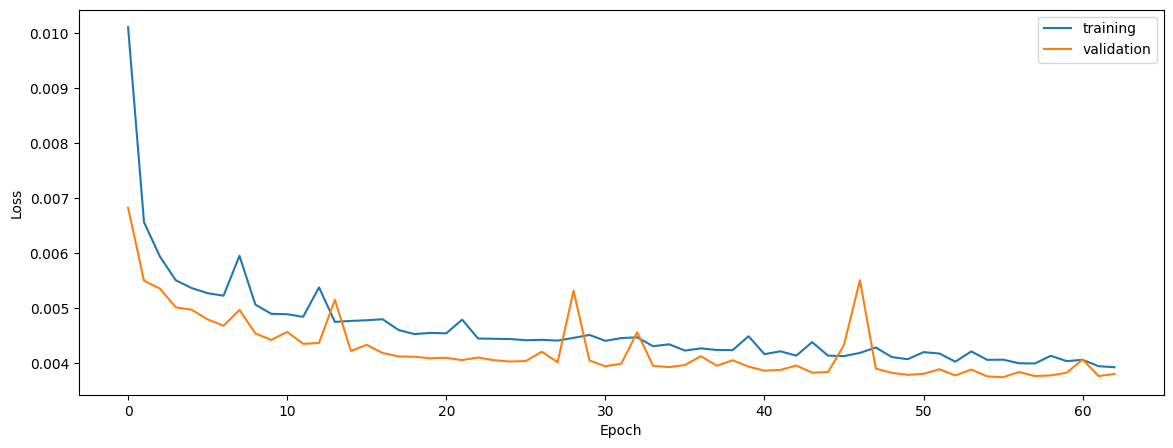

In [6]:
from util import pickleLoad
from visual import plotHistory

history = pickleLoad(path+'/{}.pkl'.format(HASHID))
plotHistory(history)

In [7]:
from util import getPearson, predictInBatches

print(getPearson(train[1],predictInBatches(model,train[0],architecture['batch_size'])))
print(getPearson(val[1],predictInBatches(model,val[0],architecture['batch_size'])))
print(getPearson(test[1],predictInBatches(model,test[0],architecture['batch_size'])))

0.8070282047937926


0.8094405812573919


0.8311050826687719


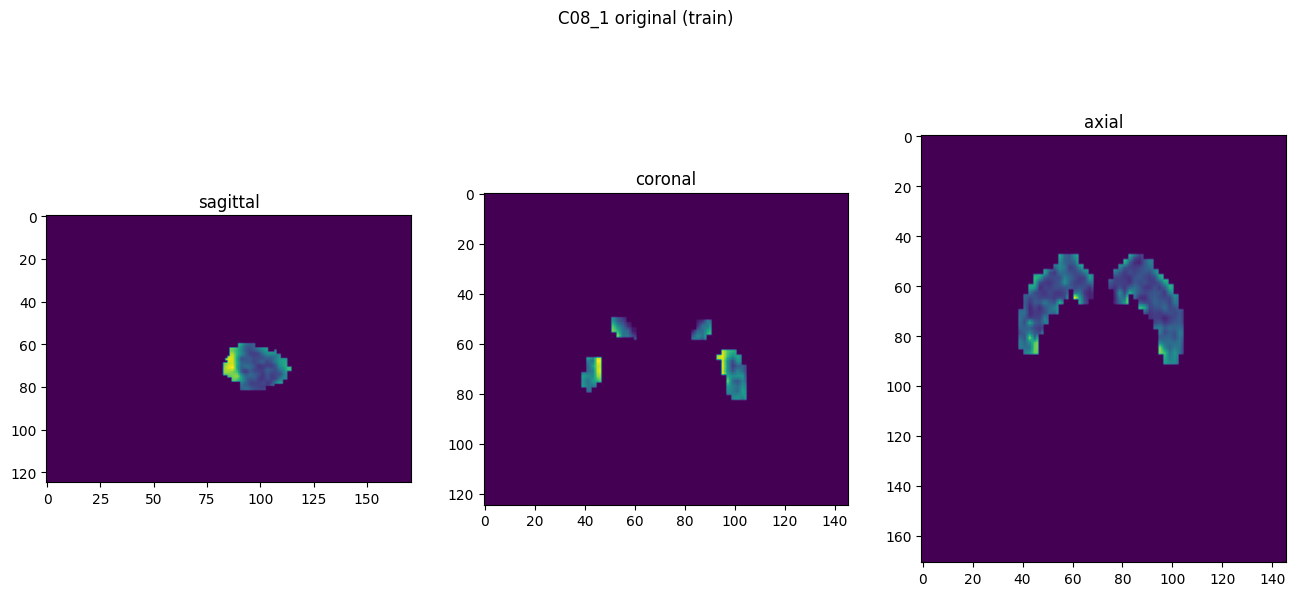

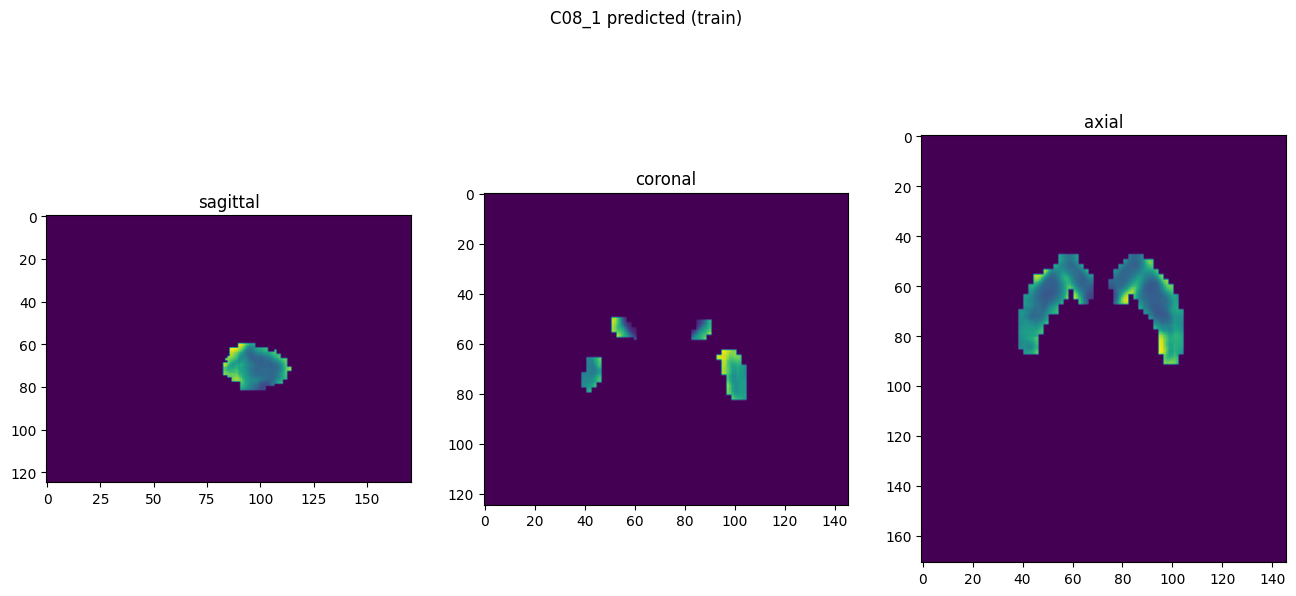

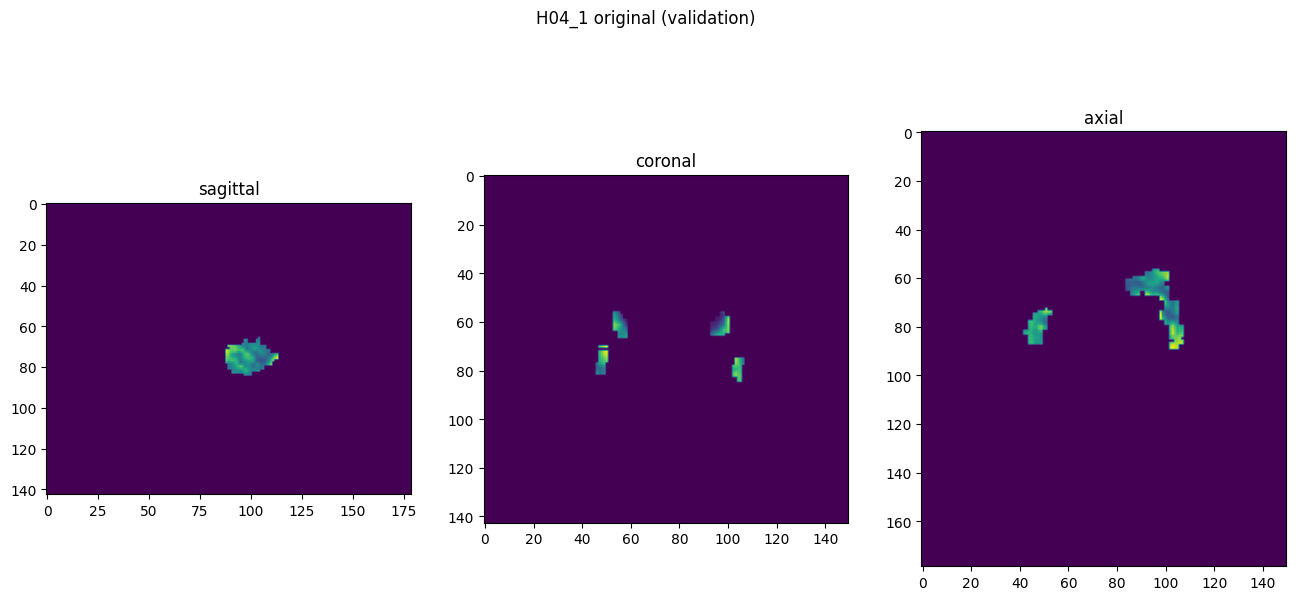

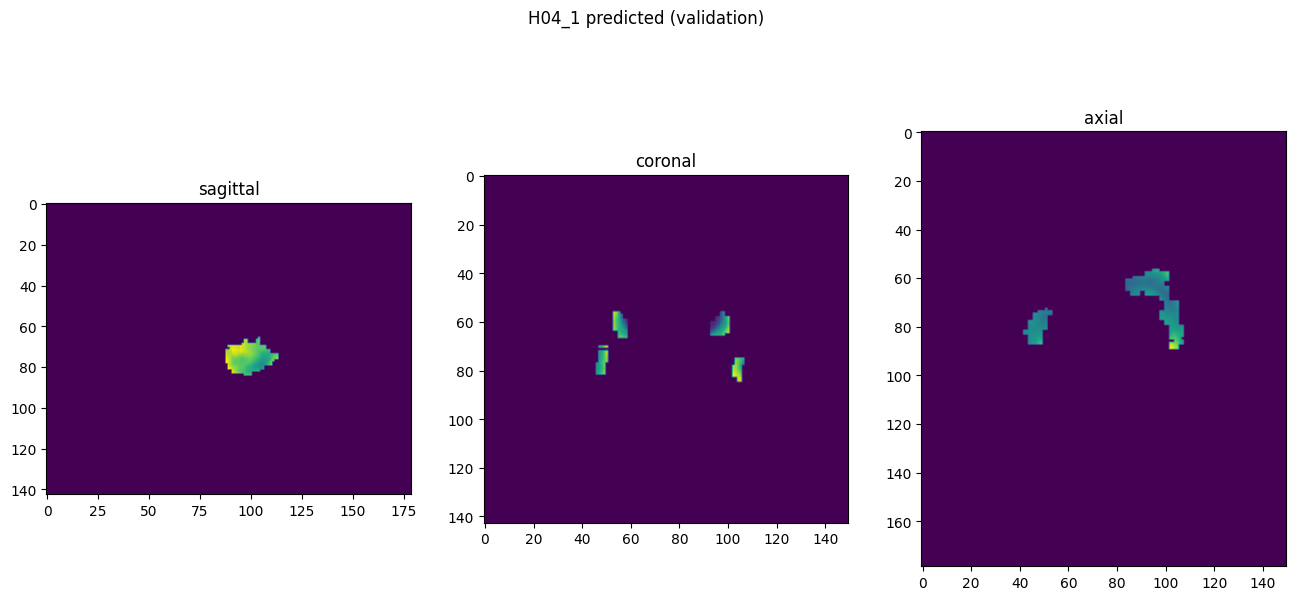

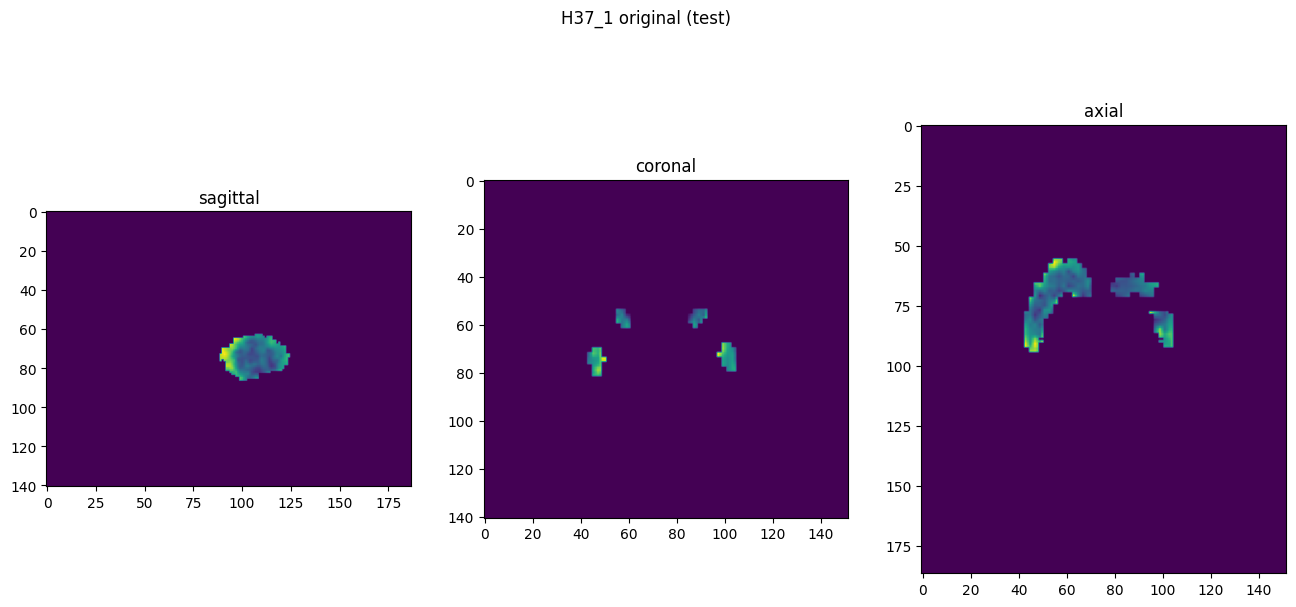

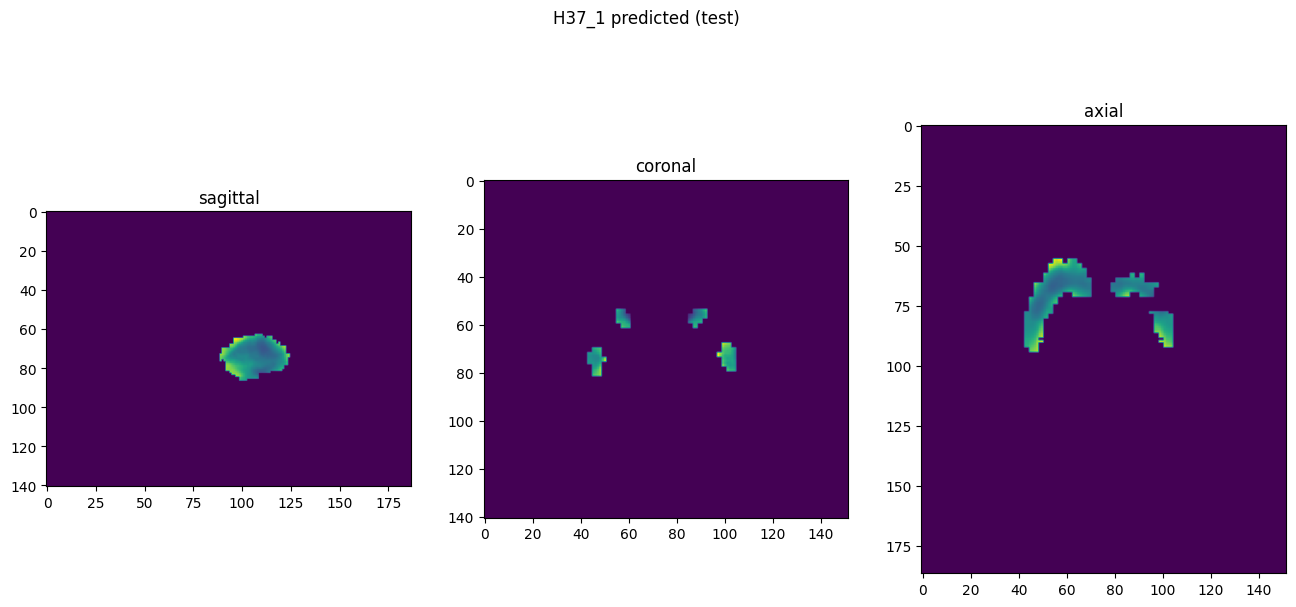

In [8]:
showResults(model, gen, threshold=None, background=False)